<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 10x 50px; color:white;">Table des matières</h1>


<h2> Introduction </h2>

<p> La prédiction des séismes à l'aide de tweets et de l'apprentissage automatique est un projet de recherche passionnant qui combine les techniques de traitement du langage naturel (NLP) et d'apprentissage automatique pour essayer de prédire les séismes futurs. En utilisant des données de tweets, il est possible de créer des modèles de prédiction qui peuvent aider à identifier les facteurs qui peuvent être associés à la survenue de séismes.

Le projet consiste à collecter et à préparer les données de tweets, puis à utiliser des techniques de NLP pour extraire des informations pertinentes pour la prédiction des séismes. Ensuite, ces données sont utilisées pour entraîner et évaluer différents modèles d'apprentissage automatique afin de trouver le modèle le plus performant.

Le défi principal de ce projet est de s'assurer que les données de tweets sont suffisamment précises et fiables pour permettre la création de modèles prédictifs de haute qualité. Il est également important de développer des méthodes efficaces pour traiter et analyser les données de tweets, ainsi que de trouver les meilleures techniques d'apprentissage automatique pour prédire les séismes.

Avec l'aide de l'apprentissage automatique et du NLP, ce projet vise à améliorer notre compréhension des séismes et peut-être même à contribuer à la prévention de catastrophes futures.</p></br>


* [1. Libraries](#1)


* [2. Exploration des données](#2)


* [3. Preprocess et étiquetage des données](#3)


* [4. Création et benchemark des modèles](#4)


* [5. Autres Approches](#5)


* [6. Conclusion Générale](#6)



<a id='1'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Librairies</h1>

<p> Cette partie est consacré à l'installation des packages et libraires utilisés pour traiter ce projet<P>

In [1]:
! pip install textblob


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install -U pandasql



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
! pip install nltk


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
! pip install spacy


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
! pip install textblob_fr



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
! pip install plotly



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:

# Libraries de visualisation
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline 

# Libraires de traitement de text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import string
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_word_en=stopwords.words()
stop_word_fr=stopwords.words('french')
stop_word=stop_word_en+stop_word_en
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

# import spacy
from gensim import corpora, models, similarities
import warnings
warnings.filterwarnings('ignore')
import collections


from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

# Les modèles Machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Les metriques de performances
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report



[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id='2'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Exploration des données</h1>

![](https://i.pinimg.com/originals/e0/2f/31/e02f319e566acc11cbff272c16a650e1.gif)

In [14]:
data=pd.read_json('../Data/datasetProjet2022.json')
data.head(5)

user_lang tweet_coordinates_geojson  loc_point_geojson  doublon country  \
0      None                      None                NaN    False    None   
1      None                      None                NaN    False    None   
2      None                      None                NaN    False    None   
3      None                      None                NaN    False    None   
4      None                      None                NaN    False    None   

                                        tweet_source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

   tweet_current_user_retweet user_location tweet_coordinates_geom  \
0                        -1.0          None                   None   
1                        -1.0          None                   None   
2                        -1.0        France                   None   
3                        -1.0          None                   None   
4                        -1.0         94uzi                   None   

   user_geo_enabled  ... user_friends_count  tweet_coordinates  \
0               0.0  ...             4997.0               None   
1               0.0  ...              654.0               None   
2               0.0  ...              321.0               None   
3               1.0  ...             2027.0               None   
4               1.0  ...              526.0               None   

        tweet_mtion tweet_lang id_filtre tweet_favorite_count  \
0              None         fr        63                  0.0   
1              None         fr        63                  0.0   
2  HuetSylvestre ;          fr        63                  0.0   
3              None         fr        63                  0.0   
4              None         fr        63                  0.0   

   user_listed_counted             tweet_id  place_bbox_geom  user_utc_offset  
0                 41.0  1154707909470801920             None             -1.0  
1                  0.0  1154708887871922177             None             -1.0  
2                  0.0  1154709490442342400             None             -1.0  
3                103.0  1154711387345735680             None             -1.0  
4                339.0  1154722470986997761             None             -1.0  

[5 rows x 44 columns]

In [8]:
seisme_df=pd.read_csv('../Data/Liste_seismes_2017-2022.csv',sep=';')
seisme_df.head(5)

Date Heure            Localisation  Latitude  Longitude  \
0  2017-02-20 17:03:41.57              ENE Orthez   43.4917    -0.6465   
1  2017-04-26 15:12:10.88  SW Bagnères-de-Bigorre   42.9811     0.1370   
2  2017-05-08 02:08:27.15       NE Argelès-Gazost   43.0347     0.0206   
3  2017-09-28 01:43:22.76                 O Janzé   47.9614    -1.4372   
4  2017-10-25 03:41:17.67          SW Albertville   45.4286     6.3180   

   Profondeur Type Magnitude  Magnitude  IdSei (franceseisme)  \
0         5.0            MLv        3.5                   659   
1         7.7            MLv        3.7                   669   
2         7.5            MLv        3.4                   673   
3         4.5            MLv        3.9                   690   
4         3.1            MLv        3.7                   696   

   Intensite EMS98 maximale  
0                       5.0  
1                       4.0  
2                       4.0  
3                       4.0  
4                       4.5

In [9]:
print('la taille des données de tweets {}'.format(data.shape))
print('la taille des seismes {}'.format(seisme_df.shape))

la taille des données de tweets (517301, 44)
la taille des seismes (46, 9)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517301 entries, 0 to 517300
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   user_lang                    208530 non-null  object        
 1   tweet_coordinates_geojson    2240 non-null    object        
 2   loc_point_geojson            0 non-null       float64       
 3   doublon                      517301 non-null  bool          
 4   country                      12283 non-null   object        
 5   tweet_source                 517301 non-null  object        
 6   tweet_current_user_retweet   506405 non-null  float64       
 7   user_location                394636 non-null  object        
 8   tweet_coordinates_geom       2240 non-null    object        
 9   user_geo_enabled             512059 non-null  float64       
 10  hashtags                     139703 non-null  object        
 11  user_favorites_count      

In [11]:
# recherche des valeurs manquantes des colonnes.

def missing_values(data):
    
    total=(data.isnull().sum().sort_values(ascending=False))
    percent_missing=(total/data.isnull().count()).sort_values(ascending=False)
    missin_df=pd.concat([total,percent_missing],keys=['total_missing','percent_missing'],axis=1)
    return missin_df

In [12]:
missing_values(data)

total_missing  percent_missing
indice_localisation                 517301         1.000000
loc_point_geojson                   517301         1.000000
loc_geojson                         517301         1.000000
localisation                        517301         1.000000
tweet_coordinates_geom              515061         0.995670
tweet_coordinates_longitude         515061         0.995670
tweet_coordinates_geojson           515061         0.995670
tweet_coordinates_latitude          515061         0.995670
tweet_coordinates                   515061         0.995670
place_bbox                          505228         0.976662
place_bbox_polygon                  505222         0.976650
place_bbox_geom                     505222         0.976650
place_bbox_geojson                  505222         0.976650
place_fullname                      505018         0.976256
place_type                          505018         0.976256
country_code                        505018         0.976256
place_name                          505018         0.976256
country                             505018         0.976256
id_evt                              447306         0.864692
hashtags                            377598         0.729939
tweet_mtion                         372420         0.719929
user_time_zone                      351377         0.679251
user_lang                           308771         0.596888
user_location                       122665         0.237125
tweet_quoted_status_id               10896         0.021063
tweet_current_user_retweet           10896         0.021063
user_utc_offset                       6874         0.013288
tweet_retweet_count                   5242         0.010133
user_followers_count                  5242         0.010133
user_listed_counted                   5242         0.010133
tweet_favorite_count                  5242         0.010133
user_friends_count                    5242         0.010133
user_statuses_count                   5242         0.010133
user_geo_enabled                      5242         0.010133
user_favorites_count                  5242         0.010133
tweet_text                               0         0.000000
tweet_source                             0         0.000000
tweet_lang                               0         0.000000
id_filtre                                0         0.000000
id_alea                                  0         0.000000
tweet_created_at                         0         0.000000
tweet_id                                 0         0.000000
doublon                                  0         0.000000
robot                                    0         0.000000

### Remarques: 

- Le pourcentage de valeurs maquantes atteints les 100% pour certaines colonnes.
- La valeur **id_evt** considérée comme notre **target** possède **86% des valeurs sont nulles**

In [13]:
# découverte des différents colonnes et leurs valeurs

for c in data.columns:
    print('--------------')
    print('la colonne {} est de type {}'.format(c,data[c].dtype))
    print(data[c].unique())

--------------
la colonne user_lang est de type object
[None 'fr' 'en' 'tr' 'nl' 'es' 'ja' 'en-gb' 'ru' 'de' 'it' 'pt' 'hu'
 'zh-cn' 'ar' 'ro' 'vi' 'el' 'sr' 'id' 'gl' 'sv' 'fa' 'he' 'ko' 'en-GB'
 'fi' 'ca' 'fil' 'xx-lc' 'pl' 'cs' 'bg' 'th' 'zh-tw' 'zh-CN' 'hi' 'ms'
 'no' 'eu' 'da' 'fr-CA' 'es-MX' 'hr' 'ta']
--------------
la colonne tweet_coordinates_geojson est de type object
[None '{"type":"Point","coordinates":[-149.62,62.228]}'
 '{"type":"Point","coordinates":[-149.294,62.632]}' ...
 '{"type":"Point","coordinates":[-97.464,-33.503]}'
 '{"type":"Point","coordinates":[-150.793,62.515]}'
 '{"type":"Point","coordinates":[-150.008,62.171]}']
--------------
la colonne loc_point_geojson est de type float64
[nan]
--------------
la colonne doublon est de type bool
[False  True]
--------------
la colonne country est de type object
[None 'Turquie' 'France' 'Solomon Islands' 'United States' 'Cameroon'
 "People's Republic of China" 'Republic of the Philippines'
 'United Arab Emirates' 'Madagas

### Remarque :

- Plusieurs colonnes peuvent nous intéresser mise à part id_evt et les tweets, **on pourra utiliser tweet_retweet_text,tweet_favorite_count...**

In [14]:
# séparation des valeurs numériques et des valeurs objects

numerical_data=data.select_dtypes(exclude=['object'])
categorical_data=data.select_dtypes(include=['object'])
print('shape de nos données numerique {}'.format(numerical_data.shape))
print('shape de nos données catégorique {}'.format(categorical_data.shape))

shape de nos données numerique (517301, 24)
shape de nos données catégorique (517301, 20)


In [15]:
numerical_data.head(2)

loc_point_geojson  doublon  tweet_current_user_retweet  user_geo_enabled  \
0                NaN    False                        -1.0               0.0   
1                NaN    False                        -1.0               0.0   

   user_favorites_count    tweet_created_at  tweet_retweet_count  \
0               37990.0 2019-07-26 12:59:53                  0.0   
1                9010.0 2019-07-26 13:03:46                  0.0   

   user_followers_count  tweet_coordinates_longitude  robot  ...  loc_geojson  \
0                2036.0                          NaN  False  ...          NaN   
1                 534.0                          NaN  False  ...          NaN   

   localisation  id_evt  id_alea  user_friends_count  id_filtre  \
0           NaN     NaN        1              4997.0         63   
1           NaN     NaN        1               654.0         63   

   tweet_favorite_count  user_listed_counted             tweet_id  \
0                   0.0                 41.0  1154707909470801920   
1                   0.0                  0.0  1154708887871922177   

   user_utc_offset  
0             -1.0  
1             -1.0  

[2 rows x 24 columns]

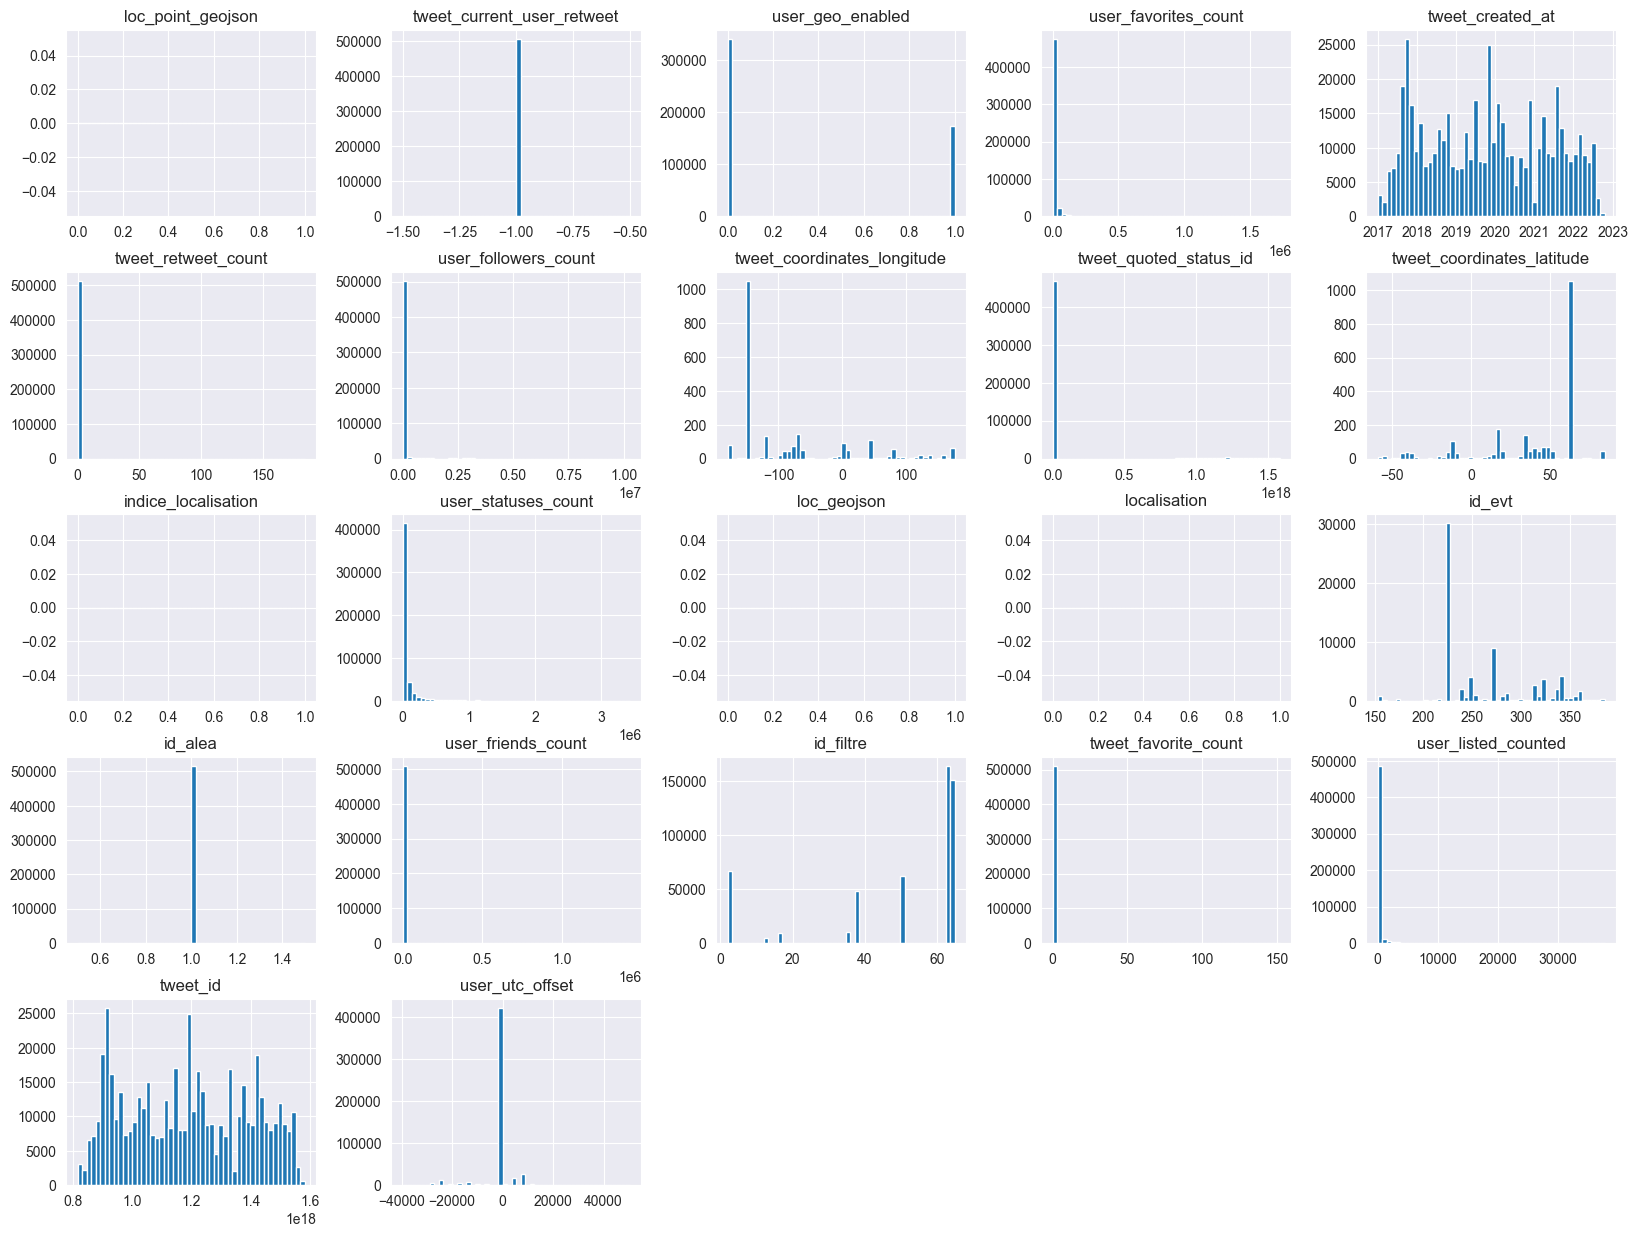

In [16]:
#visualisation des données numériques
numerical_data.hist(bins=50,figsize=(20,15))
plt.show()


In [17]:
mssing=missing_values(numerical_data)
#pourcentage des valeurs nulles pour les données numériques

In [18]:
numerical_data.drop(mssing[mssing['percent_missing']>0.9].index,axis=1,inplace=True)
# suppression des colonnes ayant un pourcentage supérieur à 90%

In [19]:
numerical_data.drop('tweet_id',axis=1,inplace=True)
numerical_data
#suppression des tweet id

doublon  tweet_current_user_retweet  user_geo_enabled  \
0         False                        -1.0               0.0   
1         False                        -1.0               0.0   
2         False                        -1.0               0.0   
3         False                        -1.0               1.0   
4         False                        -1.0               1.0   
...         ...                         ...               ...   
517296    False                        -1.0               1.0   
517297    False                        -1.0               1.0   
517298    False                        -1.0               1.0   
517299    False                        -1.0               0.0   
517300    False                        -1.0               0.0   

        user_favorites_count    tweet_created_at  tweet_retweet_count  \
0                    37990.0 2019-07-26 12:59:53                  0.0   
1                     9010.0 2019-07-26 13:03:46                  0.0   
2                      889.0 2019-07-26 13:06:10                  0.0   
3                    45052.0 2019-07-26 13:13:42                  0.0   
4                     2845.0 2019-07-26 13:57:45                  0.0   
...                      ...                 ...                  ...   
517296                 901.0 2019-07-26 12:49:09                  0.0   
517297                1200.0 2019-07-26 12:55:10                  0.0   
517298                1141.0 2019-07-26 12:56:43                  0.0   
517299                  10.0 2019-07-26 12:58:07                  0.0   
517300                4607.0 2019-07-26 12:59:05                  0.0   

        user_followers_count  robot  tweet_quoted_status_id  \
0                     2036.0  False           -1.000000e+00   
1                      534.0  False           -1.000000e+00   
2                      137.0  False           -1.000000e+00   
3                     2423.0  False           -1.000000e+00   
4                     3321.0  False            1.154527e+18   
...                      ...    ...                     ...   
517296               44018.0  False           -1.000000e+00   
517297                 532.0  False           -1.000000e+00   
517298                 302.0  False           -1.000000e+00   
517299                 140.0  False           -1.000000e+00   
517300                1258.0  False           -1.000000e+00   

        user_statuses_count  id_evt  id_alea  user_friends_count  id_filtre  \
0                   49536.0     NaN        1              4997.0         63   
1                   15821.0     NaN        1               654.0         63   
2                     336.0     NaN        1               321.0         63   
3                   23866.0     NaN        1              2027.0         63   
4                  159961.0     NaN        1               526.0         63   
...                     ...     ...      ...                 ...        ...   
517296              40601.0     NaN        1              1257.0         63   
517297               1891.0     NaN        1               599.0         63   
517298              38026.0     NaN        1               383.0         63   
517299               1109.0     NaN        1                 0.0         63   
517300              67722.0     NaN        1               766.0         63   

        tweet_favorite_count  user_listed_counted  user_utc_offset  
0                        0.0                 41.0             -1.0  
1                        0.0                  0.0             -1.0  
2                        0.0                  0.0             -1.0  
3                        0.0                103.0             -1.0  
4                        0.0                339.0             -1.0  
...                      ...                  ...              ...  
517296                   0.0                525.0             -1.0  
517297                   0.0                 12.0             -1.0  
517298                 

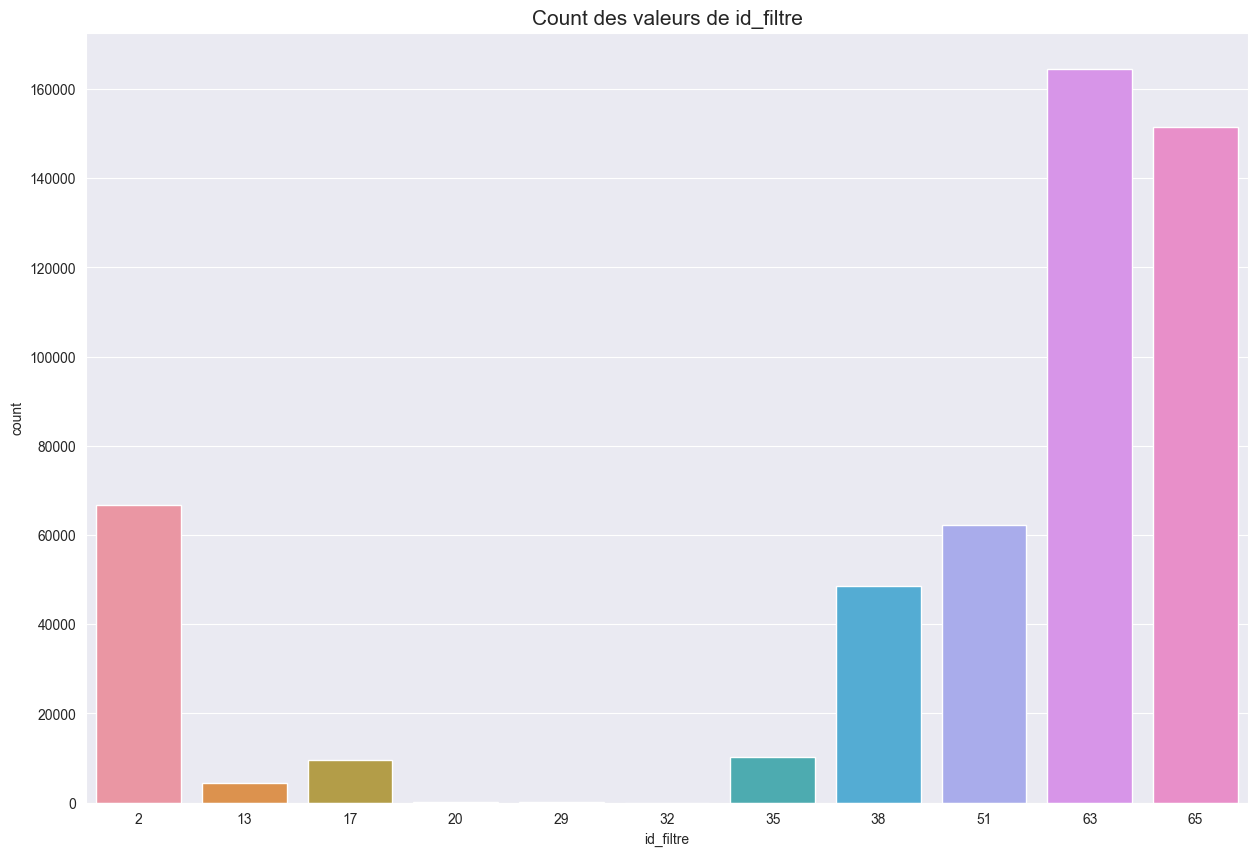

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(data=numerical_data,x='id_filtre').set_title("Count des valeurs de id_filtre",fontsize=15)
plt.show()

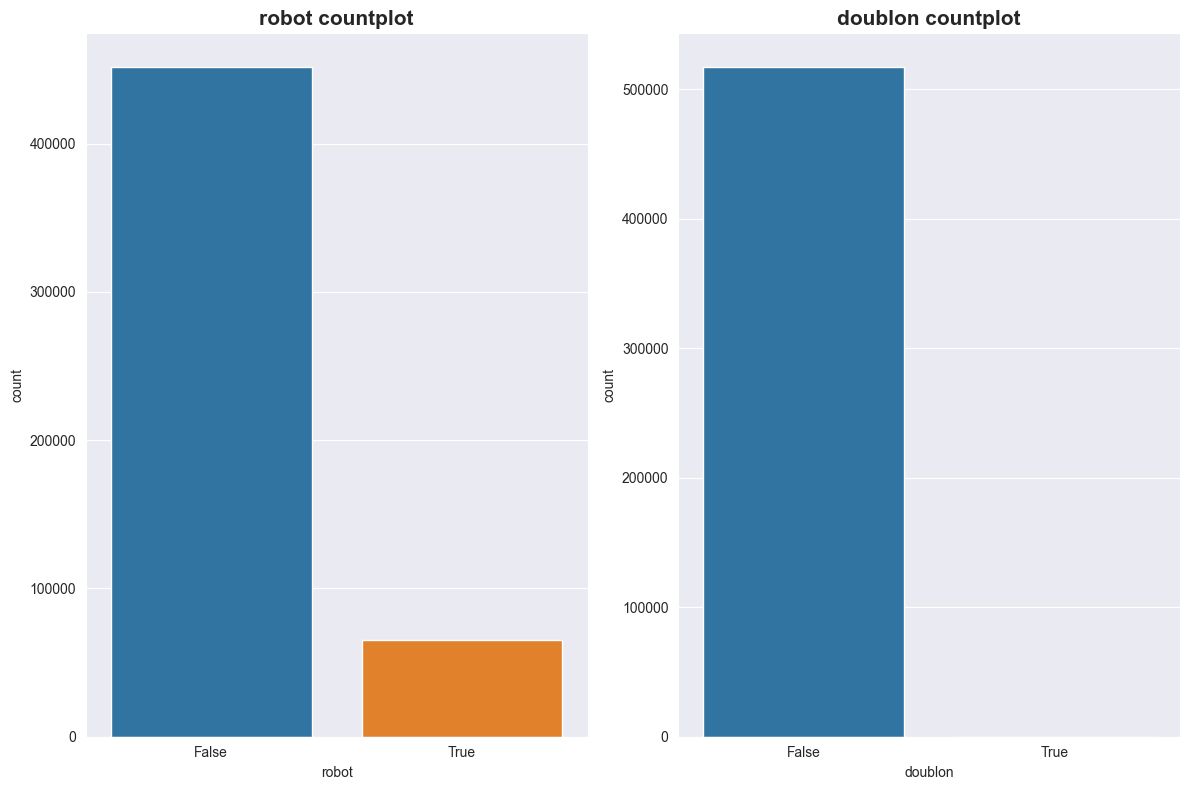

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,8))
sns.countplot(data=numerical_data,x='robot',ax=axes[0])
axes[0].set_title('robot countplot',fontweight='bold',fontsize=15)
sns.countplot(data=numerical_data,x='doublon',ax=axes[1])
axes[1].set_title('doublon countplot',fontweight='bold',fontsize=15)
fig.tight_layout()
plt.show()


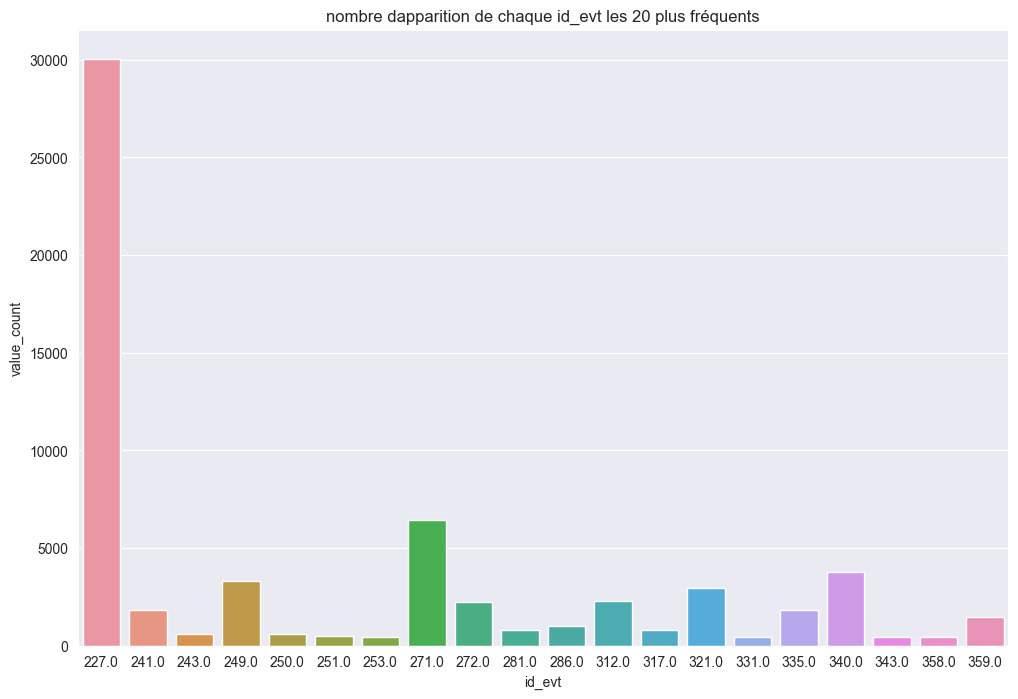

In [22]:
count_id_evt=pd.DataFrame(numerical_data.id_evt.value_counts().reset_index())
count_id_evt.columns=['id_evt','value_count']
count_top_id_evt=count_id_evt.sort_values(by='value_count',ascending=False)[:20]

plt.figure(figsize=(12,8))
sns.barplot(data=count_top_id_evt,y='value_count',x='id_evt')
plt.title('nombre dapparition de chaque id_evt les 20 plus fréquents',fontsize=12)

plt.show()

### Remarques: 

- D'après la courbe ci-dessus, l'id_evt 227 est présent **30000 fois sur les 60000 des tweets qui sont labelisés.**

In [23]:
# création de la colonne année

numerical_data['year']=numerical_data['tweet_created_at'].dt.year

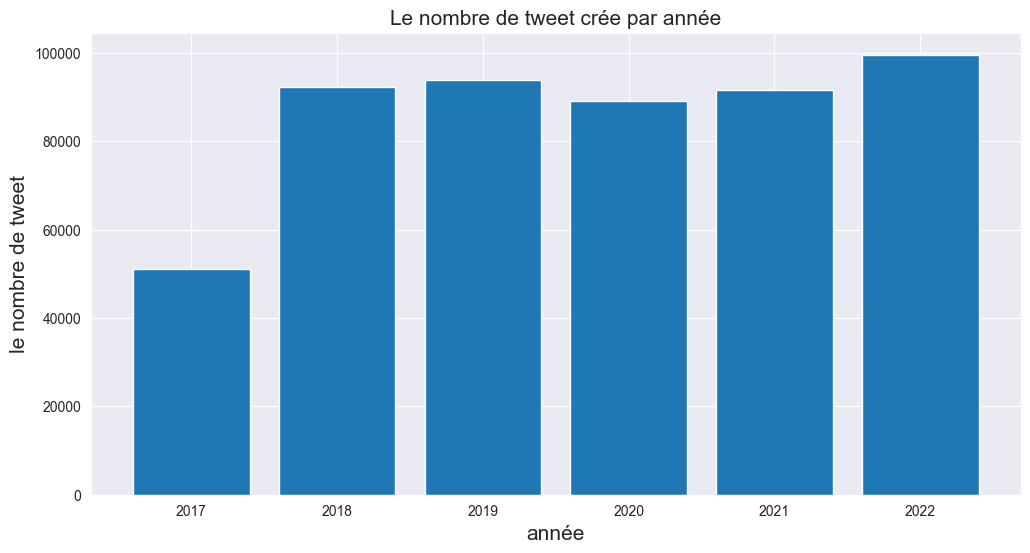

In [24]:
numerical_data['year']=numerical_data['tweet_created_at'].dt.year

plt.figure(figsize=(12,6))


plt.bar(numerical_data['year'].unique(),numerical_data.groupby('year')['year'].count())

plt.xlabel('année',fontsize=15)
plt.ylabel('le nombre de tweet',fontsize=15)

plt.title('Le nombre de tweet crée par année',fontsize=15)


plt.show()

In [25]:
data['date']=data['tweet_created_at'].dt.date

data['time_date'] = pd.to_datetime(data['tweet_created_at'], utc=True)

data.set_index('time_date', inplace=True)


def counter(x):
     return pd.Series(dict(Number_of_tweets = x['tweet_text'].count(), 
                        ))
daily_count=data.groupby(data.index.date).apply(counter)
daily_count.index.name='date'
daily_count.reset_index(inplace=True)
daily_count['date']=daily_count['date'].astype('datetime64[ns]')
daily_count['year']=daily_count.date.dt.year
daily_count['month']=daily_count.date.dt.month

px.box(daily_count,x="year",y='Number_of_tweets',color='month',title="le nombre de tweets crée chaque année et par mois")

# Remarque:

- On remarque que le mois **d'Aout 2017, le mois de novembre de 2019, le mois d'octobre et d'aout 2021** présentent des valeurs abérantes par dans certains jours

Text(0.5, 1.0, 'Distribution mensuelle des tweets')

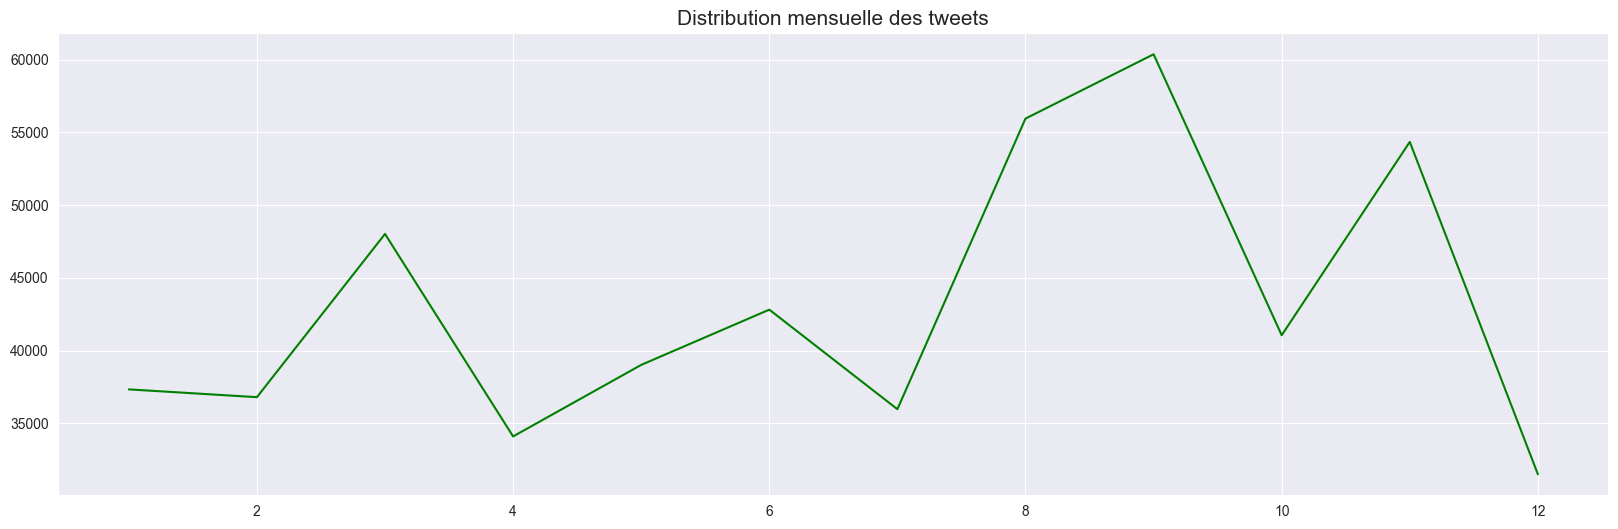

In [26]:
time = data.groupby(['tweet_created_at']).size()
monthly = data['tweet_created_at'].dt.month.value_counts().sort_index()
plt.figure(figsize=(20,6))
sns.lineplot(x=monthly.index, y = monthly.values, color='green')
plt.title('Distribution mensuelle des tweets', fontsize=15)

### Remarques : 

- Ce graph montre la distribution mensuelle des tweets, on peut déduire que le max on l'atteint pendant le mois 8 et 9 et le minimum ves le mois 4

## Analyse des données seismes

In [27]:
# Découverte des données seismes

seisme_df['Date Heure']=seisme_df['Date Heure'].astype('datetime64[ns]')
seisme_df['date']=pd.to_datetime(seisme_df['Date Heure'].dt.date)
seisme_df['year']=seisme_df.date.dt.year
seisme_df['month']=seisme_df.date.dt.month
a=seisme_df.set_index('date').resample('M')['Intensite EMS98 maximale'].mean().reset_index()
a['year']=a.date.dt.year
a['Intensite EMS98 maximale'].fillna(0,inplace=True)# on remplace la valeur pour une date non présente par 0

px.line(a,x='date',y='Intensite EMS98 maximale',color='year',title="Moyenne Intensité EMS98 maximale par mois")

# Analyse des données Textes

In [28]:
categorical_data.head(5)

user_lang tweet_coordinates_geojson country  \
0      None                      None    None   
1      None                      None    None   
2      None                      None    None   
3      None                      None    None   
4      None                      None    None   

                                        tweet_source user_location  \
0  <a href="http://twitter.com/download/iphone" r...          None   
1  <a href="http://twitter.com/download/android" ...          None   
2  <a href="https://mobile.twitter.com" rel="nofo...        France   
3  <a href="http://twitter.com/download/iphone" r...          None   
4  <a href="http://twitter.com/download/iphone" r...         94uzi   

  tweet_coordinates_geom              hashtags  \
0                   None  séisme ; Istanbul ;    
1                   None                  None   
2                   None                  None   
3                   None                  None   
4                   None                  None   

                                          tweet_text country_code place_name  \
0  Un #séisme majeur menace #Istanbul – {Sciences...         None       None   
1  Tremblement de terre M3.1 - FRANCE - 31km de L...         None       None   
2  Un séisme majeur menace Istanbul – {Sciences²}...         None       None   
3  Un séisme majeur menace Istanbul – {Sciences²}...         None       None   
4   je suis morte ça crie comme si y avait un séisme         None       None   

  place_bbox user_time_zone place_bbox_polygon place_bbox_geojson place_type  \
0       None           None               None               None       None   
1       None           None               None               None       None   
2       None           None               None               None       None   
3       None           None               None               None       None   
4       None           None               None               None       None   

  place_fullname tweet_coordinates       tweet_mtion tweet_lang  \
0           None              None              None         fr   
1           None              None              None         fr   
2           None              None  HuetSylvestre ;          fr   
3           None              None              None         fr   
4           None              None              None         fr   

  place_bbox_geom  
0            None  
1            None  
2            None  
3            None  
4            None

In [29]:
# affichage des tweets aléatoirement et son id_evt correspondant
i=data.reset_index().sample(1).index[0]
print(data['tweet_text'].iloc[i])
print('----------------')
print(data['id_evt'].iloc[i])

@thecloudplanet @DKueger @AntoinetteColby @lemondefr Vous avez sûrement quelqu’un dans votre entourage qui a vécu la WWII @DKueger non?

Parlez-leur. Quand c’est cassé, on répart, on reconstruit...

Oui le Covid est un événement de cette magnitude. https://t.co/CZeZKxfuDY
----------------
nan


In [30]:
# clean tweet text
def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
categorical_data['clean_tweets']=categorical_data['tweet_text'].apply(clean_tweets)

In [31]:
# verification des changement 
i=categorical_data.sample(1).index[0]
print('text originnal : {}'.format(categorical_data['tweet_text'].iloc[i]))
print('------------------modification-----------------')
print('text modifié : {}'.format(categorical_data['clean_tweets'].iloc[i]))

text originnal : Tremblement de terre mag 5.91 à 113,26km de Horoera (#NouvelleZélande): #Horoera #TremblementDeTerre #Séisme #Earthquake https://t.co/u0oxnPuRDa
------------------modification-----------------
text modifié : Tremblement de terre mag 5.91 à 113,26km de Horoera (NouvelleZélande): Horoera TremblementDeTerre Séisme Earthquake 


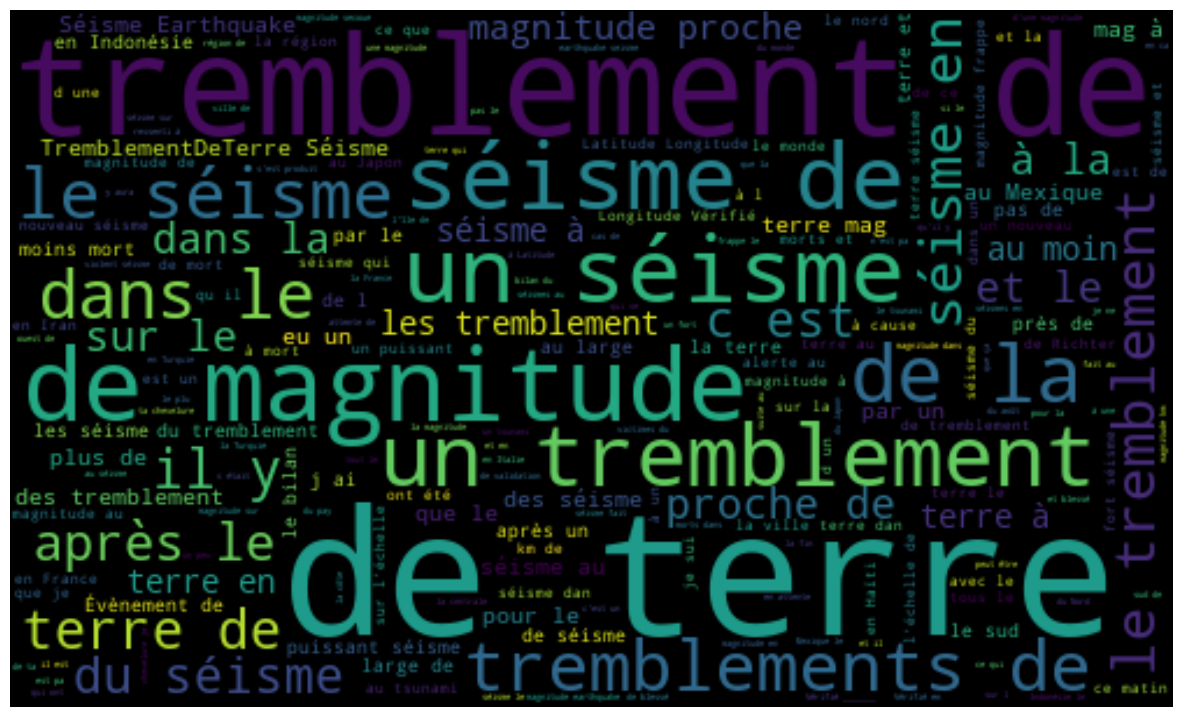

In [32]:
#Word Cloud des mots les plus fréquents 

plt.figure(figsize=(15,12))

joinword=''.join([t for t in categorical_data['clean_tweets']])

wordcloud=WordCloud(random_state=42,width=500,height=300).generate(joinword)

plt.imshow(wordcloud,interpolation='bilinear')

plt.axis('off')
plt.show()

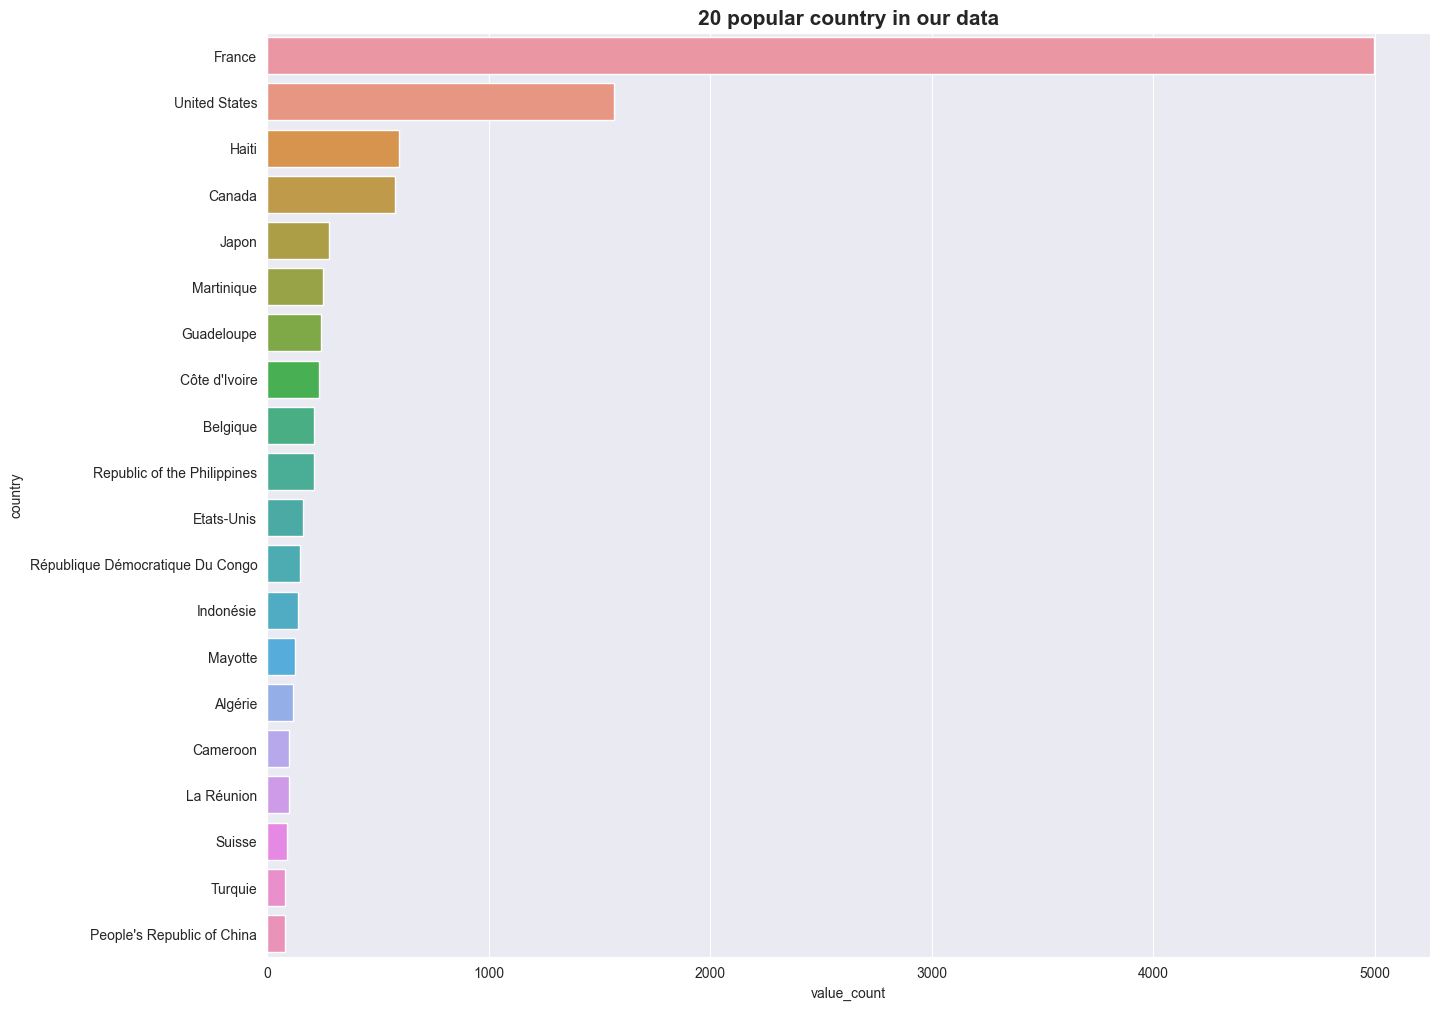

In [33]:
#Pays les plus populaires Data

plt.figure(figsize=(15,12))
country_count=categorical_data['country'].value_counts().reset_index()
country_count.columns=['country','value_count']
sns.barplot(data=country_count[:20],y='country',x='value_count')
plt.title('20 popular country in our data',fontweight='bold',fontsize=15)
plt.show()

In [34]:
#Arbre des Hashtags les plus populaire

b = data['hashtags'].value_counts()[:][1:40].index.tolist()
a = data['hashtags'].value_counts()[:][1:40].tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["nombre"] = a
fig = px.treemap(row, path= ["scenario"], values="nombre",title='arbre de hashtag')
fig.show()

### Remarques : 
- On remarque que les tweets proviennent de plusieurs pays pas uniquement la France.
- Certains tweets sont écrits par des bots littéraires qui sont un compte automatisé qui publie régulièrement du contenu littéraire, généralement sous la forme de citations, de passages de livres ou de poème

<a id='3'></a>

<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Preprocess et étiquetage des données</h1>

# Introduction 

- Après une analyse approfondie de notre jeu de données, on a pu constaté que notre target contient plusieurs valeurs manquantes et seulement 14% qui sont labelisés comme étant un type de seismes. 
- Dans cette partie, nous allons traiter le texte et créer d'autres features qui pourront nous aider à labeliser nos données en 1 si séisme et 0 absence de seisme

In [35]:
data.reset_index(inplace=True)

In [36]:
# fonction pour le calcul du nombre de hashtag et le nombre de mentions ou tags.
def count_hashtags(string):

    words = string.split()  #on divise un string par l'espace
    
    hashtags = [word for word in words if word.startswith('#')] #on extrait seulement les hashtags
    
    return (len(hashtags)) #retourne len de la liste des hashtags

def count_mentions(string):

    words = string.split()
    
    mentions = [word for word in words if word.startswith('@')]
    
    return (len(mentions))

In [37]:
data['len_hashtags']=data['tweet_text'].apply(count_hashtags)
data['len_mentions']=data['tweet_text'].apply(count_mentions)

In [38]:
#verification des transformations

i=data.sample(1).index[0]

print('hashtags données : {}'.format(data['hashtags'].iloc[i]))
print('----------------')
print('le nombre de hashtags : {} '.format(data['len_hashtags'].iloc[i]))

hashtags données : None
----------------
le nombre de hashtags : 0 


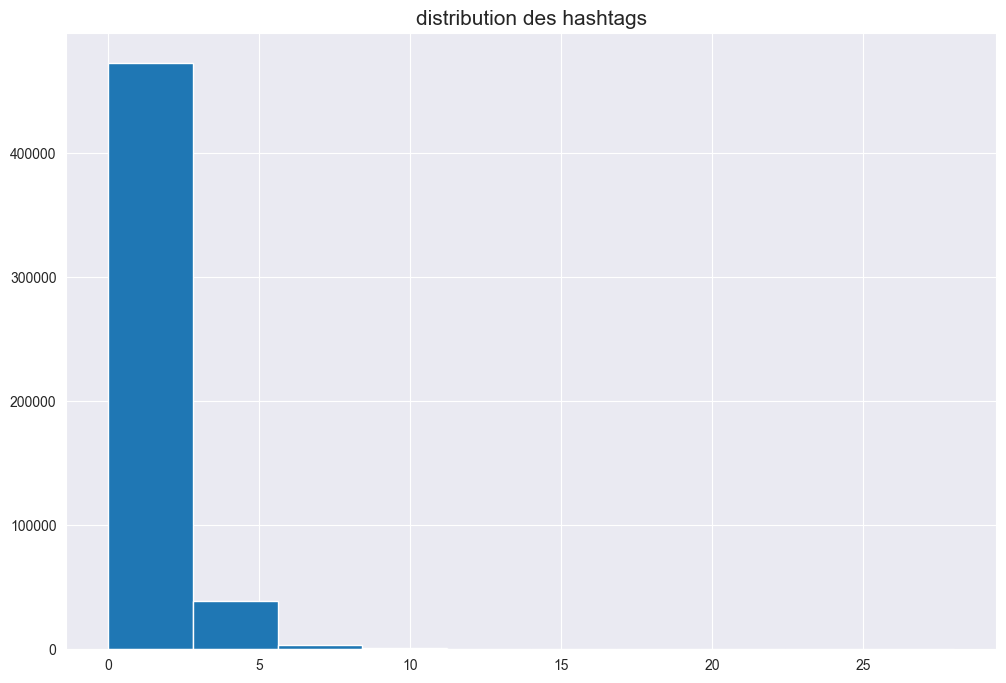

In [39]:
plt.figure(figsize=(12,8))
data['len_hashtags'].hist()
plt.title('distribution des hashtags',fontsize=15)
plt.show()


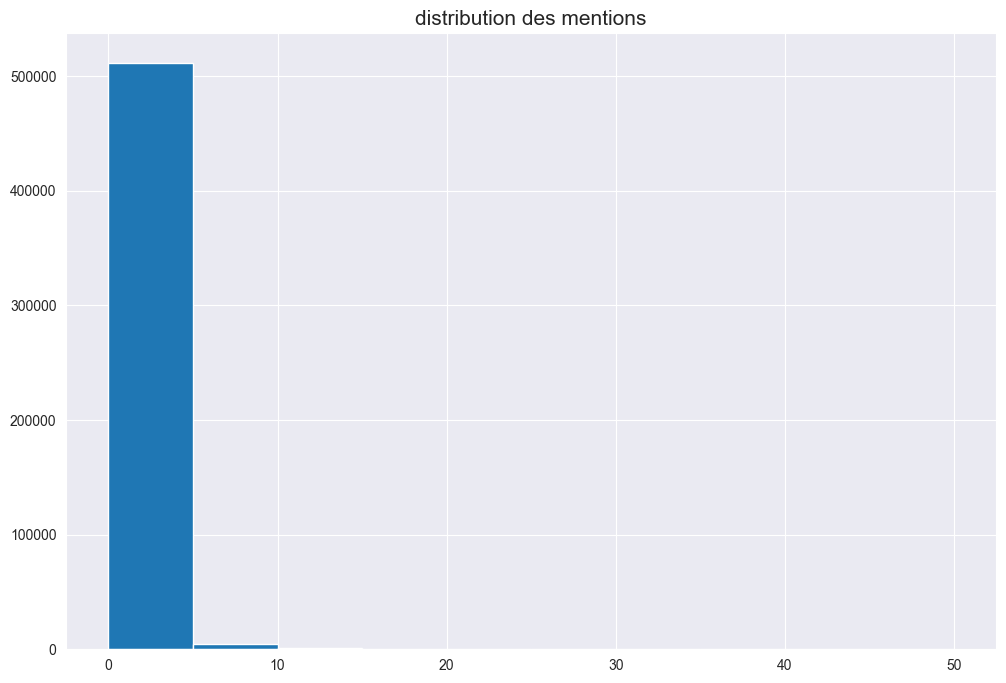

In [40]:
plt.figure(figsize=(12,8))
data['len_mentions'].hist()
plt.title('distribution des mentions',fontsize=15)
plt.show()

## Création de nouveau feature 

- En s'inspirant des documents fournits pour le projet

In [41]:
def create_features(df):
    
    df['num_mot']=df['tweet_text'].apply(lambda x: len(str(x).split())) #calcul du nombre de mot avec stop_word
    
    df["mot_unique"]=df["tweet_text"].apply(lambda x: len(set(str(x).split()))) #calcul des nombres de mots uniques
    df['num_stop_word']=df['tweet_text'].apply(lambda x:
                                              len([w for w in str(x).lower().split() if w in STOPWORDS])) #nombre de stop words
    df['num_url']=df['tweet_text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w])) #nombre de hashtags utilisé
    
    df['moy_mot']=df['tweet_text'].apply(lambda x:np.mean([len(w) for w in str(x).split()])) #la moyenne des mot utilisés
    
    df['nom_chara']=df['tweet_text'].apply(lambda x: len(str(x))) # le nombre de charactere utilisé
    
    df['nombre_punc']=df['tweet_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation])) # nombre de ponctuation
    df['nombre_mention']=df['tweet_mtion'].apply(lambda x:len(x) if x is not None else 0) #nombre de mention 
    df['num_point_exclamation'] = df['tweet_text'].apply(lambda x: x.count('!')) #nombre de point d'exclamation
    df['num_point_interrogation'] = df['tweet_text'].apply(lambda x: x.count('?'))#nombre de point interogation
    df['Non Alphanumeric'] = df['tweet_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()

    
    return df

In [42]:
data=create_features(data)
data.head(5)

time_date user_lang tweet_coordinates_geojson  \
0 2019-07-26 12:59:53+00:00      None                      None   
1 2019-07-26 13:03:46+00:00      None                      None   
2 2019-07-26 13:06:10+00:00      None                      None   
3 2019-07-26 13:13:42+00:00      None                      None   
4 2019-07-26 13:57:45+00:00      None                      None   

   loc_point_geojson  doublon country  \
0                NaN    False    None   
1                NaN    False    None   
2                NaN    False    None   
3                NaN    False    None   
4                NaN    False    None   

                                        tweet_source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

   tweet_current_user_retweet user_location tweet_coordinates_geom  ...  \
0                        -1.0          None                   None  ...   
1                        -1.0          None                   None  ...   
2                        -1.0        France                   None  ...   
3                        -1.0          None                   None  ...   
4                        -1.0         94uzi                   None  ...   

   mot_unique num_stop_word  num_url   moy_mot nom_chara nombre_punc  \
0           8             0        1  8.125000        72           9   
1          31             1        2  5.583333       236          31   
2          37             1        1  5.487805       266          16   
3           8             0        1  7.875000        70           7   
4          11             0        0  3.454545        48           0   

  nombre_mention  num_point_exclamation  num_point_interrogation  \
0              0                      0                        0   
1              0                      0                        0   
2             16                      0                        0   
3              0                      0                        0   
4              0                      0                        0   

   Non Alphanumeric  
0                12  
1                33  
2                28  
3                10  
4                 2  

[5 rows x 59 columns]

In [43]:
# description statistique des données
data[['num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']].describe()

num_mot     mot_unique  num_stop_word        num_url  \
count  517301.000000  517301.000000  517301.000000  517301.000000   
mean       20.632893      19.027181       0.329211       0.664246   
std        12.269436      10.471947       0.721126       0.674684   
min         1.000000       1.000000       0.000000       0.000000   
25%        12.000000      12.000000       0.000000       0.000000   
50%        16.000000      16.000000       0.000000       1.000000   
75%        27.000000      25.000000       0.000000       1.000000   
max       108.000000     104.000000      26.000000       7.000000   

             moy_mot      nom_chara    nombre_punc  nombre_mention  \
count  517301.000000  517301.000000  517301.000000   517301.000000   
mean        5.987316     136.248992       8.438464        6.164952   
std         1.558421      73.784946       5.771885       18.960890   
min         1.714286       6.000000       0.000000        0.000000   
25%         4.923077      85.000000       4.000000        0.000000   
50%         5.722222     118.000000       8.000000        0.000000   
75%         6.750000     171.000000      12.000000       10.000000   
max        92.333333     937.000000     155.000000      748.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count          517301.000000            517301.000000     517301.000000  
mean                0.127036                 0.129486         13.092762  
std                 0.591348                 0.546323          8.378968  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          7.000000  
50%                 0.000000                 0.000000         12.000000  
75%                 0.000000                 0.000000         17.000000  
max                54.000000                36.000000        165.000000

### Remarques: 

- le minimum des nombres de mots est 0, comment on peut l'intérpreter ?, peut-on dire que les tweets avec un seuil de mot ne veulent rien dire et si c'est le cas peut-on les labelisé à 0 ou qui dépassent un nombre de caractère limite est considérés 0 ?

In [44]:
data[(data['num_mot']<3) & (data['id_evt']>0)][['tweet_text','id_evt','Non Alphanumeric']]

tweet_text  id_evt  Non Alphanumeric
18575                 7.3 magnitude!!   267.0                 3
18593                   magnitude 6.7   267.0                 1
18597                      magnitude*   267.0                 1
18656                   magnitude 6.7   267.0                 1
20339                  *6.7 MAGNITUDE   267.0                 2
...                               ...     ...               ...
514732              7.3 magnitude???!   385.0                 5
514741                  Magnitude 7.3   385.0                 1
514742                  Magnitude 7.3   385.0                 1
514743  MAGNITUDE 7.3!?!?!!??!?!?!!?!   385.0                17
514744              MAGNITUDE 7.3?!?!   385.0                 5

[883 rows x 3 columns]

### Remarques : 
- Evidemment, on constate que les données labelisés contiennent plusieurs tweets avec moi de 3 mots, est-ce pertinent? peut comprendre un tweet avec 3 mots si on se dérige sur une analyse de text? 

## Cleaning des tweets

In [45]:
def clean_tweets(text):
    #suppresion des mentions
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    #suppression des hashtags
    text=re.sub(r'#',"",text)
    #suppresion des retweet
    text=re.sub(r'RT[\s]+','',text)
    #supression des hypers link
    text=re.sub(r'https?:\/\/\S+','',text)

    return text

In [46]:
data['tweets_clean']=data['tweet_text'].apply(clean_tweets)


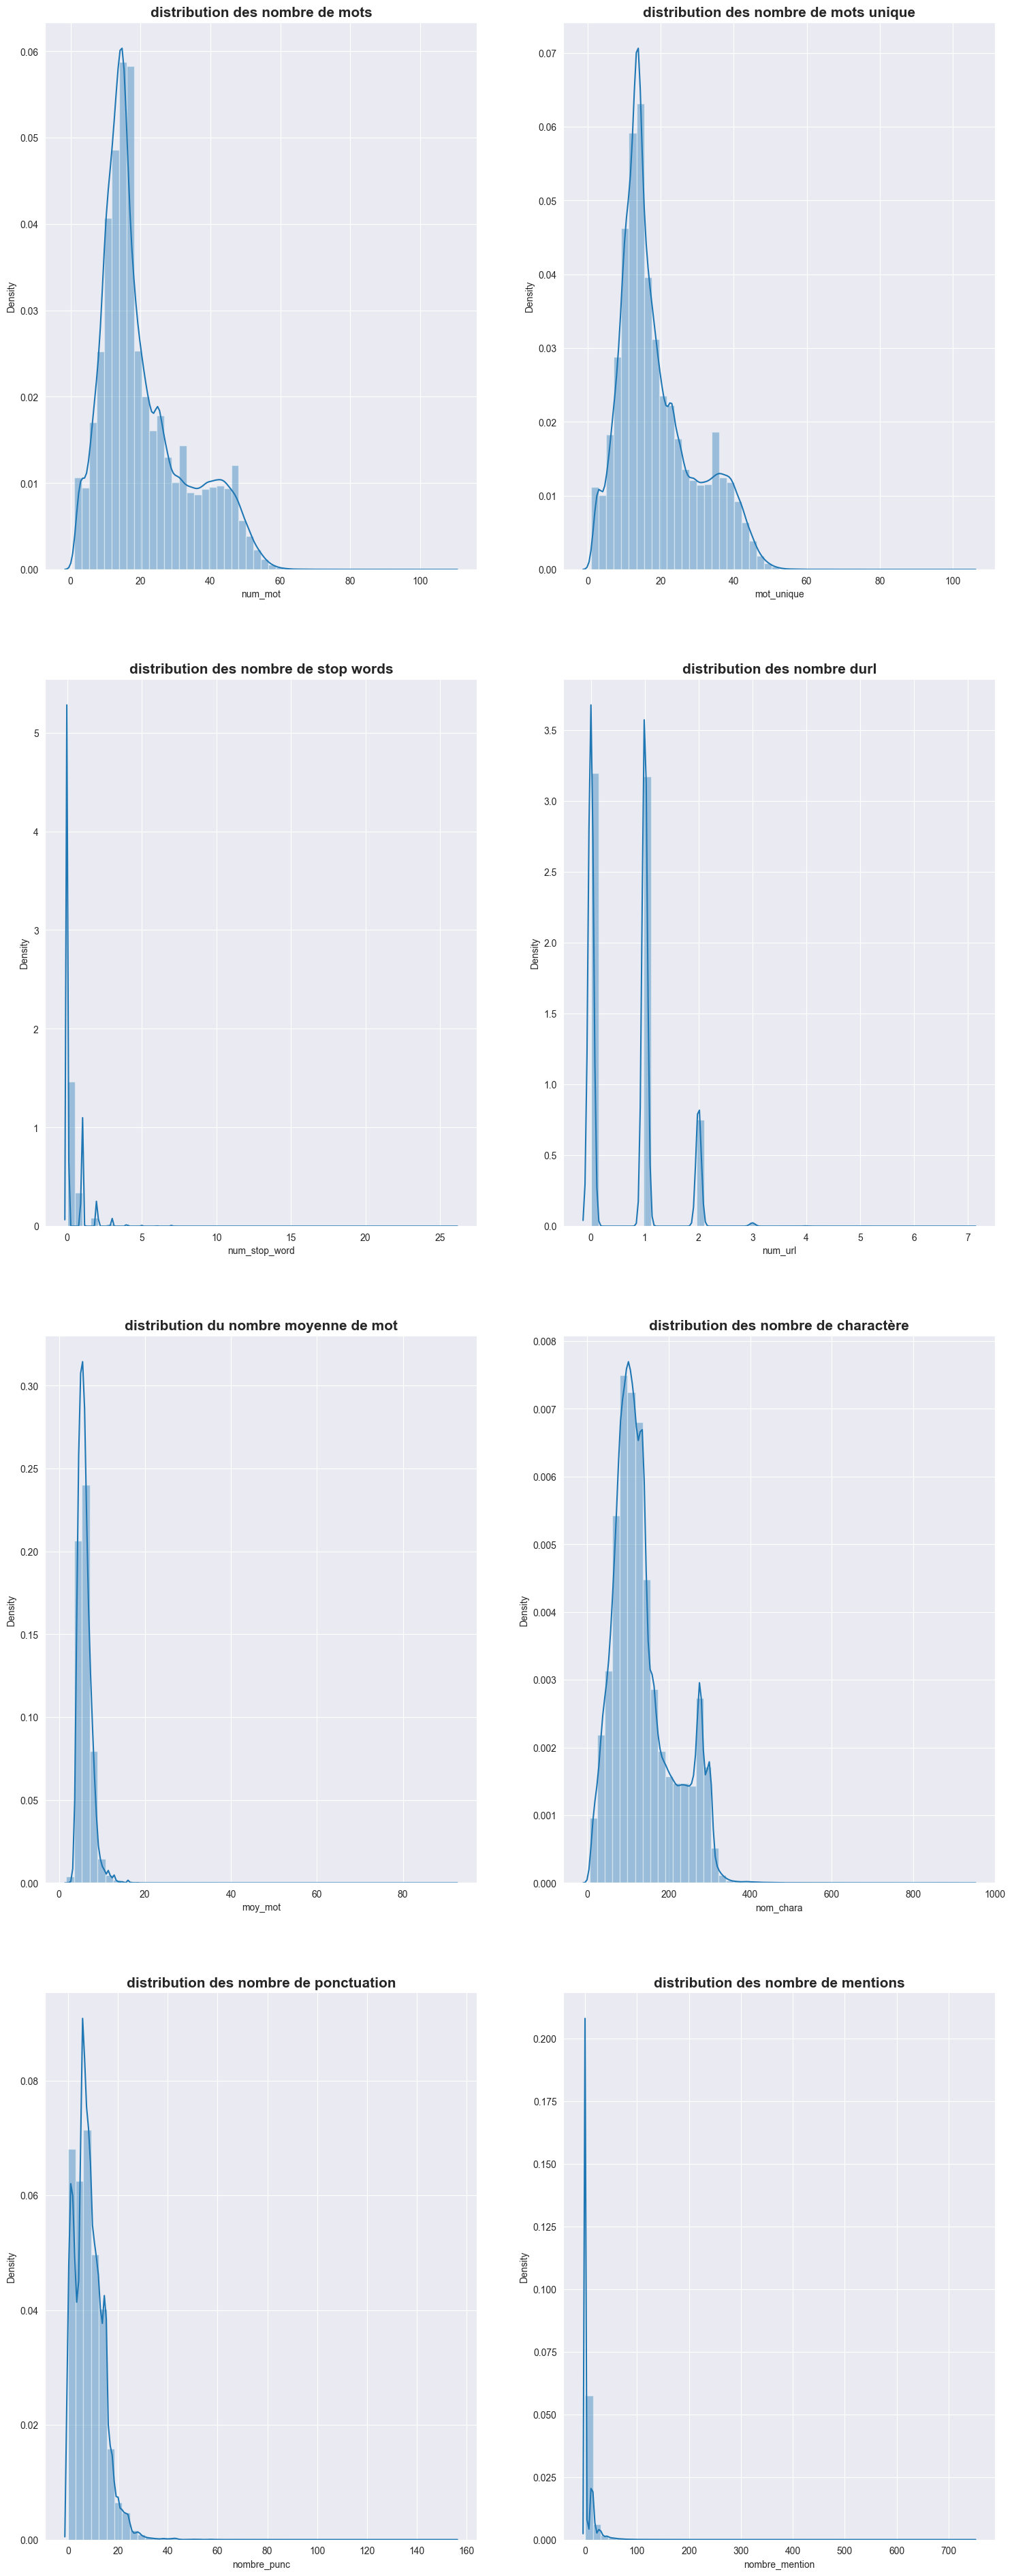

In [47]:
#après la création des feature, on essaie de les visualiser

fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(18,48))

sns.distplot(data['num_mot'],ax=ax[0][0]).set_title(label='distribution des nombre de mots',fontsize=15,fontweight='bold')
sns.distplot(data['mot_unique'],ax=ax[0][1]).set_title(label='distribution des nombre de mots unique',fontsize=15,fontweight='bold')
sns.distplot(data['num_stop_word'],ax=ax[1][0]).set_title(label='distribution des nombre de stop words',fontsize=15,fontweight='bold')
sns.distplot(data['num_url'],ax=ax[1][1]).set_title(label='distribution des nombre d''url',fontsize=15,fontweight='bold')
sns.distplot(data['moy_mot'],ax=ax[2][0]).set_title(label='distribution du nombre moyenne de mot',fontsize=15,fontweight='bold')
sns.distplot(data['nom_chara'],ax=ax[2][1]).set_title(label='distribution des nombre de charactère',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_punc'],ax=ax[3][0]).set_title(label='distribution des nombre de ponctuation',fontsize=15,fontweight='bold')
sns.distplot(data['nombre_mention'],ax=ax[3][1]).set_title(label='distribution des nombre de mentions',fontsize=15,fontweight='bold')
#sns.distplot(data['Non Alphanumeric'],ax=ax[3][1]).set_title(label='distribution des nombre des valeurs numériques',fontsize=15,fontweight='bold')



plt.show()

### Zoom sur les données labelisés par le centre de recherche

In [48]:
data_label=data[data['id_evt']>0]
data_label.reset_index(inplace=True)
data_label=data_label[['tweet_text','tweets_clean','id_evt','num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']]
data_label.head(2)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   

   Non Alphanumeric  
0                31  
1                32

In [49]:
data_label.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  69995.000000  69995.000000  69995.000000   69995.000000  69995.000000   
mean     264.203672     19.231717     17.881363       0.359369      0.489335   
std       46.944447     11.666066     10.061058       0.722610      0.647559   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     91.000000     86.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  69995.000000  69995.000000  69995.000000    69995.000000   
mean       5.537779    121.400486      6.625388        5.221059   
std        1.400458     71.831124      5.632879       14.256061   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560000     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.241379    154.000000     10.000000       10.000000   
max       92.333333    879.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           69995.000000             69995.000000      69995.000000  
mean                0.137867                 0.191714         10.870562  
std                 0.628921                 0.708493          7.975393  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

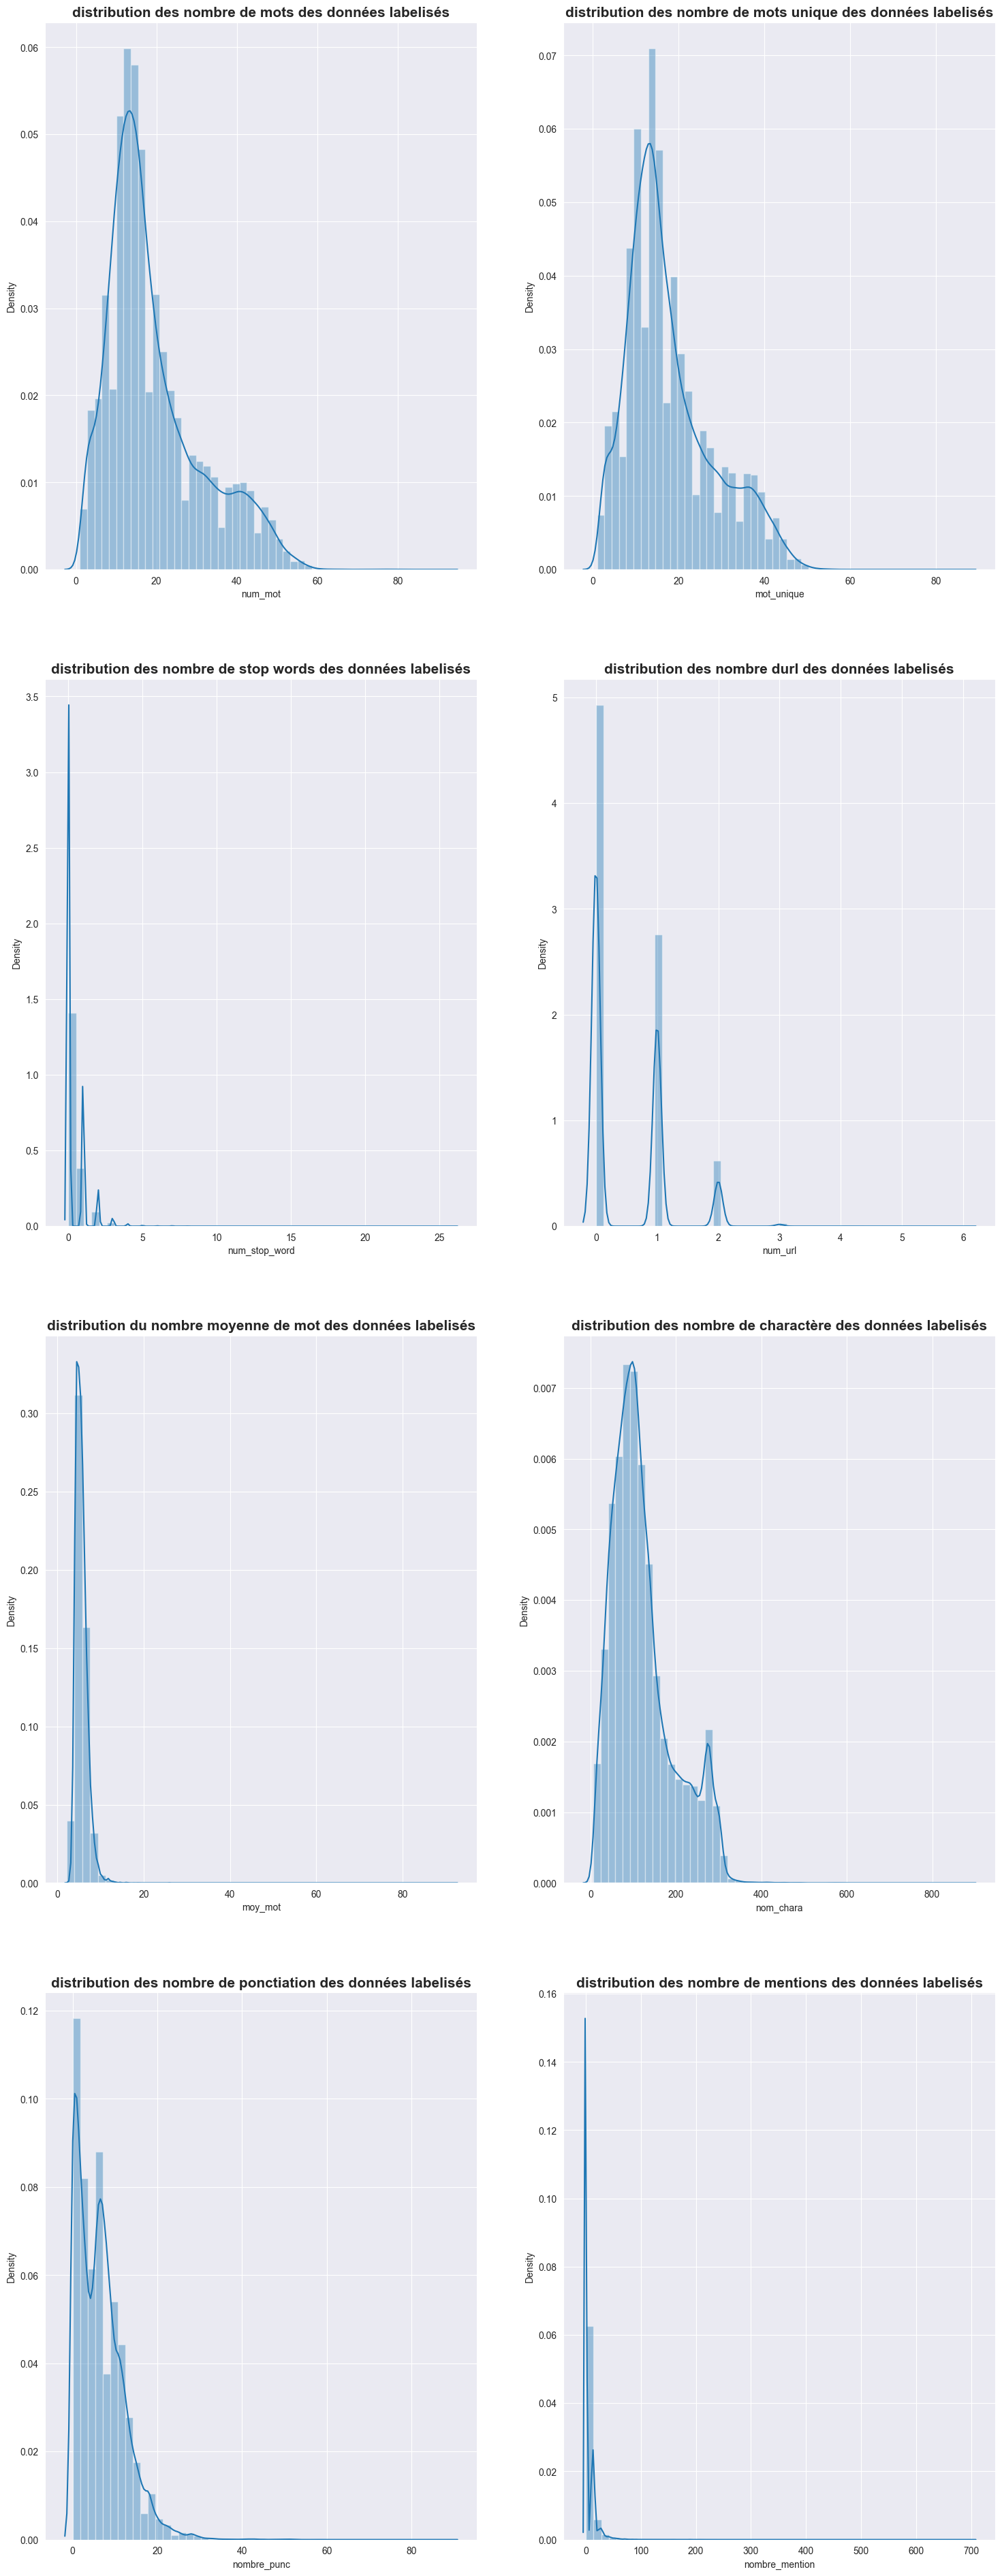

In [50]:
def plot_feature(df):
    
    fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(18,48))

    sns.distplot(df['num_mot'],ax=ax[0][0]).set_title(label='distribution des nombre de mots des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['mot_unique'],ax=ax[0][1]).set_title(label='distribution des nombre de mots unique des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['num_stop_word'],ax=ax[1][0]).set_title(label='distribution des nombre de stop words des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['num_url'],ax=ax[1][1]).set_title(label='distribution des nombre d''url des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['moy_mot'],ax=ax[2][0]).set_title(label='distribution du nombre moyenne de mot des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['nom_chara'],ax=ax[2][1]).set_title(label='distribution des nombre de charactère des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['nombre_punc'],ax=ax[3][0]).set_title(label='distribution des nombre de ponctiation des données labelisés',fontsize=15,fontweight='bold')
    sns.distplot(df['nombre_mention'],ax=ax[3][1]).set_title(label='distribution des nombre de mentions des données labelisés',fontsize=15,fontweight='bold')

    plt.show()

plot_feature(data_label)

### tokenize du text des données labelisées

In [51]:
tokens=[]

for t in data_label['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data_label['word_tokens']=tokens

In [52]:
data_label.head(5)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   
4  Tremblement de terre M4.9 - South Of Java, Ind...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   254.0       32   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   254.0       33   
4  Tremblement de terre M4.9 - South Of Java, Ind...   254.0       34   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   
2          29              1        2  5.718750        214           28   
3          30              1        2  5.696970        220           28   
4          31              2        2  5.588235        223           28   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   
2               0                      0                        0   
3               0                      0                        0   
4               0                      0                        0   

   Non Alphanumeric                                        word_tokens  
0                31  [Tremblement, de, terre, M4, 3, 171km, W, of, ...  
1                32  [Tremblement, de, terre, M3, 5, Near, North, C...  
2                31  [Tremblement, de, terre, M3, 3, Java, Indonesi...  
3                31  [Tremblement, de, terre, M4, 4, Irian, Jaya, I...  
4                31  [Tremblement, de, terre, M4, 9, South, Of, Jav...

In [53]:
# remove stop words

tokens=[]

for t in data_label['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data_label['word_tokens']=tokens

filtred_words=[]

for c in data_label['word_tokens']:
    
    filterd=[w for w in c if not w in stop_word]
    
    filtred_words.append(' '.join(filterd))
data_label['text_after_preprocess']=filtred_words



In [54]:
data_label['text_after_preprocess']=filtred_words
data_label.head(5)

tweet_text  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   
1  Tremblement de terre M3.5 - Near North Coast o...   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   
4  Tremblement de terre M4.9 - South Of Java, Ind...   

                                        tweets_clean  id_evt  num_mot  \
0  Tremblement de terre M4.3 - 171km W of Port Ha...   254.0       36   
1  Tremblement de terre M3.5 - Near North Coast o...   254.0       37   
2  Tremblement de terre M3.3 - Java, Indonesia - ...   254.0       32   
3  Tremblement de terre M4.4 - Irian Jaya, Indone...   254.0       33   
4  Tremblement de terre M4.9 - South Of Java, Ind...   254.0       34   

   mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
0          32              2        2  5.361111        228           28   
1          34              2        2  5.513514        240           29   
2          29              1        2  5.718750        214           28   
3          30              1        2  5.696970        220           28   
4          31              2        2  5.588235        223           28   

   nombre_mention  num_point_exclamation  num_point_interrogation  \
0               0                      0                        0   
1               0                      0                        0   
2               0                      0                        0   
3               0                      0                        0   
4               0                      0                        0   

   Non Alphanumeric                                        word_tokens  \
0                31  [Tremblement, de, terre, M4, 3, 171km, W, of, ...   
1                32  [Tremblement, de, terre, M3, 5, Near, North, C...   
2                31  [Tremblement, de, terre, M3, 3, Java, Indonesi...   
3                31  [Tremblement, de, terre, M4, 4, Irian, Jaya, I...   
4                31  [Tremblement, de, terre, M4, 9, South, Of, Jav...   

                               text_after_preprocess  
0  Tremblement terre M4 3 171km W Port Hardy Cana...  
1  Tremblement terre M3 5 Near North Coast Irian ...  
2  Tremblement terre M3 3 Java Indonesia sam 3 ao...  
3  Tremblement terre M4 4 Irian Jaya Indonesia sa...  
4  Tremblement terre M4 9 South Of Java Indonesia...

## Analyse de sentiment sur les données labelisés

- Description de la méthode des sentiment. plage [-1,1]

- Puisqu'on a des données labelisés comme 1 (60000), l le but est de chercher les 0

- En analysant les données labelisés, nous reposerons sur la méthode d'analyse de sentiment pour labelisés les données. On a fixé un seuil supérieur de 0.85 pour considéré que le tweet est extrement positive donc labelisé comme 0 et négative pour un seuil inférieur à 0.6.



In [55]:
data_label['text_after_preprocess'] = data_label['text_after_preprocess'].str.replace('\d+', '')
#supress

In [56]:
sentiment_list=[]

for i in data_label['text_after_preprocess']:
    
    vs=TextBlob(i).sentiment[0]
    
    if vs>0.85:
        sentiment_list.append('Positive')
    elif vs<0.6:
        sentiment_list.append('Negatif')
        
    else:
        sentiment_list.append('Neutre')
        
data_label['sentiment']=sentiment_list

In [57]:
import plotly.express as px
fig=px.histogram(data_label,x='sentiment',color='sentiment')
fig.show()

In [58]:
data_label.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  69995.000000  69995.000000  69995.000000   69995.000000  69995.000000   
mean     264.203672     19.231717     17.881363       0.359369      0.489335   
std       46.944447     11.666066     10.061058       0.722610      0.647559   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     91.000000     86.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  69995.000000  69995.000000  69995.000000    69995.000000   
mean       5.537779    121.400486      6.625388        5.221059   
std        1.400458     71.831124      5.632879       14.256061   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560000     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.241379    154.000000     10.000000       10.000000   
max       92.333333    879.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           69995.000000             69995.000000      69995.000000  
mean                0.137867                 0.191714         10.870562  
std                 0.628921                 0.708493          7.975393  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

## Analyse de mot sur les données positives.

In [59]:
positive_data=data_label[data_label['sentiment']=='Positive']
i=positive_data.sample(1).index[0]

print('texte réel : {}'.format(positive_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(positive_data['tweets_clean'][i]))

texte réel : @asijpntrvl les petites îles ca peut être bien genre c'est plus calme on avait fait Kos en 2013 c'était excellent (Mais y a eu un tremblement de terre en 2017 jcrois😶😶) et c'était en face de la Turquie du coup en 20min de ferry on a atterri à bodrum (bcp tro magnifique la turquie)
----------------
text modifie :  les petites îles ca peut être bien genre c'est plus calme on avait fait Kos en 2013 c'était excellent (Mais y a eu un tremblement de terre en 2017 jcrois😶😶) et c'était en face de la Turquie du coup en 20min de ferry on a atterri à bodrum (bcp tro magnifique la turquie)


In [60]:
positive_data.describe()

id_evt    num_mot  mot_unique  num_stop_word    num_url    moy_mot  \
count   33.000000  33.000000   33.000000      33.000000  33.000000  33.000000   
mean   279.303030  24.696970   23.212121       1.575758   0.969697   5.901265   
std     53.122785   9.491723    8.146155       1.714466   0.951474   1.574412   
min    227.000000   5.000000    5.000000       0.000000   0.000000   3.461538   
25%    227.000000  21.000000   20.000000       0.000000   0.000000   4.900000   
50%    271.000000  25.000000   24.000000       1.000000   1.000000   5.750000   
75%    340.000000  28.000000   27.000000       2.000000   2.000000   6.238095   
max    356.000000  54.000000   45.000000       8.000000   2.000000  12.400000   

        nom_chara  nombre_punc  nombre_mention  num_point_exclamation  \
count   33.000000    33.000000       33.000000              33.000000   
mean   163.818182    10.848485        5.696970               0.424242   
std     57.399072     6.428069        9.856739               0.867118   
min     52.000000     0.000000        0.000000               0.000000   
25%    134.000000     5.000000        0.000000               0.000000   
50%    178.000000     9.000000        0.000000               0.000000   
75%    190.000000    17.000000       12.000000               0.000000   
max    281.000000    21.000000       30.000000               3.000000   

       num_point_interrogation  Non Alphanumeric  
count                33.000000         33.000000  
mean                  0.151515         18.000000  
std                   0.364110          9.855202  
min                   0.000000          2.000000  
25%                   0.000000          8.000000  
50%                   0.000000         15.000000  
75%                   0.000000         27.000000  
max                   1.000000         31.000000

In [61]:
positive_data.head(2)

tweet_text  \
466   Le petit tremblement de terre à peine deux heu...   
3296  @Polony_tv excellent résumé ! la sortie de l'I...   

                                           tweets_clean  id_evt  num_mot  \
466   Le petit tremblement de terre à peine deux heu...   264.0       22   
3296  _tv excellent résumé ! la sortie de l'Italie s...   227.0       25   

      mot_unique  num_stop_word  num_url   moy_mot  nom_chara  nombre_punc  \
466           21              0        0  5.272727        137            5   
3296          21              0        0  4.600000        140            7   

      nombre_mention  num_point_exclamation  num_point_interrogation  \
466                0                      1                        0   
3296              12                      3                        0   

      Non Alphanumeric                                        word_tokens  \
466                  7  [Le, petit, tremblement, de, terre, à, peine, ...   
3296                13  [_tv, excellent, résumé, la, sortie, de, l, It...   

                                  text_after_preprocess sentiment  
466   Le petit tremblement terre peine deux heures a...  Positive  
3296  _tv excellent résumé sortie Italie brèche zone...  Positive

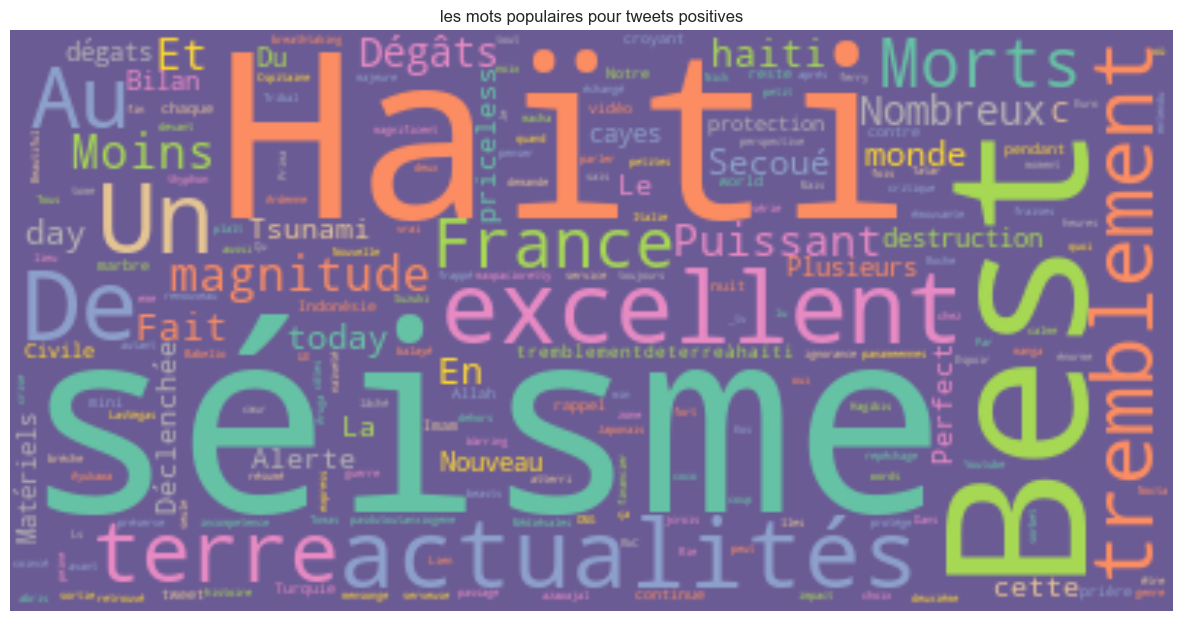

In [62]:
positive_text=" ".join(i for i in positive_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(positive_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('les mots populaires pour tweets positives')
plt.show()

## Analyse de mot sur les données neutres.

In [63]:
Neutral_data=data_label[data_label['sentiment']=='Neutre']
i=Neutral_data.sample(1).index[0]

print('texte réel : {}'.format(Neutral_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(Neutral_data['tweets_clean'][i]))

texte réel : @LeaStreliski Tremblement de terre Laval (Ste-Rose)
----------------
text modifie :  Tremblement de terre Laval (Ste-Rose)


In [64]:
Neutral_data.describe()

id_evt     num_mot  mot_unique  num_stop_word     num_url  \
count  167.000000  167.000000  167.000000     167.000000  167.000000   
mean   273.994012   20.143713   18.502994       0.473054    0.251497   
std     47.672009   13.543004   11.789251       0.949409    0.499621   
min    157.000000    3.000000    3.000000       0.000000    0.000000   
25%    227.000000    8.500000    8.500000       0.000000    0.000000   
50%    251.000000   19.000000   17.000000       0.000000    0.000000   
75%    312.000000   29.000000   26.000000       1.000000    0.000000   
max    384.000000   57.000000   52.000000       7.000000    3.000000   

          moy_mot   nom_chara  nombre_punc  nombre_mention  \
count  167.000000  167.000000   167.000000      167.000000   
mean     5.381500  123.532934     7.017964        7.508982   
std      1.257344   82.647443     6.583544       15.898726   
min      3.500000   14.000000     0.000000        0.000000   
25%      4.561250   51.000000     2.000000        0.000000   
50%      5.285714  118.000000     5.000000        0.000000   
75%      6.000000  179.000000    11.000000       12.500000   
max     12.333333  379.000000    33.000000      127.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count             167.000000               167.000000        167.000000  
mean                0.257485                 0.197605         11.239521  
std                 1.124557                 0.583297         10.070959  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          3.000000  
50%                 0.000000                 0.000000          8.000000  
75%                 0.000000                 0.000000         17.000000  
max                12.000000                 5.000000         40.000000

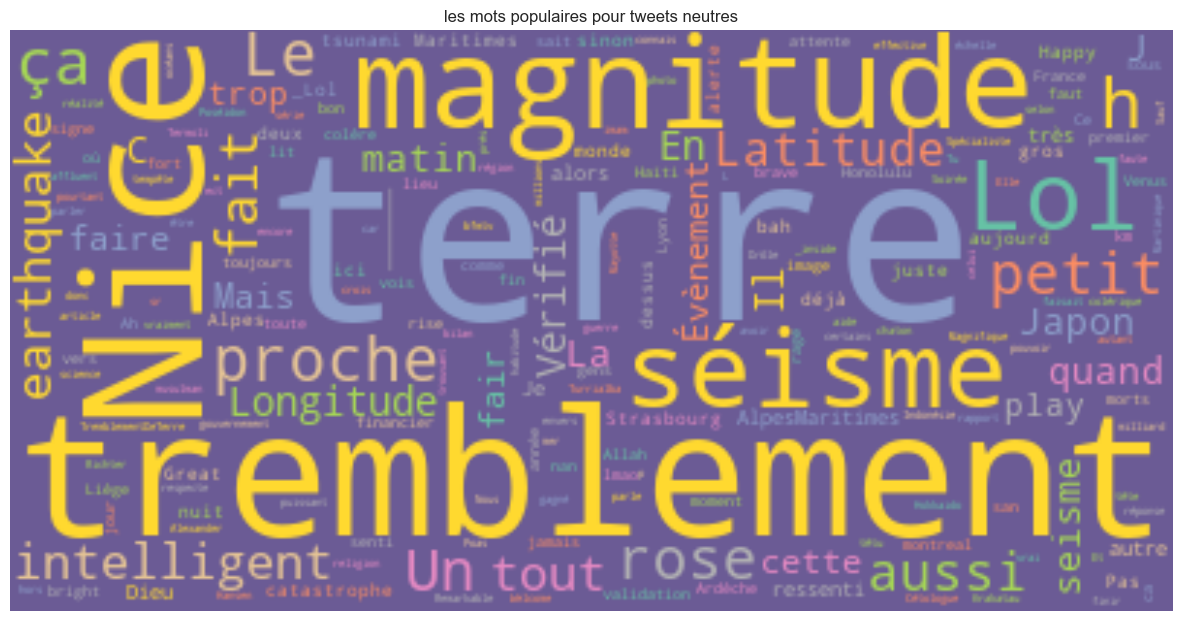

In [65]:

neutral_text=" ".join(i for i in Neutral_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(neutral_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('les mots populaires pour tweets neutres')
plt.show()

In [66]:
Negatif_data=data_label[data_label['sentiment']=='Negatif']
i=Negatif_data.sample(1).index[0]

print('texte réel : {}'.format(Negatif_data['tweet_text'][i]))

print('----------------')

print('text modifie : {}'.format(Negatif_data['tweets_clean'][i]))

texte réel : @Euziaaa bb y a eu un tremblement de terre a alger sauve moi nik yemak
----------------
text modifie :  bb y a eu un tremblement de terre a alger sauve moi nik yemak


In [67]:
Negatif_data.describe()

id_evt       num_mot    mot_unique  num_stop_word       num_url  \
count  69795.000000  69795.000000  69795.000000   69795.000000  69795.000000   
mean     264.173107     19.226950     17.877355       0.358521      0.489677   
std       46.936755     11.661622     10.056818       0.720721      0.647519   
min      153.000000      1.000000      1.000000       0.000000      0.000000   
25%      227.000000     11.000000     11.000000       0.000000      0.000000   
50%      249.000000     16.000000     15.000000       0.000000      0.000000   
75%      312.000000     25.000000     23.000000       1.000000      1.000000   
max      386.000000     91.000000     86.000000      26.000000      6.000000   

            moy_mot     nom_chara   nombre_punc  nombre_mention  \
count  69795.000000  69795.000000  69795.000000    69795.000000   
mean       5.537981    121.375328      6.622451        5.215359   
std        1.400673     71.804436      5.629334       14.253395   
min        2.166667      6.000000      0.000000        0.000000   
25%        4.560000     70.000000      2.000000        0.000000   
50%        5.333333    105.000000      6.000000        0.000000   
75%        6.243573    154.000000     10.000000       10.000000   
max       92.333333    879.000000     89.000000      704.000000   

       num_point_exclamation  num_point_interrogation  Non Alphanumeric  
count           69795.000000             69795.000000      69795.000000  
mean                0.137445                 0.191719         10.866308  
std                 0.627096                 0.708894          7.967373  
min                 0.000000                 0.000000          0.000000  
25%                 0.000000                 0.000000          5.000000  
50%                 0.000000                 0.000000         10.000000  
75%                 0.000000                 0.000000         15.000000  
max                30.000000                19.000000         95.000000

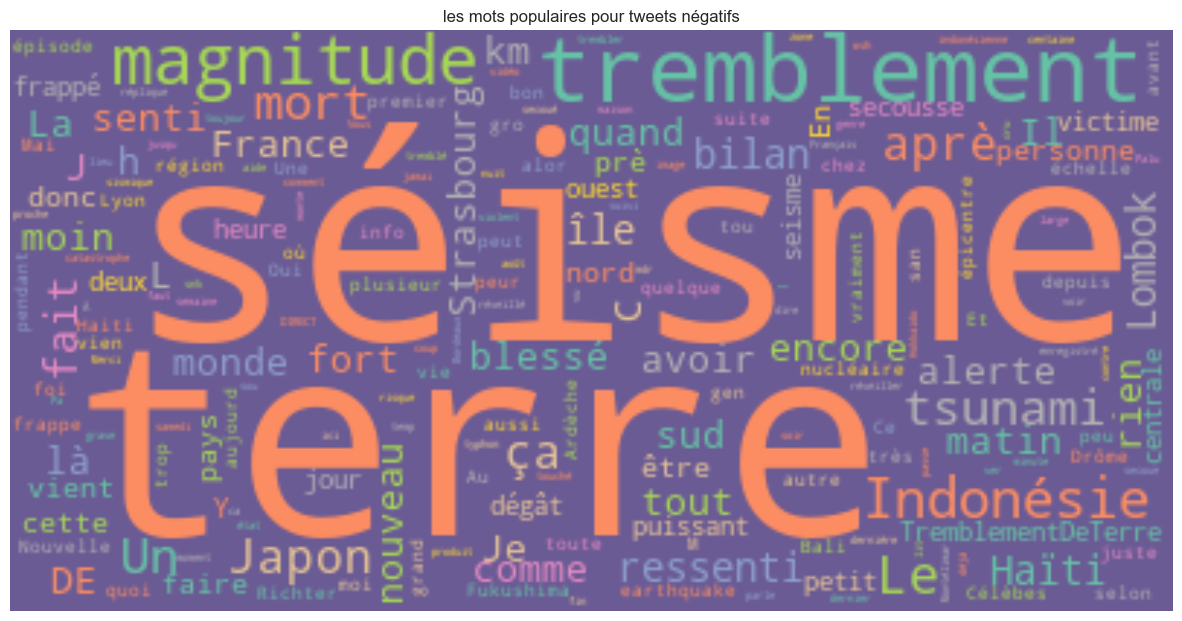

In [68]:
negatif_text=" ".join(i for i in Negatif_data.text_after_preprocess)

wordcloud=WordCloud(background_color="#6B5B95",
                   colormap="Set2",
                   collocations=False).generate(negatif_text)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('les mots populaires pour tweets négatifs')
plt.show()

### Remarques : 
- Après la fixation du seuil de sentiment positif et négatif, on a vérfié à l'aide des words cloud si le seuil donne des résultats cohérents. Effectivement on a retrouvé sur le word cloud des tweets positifs une dominance des mots comme **beau, magnifique...** et pour les tweets négatifs on retrouve plus des données **sur le lieu, la magnitude, le bilan et les morts**

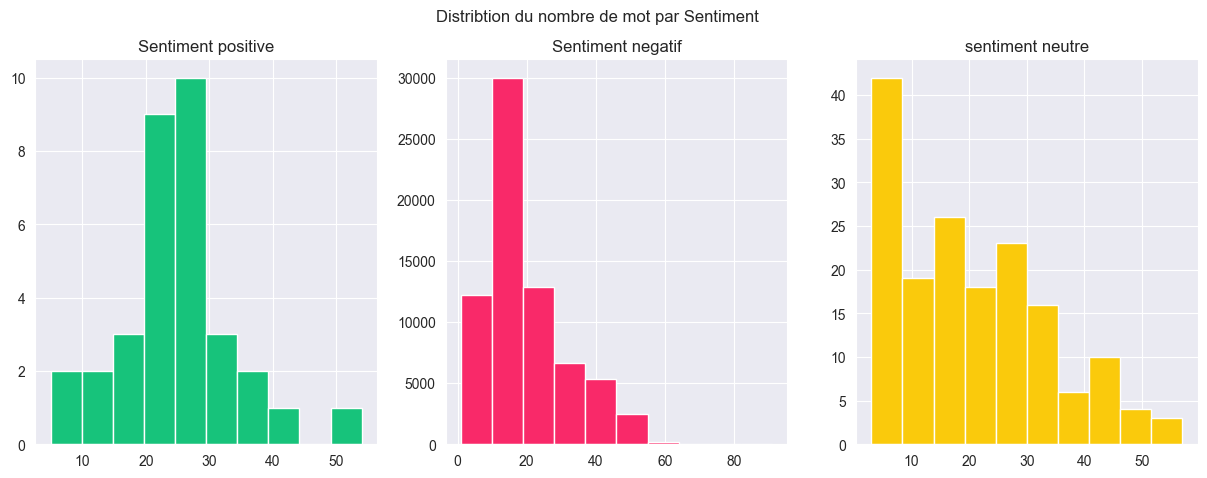

In [69]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['num_mot'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['num_mot'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['num_mot'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de mot par Sentiment')
plt.show()

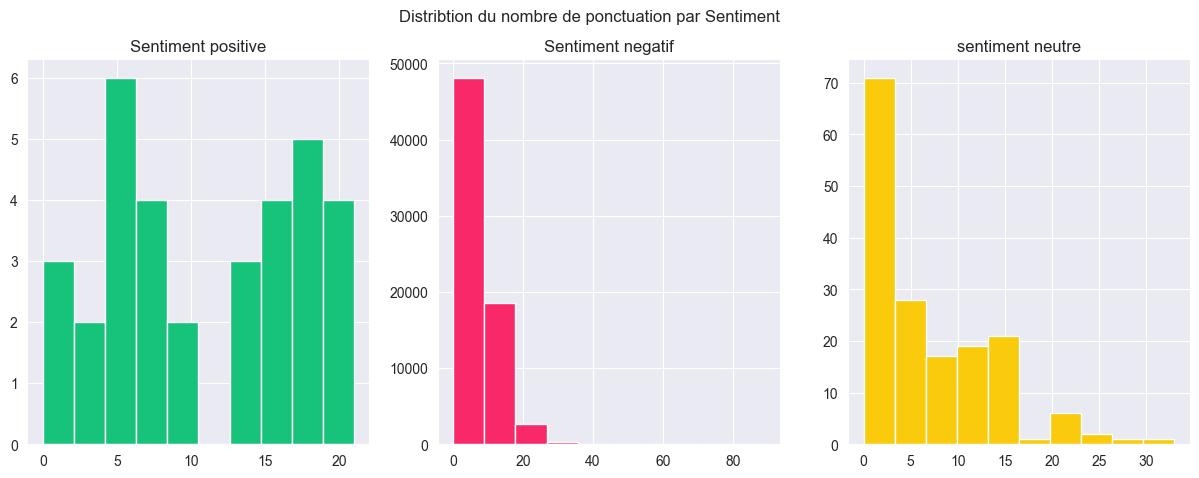

In [70]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['nombre_punc'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['nombre_punc'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['nombre_punc'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de ponctuation par Sentiment')
plt.show()

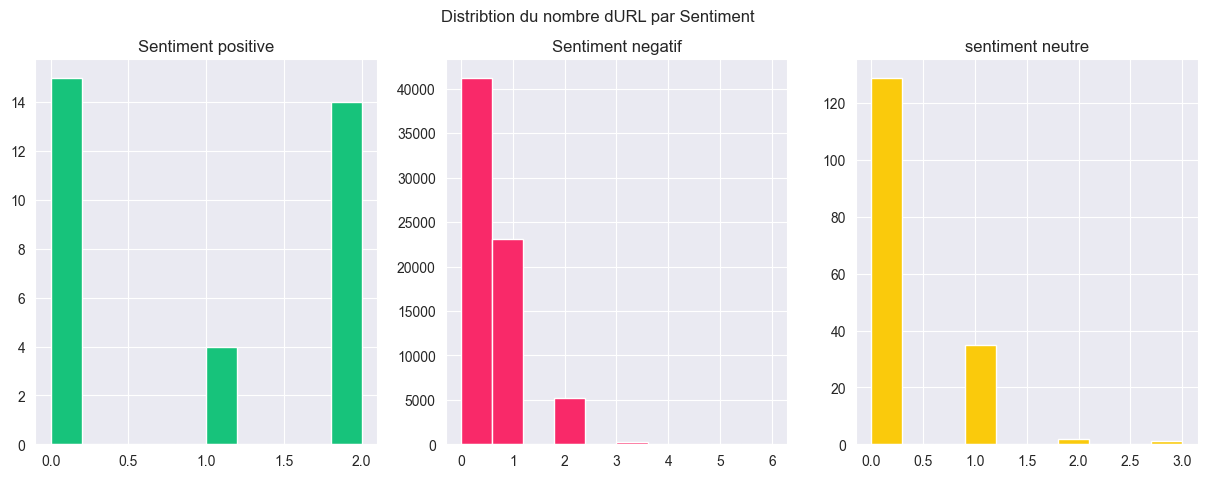

In [71]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['num_url'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['num_url'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['num_url'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre d''URL par Sentiment')
plt.show()

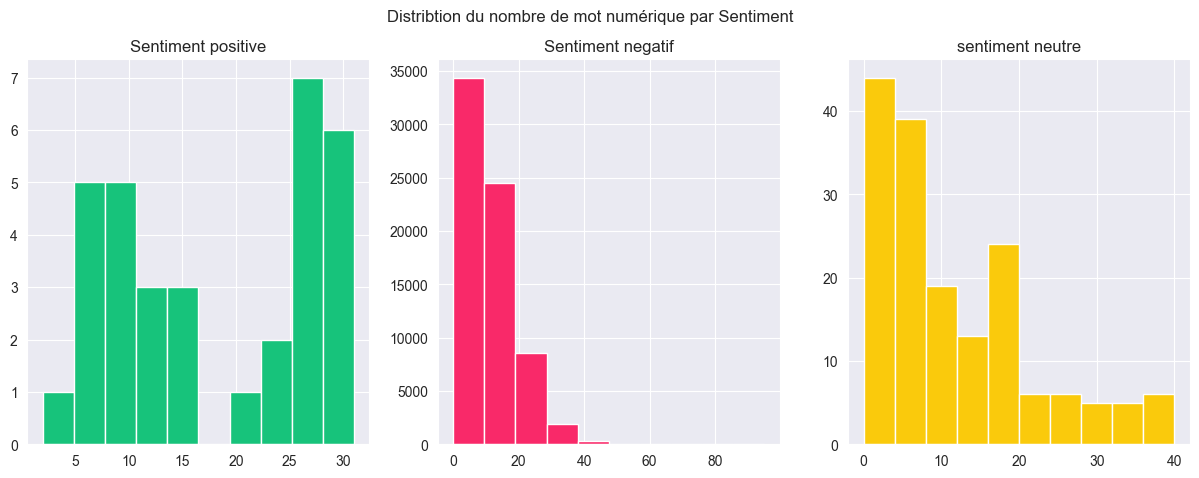

In [72]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

ax1.hist(positive_data['Non Alphanumeric'],color="#17C37B")
ax1.set_title('Sentiment positive')

ax2.hist(Negatif_data['Non Alphanumeric'],color='#F92969')
ax2.set_title('Sentiment negatif')

ax3.hist(Neutral_data['Non Alphanumeric'],color='#FACA0C')
ax3.set_title('sentiment neutre')

fig.suptitle('Distribtion du nombre de mot numérique par Sentiment')
plt.show()

### visualisation des mots les plus fréquentes par sentiment

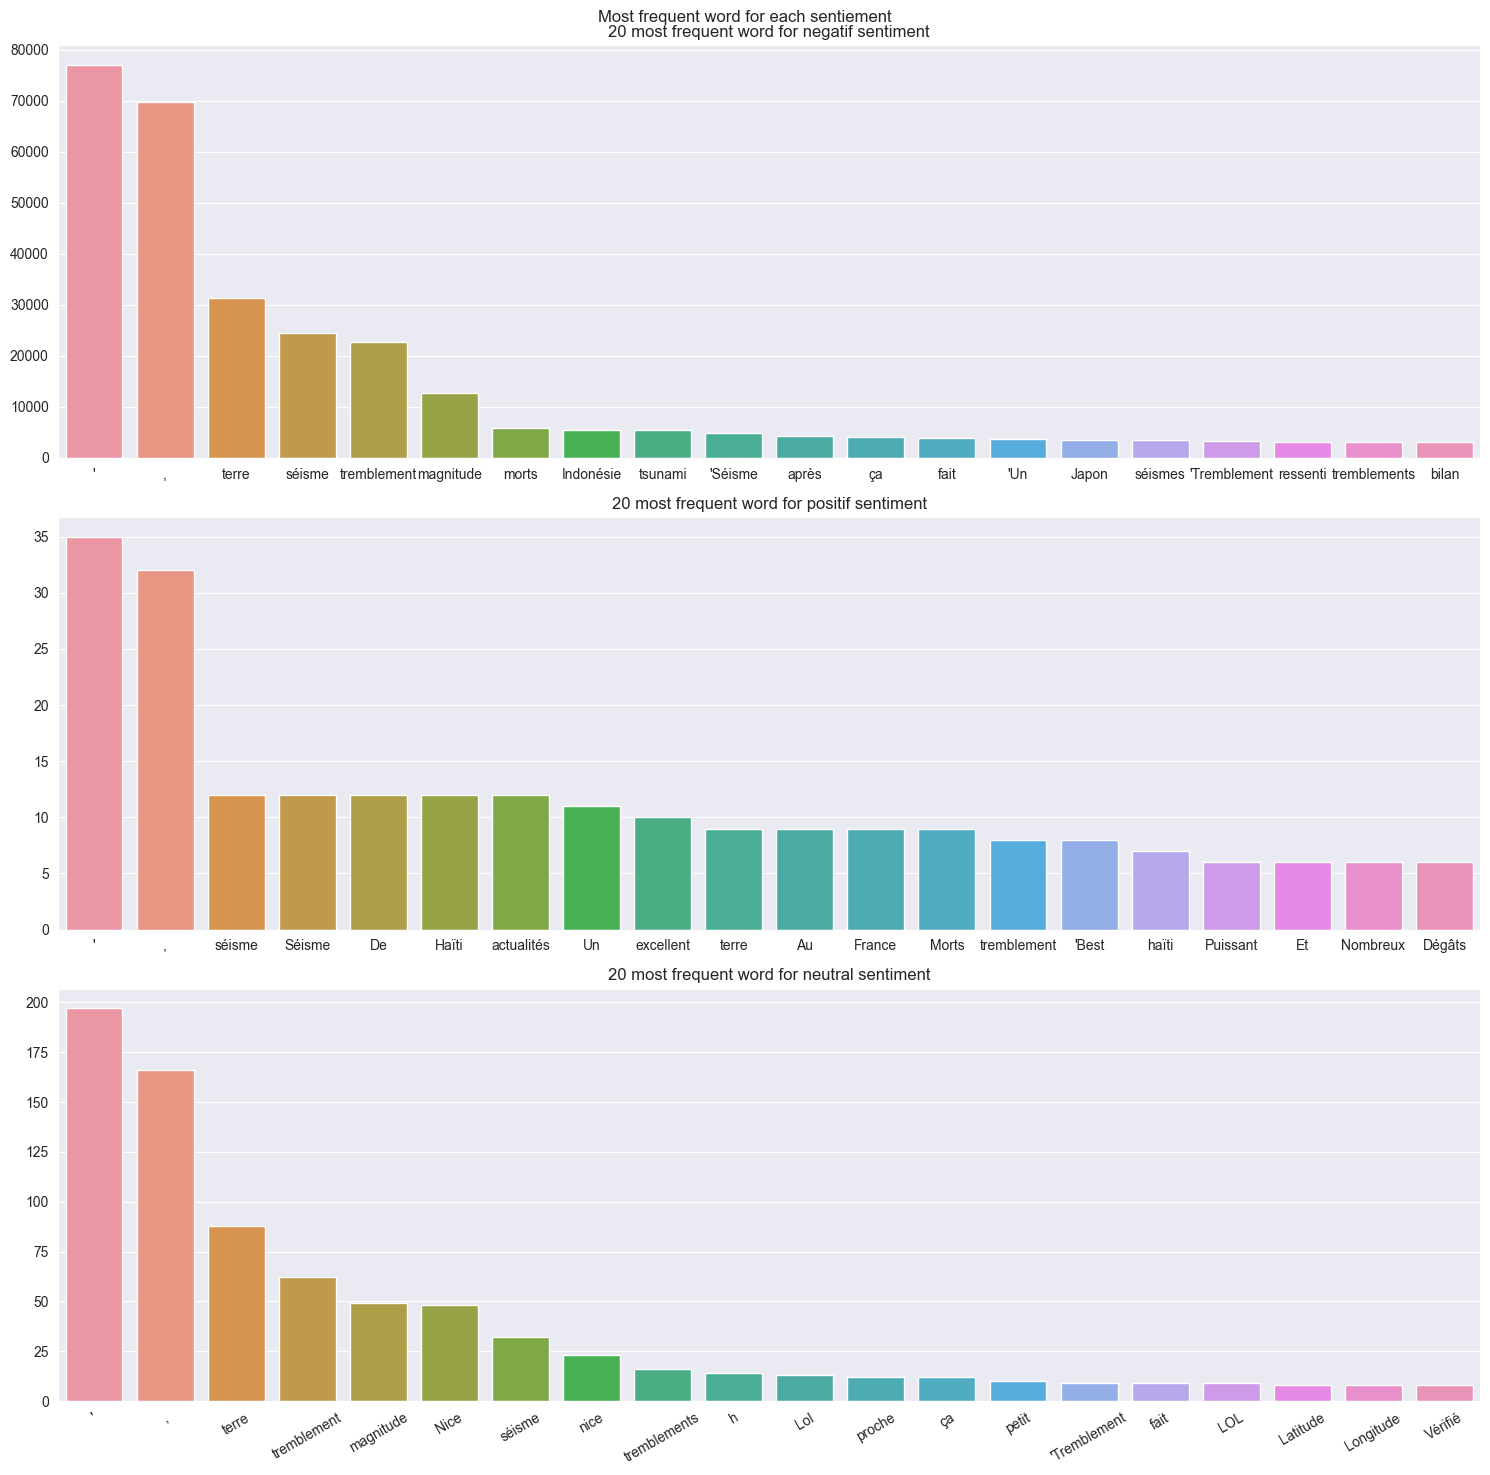

In [73]:
# creating freqDistrubtion for neutral sentiment
#nltk.download('all')
word_neutral=[]

for w in Neutral_data['text_after_preprocess']:
    
    word_neutral.append(w)
    
tokens=nltk.word_tokenize(str(word_neutral),language='french')
    
frequence_dist=nltk.FreqDist(tokens).most_common(20)
frequence_dist_neutral=pd.Series(dict(frequence_dist))

# creating freqDistrubtion for positive sentiment


word_positif=[]

for w in positive_data['text_after_preprocess']:
    
    word_positif.append(w)
    
tokens=nltk.word_tokenize(str(word_positif),language='french')
    
frequence_dist_pos=nltk.FreqDist(tokens).most_common(20)
frequence_dist_pos=pd.Series(dict(frequence_dist_pos))


# creating freqDistrubtion for negatif sentiment
word_negatif=[]

for w in Negatif_data['text_after_preprocess']:
    
    word_negatif.append(w)
    
tokens=nltk.word_tokenize(str(word_negatif),language='french')
    
frequence_dist_neg=nltk.FreqDist(tokens).most_common(20)
frequence_dist_negatif=pd.Series(dict(frequence_dist_neg))


fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(15,15))

sns.barplot(x=frequence_dist_negatif.index,y=frequence_dist_negatif.values,ax=ax1)
ax1.set_title('20 most frequent word for negatif sentiment')
plt.xticks(rotation=45)

sns.barplot(x=frequence_dist_pos.index,y=frequence_dist_pos.values,ax=ax2)
ax2.set_title('20 most frequent word for positif sentiment')
plt.xticks(rotation=45)

sns.barplot(x=frequence_dist_neutral.index,y=frequence_dist_neutral.values,ax=ax3)
ax3.set_title('20 most frequent word for neutral sentiment')
plt.xticks(rotation=30)


fig.suptitle('Most frequent word for each sentiement')

plt.tight_layout()
plt.show()


### Remarque sur l'analyse des mots fréquents:
- on peut remarquer la présence des mots comme Terre,lombok,un: chaque mot seul ne reflète pas une signification précise ainsi on préfère avoir une combinaison de mots par exemple savoir le nombre de fois où le mot **Tremblement de terre** se répète 

- Pour y parvenir on utilisera la méthode **N-gram**.

### N-gram

---

<center><img style="width: 700px;" src="https://images.deepai.org/glossary-terms/867de904ba9b46869af29cead3194b6c/8ARA1.png"></center>

---
<i>Source: Image from Google</i>

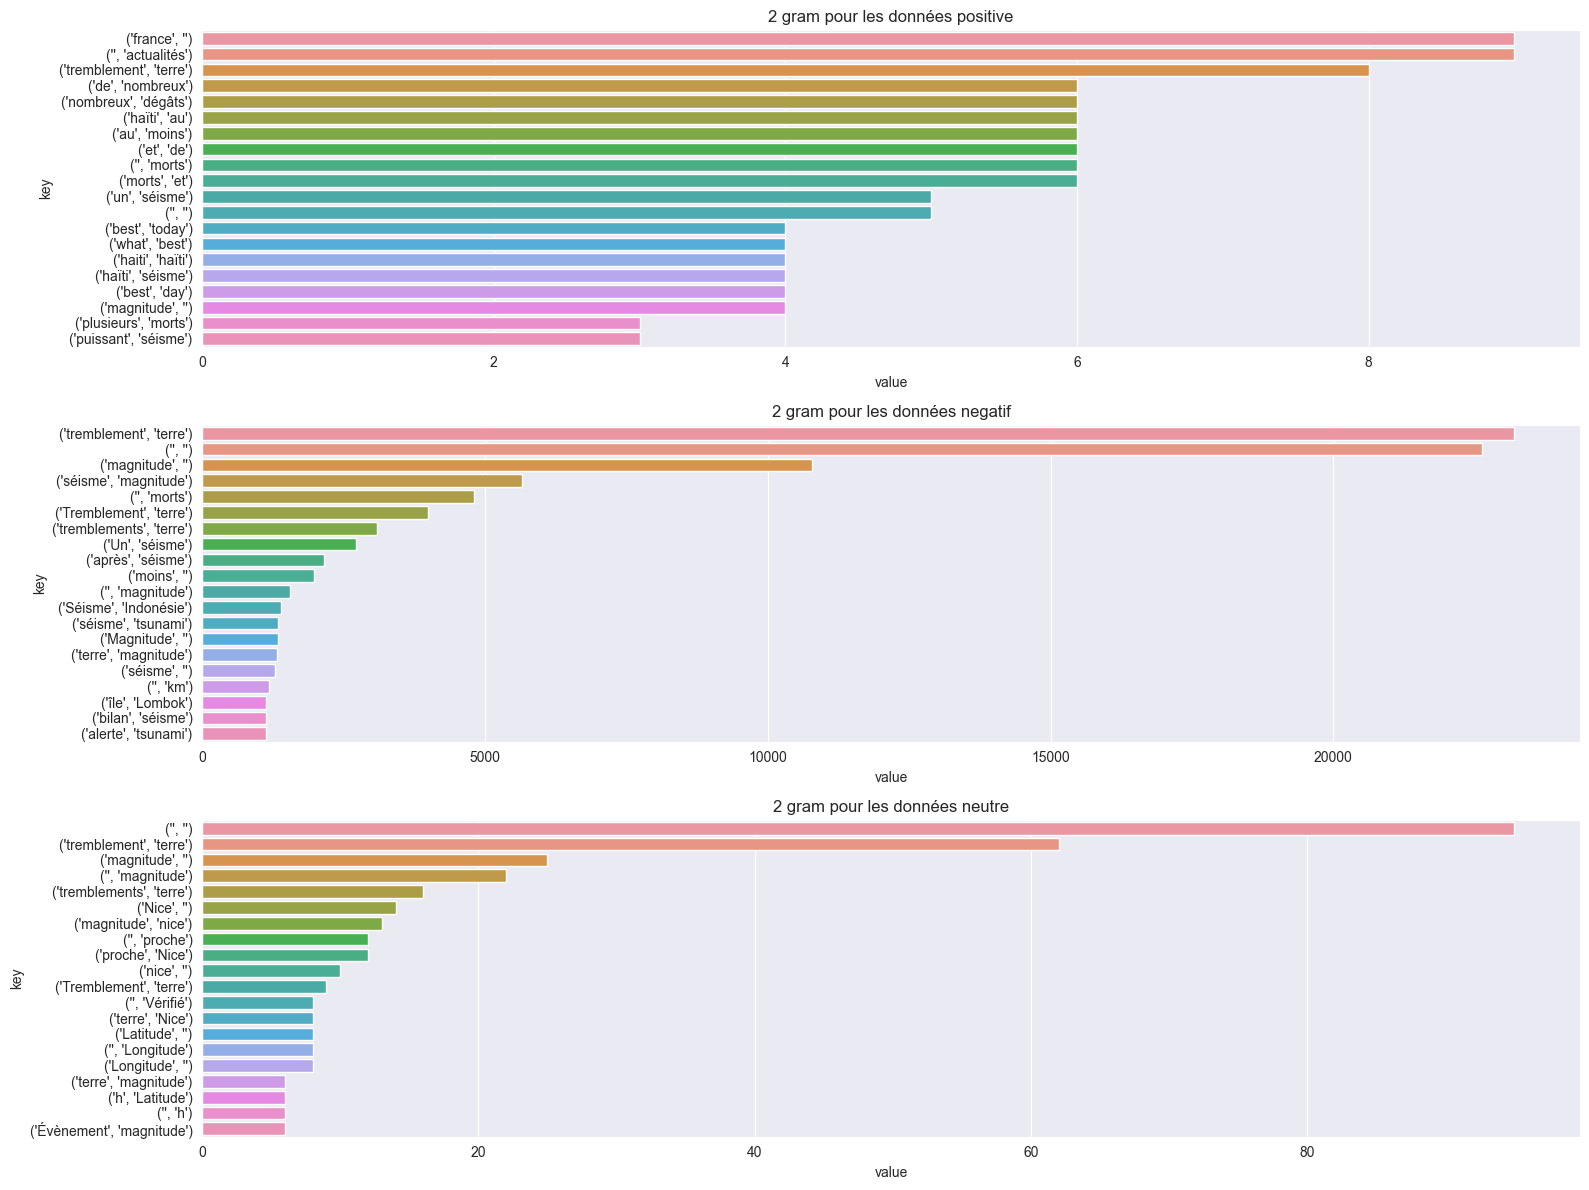

In [74]:

#2 gram pour les postive
text_positive=' '.join(positive_data['text_after_preprocess'])
str_val_pos=text_positive.lower().split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_pos, 2)).value_counts())[:20]

data_unigram_df_pos=pd.DataFrame(data_unigram)
data_unigram_df_pos= data_unigram_df_pos.reset_index()
data_unigram_df_pos= data_unigram_df_pos.rename(columns={"index": "key", 0: "value"})

#2 gram Negative data

text_neg=' '.join(Negatif_data['text_after_preprocess'])
str_val_neg=text_neg.split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_neg, 2)).value_counts())[:20]

data_unigram_df_neg=pd.DataFrame(data_unigram)
data_unigram_df_neg= data_unigram_df_neg.reset_index()
data_unigram_df_neg= data_unigram_df_neg.rename(columns={"index": "key", 0: "value"})

#2 gram Neutral data

text_neu=' '.join(Neutral_data['text_after_preprocess'])
str_val_neu=text_neu.split(" ")

data_unigram_neu=(pd.Series(nltk.ngrams(str_val_neu, 2)).value_counts())[:20]

data_unigram_neu=pd.DataFrame(data_unigram_neu)
data_unigram_neu= data_unigram_neu.reset_index()
data_unigram_neu= data_unigram_neu.rename(columns={"index": "key", 0: "value"})



#visualisation

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize = (16,12))

sns.barplot(x='value',y='key', data=data_unigram_df_pos,ax=ax1).set_title('2 gram pour les données positive')

sns.barplot(x='value',y='key', data=data_unigram_df_neg,ax=ax2).set_title('2 gram pour les données negatif')

sns.barplot(x='value',y='key', data=data_unigram_neu,ax=ax3).set_title('2 gram pour les données neutre')

fig.tight_layout()
plt.show()

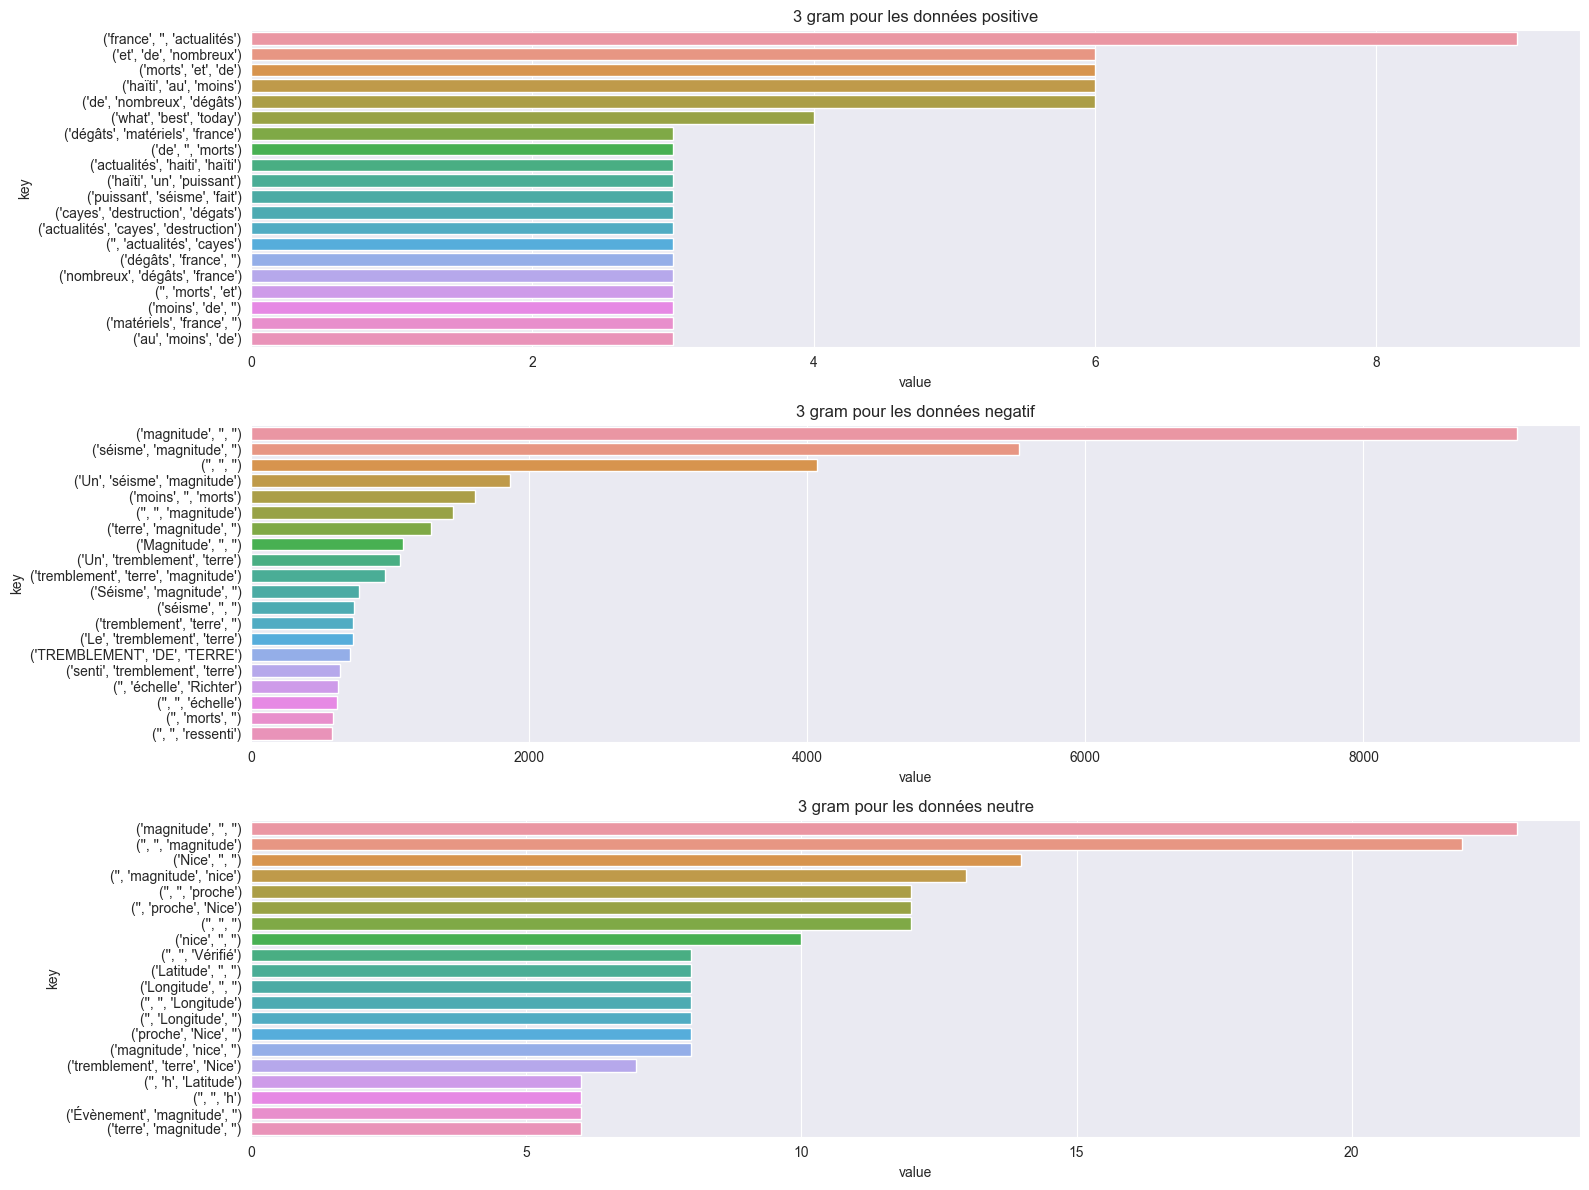

In [75]:

#3 gram pour les postive
text_positive=' '.join(positive_data['text_after_preprocess'])
str_val_pos=text_positive.lower().split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_pos, 3)).value_counts())[:20]

data_unigram_df_pos=pd.DataFrame(data_unigram)
data_unigram_df_pos= data_unigram_df_pos.reset_index()
data_unigram_df_pos= data_unigram_df_pos.rename(columns={"index": "key", 0: "value"})

#3 gram Negative data

text_neg=' '.join(Negatif_data['text_after_preprocess'])
str_val_neg=text_neg.split(" ")

data_unigram=(pd.Series(nltk.ngrams(str_val_neg, 3)).value_counts())[:20]

data_unigram_df_neg=pd.DataFrame(data_unigram)
data_unigram_df_neg= data_unigram_df_neg.reset_index()
data_unigram_df_neg= data_unigram_df_neg.rename(columns={"index": "key", 0: "value"})

#3 gram Neutral data

text_neu=' '.join(Neutral_data['text_after_preprocess'])
str_val_neu=text_neu.split(" ")

data_unigram_neu=(pd.Series(nltk.ngrams(str_val_neu, 3)).value_counts())[:20]

data_unigram_neu=pd.DataFrame(data_unigram_neu)
data_unigram_neu= data_unigram_neu.reset_index()
data_unigram_neu= data_unigram_neu.rename(columns={"index": "key", 0: "value"})



#visualisation

fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize = (16,12))

sns.barplot(x='value',y='key', data=data_unigram_df_pos,ax=ax1).set_title('3 gram pour les données positive')

sns.barplot(x='value',y='key', data=data_unigram_df_neg,ax=ax2).set_title('3 gram pour les données negatif')

sns.barplot(x='value',y='key', data=data_unigram_neu,ax=ax3).set_title('3 gram pour les données neutre')

fig.tight_layout()
plt.show()

### Conclusion : 
- la méthode N-gram pour N={1,2,3}ne donne pas un résulat remarquable certes elle donne une idée sur les mots les plus fréquents ce qui nous aidera à les vectorisés et fixer un seuil d'apparition dans chaque tweet.

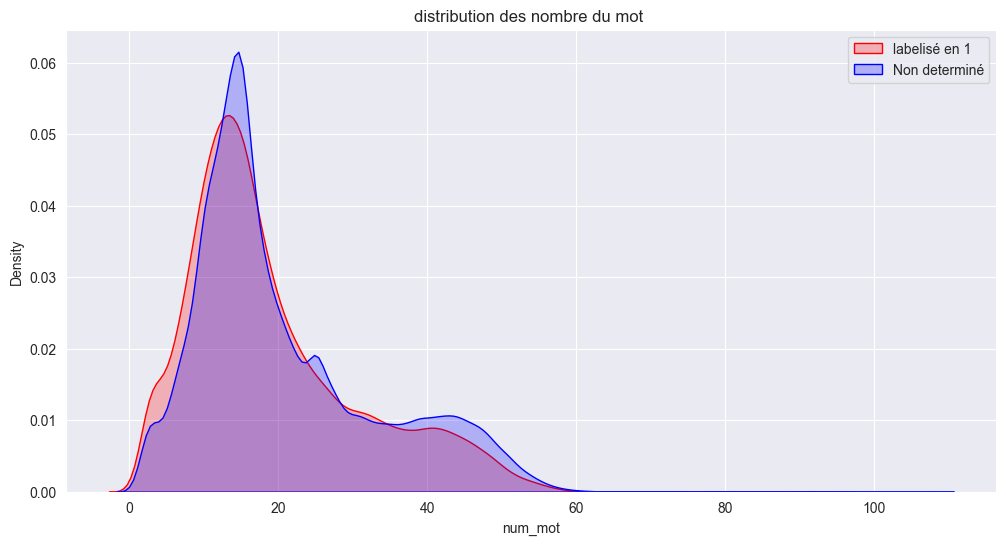

In [76]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_mot'], shade=True, color='r').set_title('distribution des nombre du mot ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_mot'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

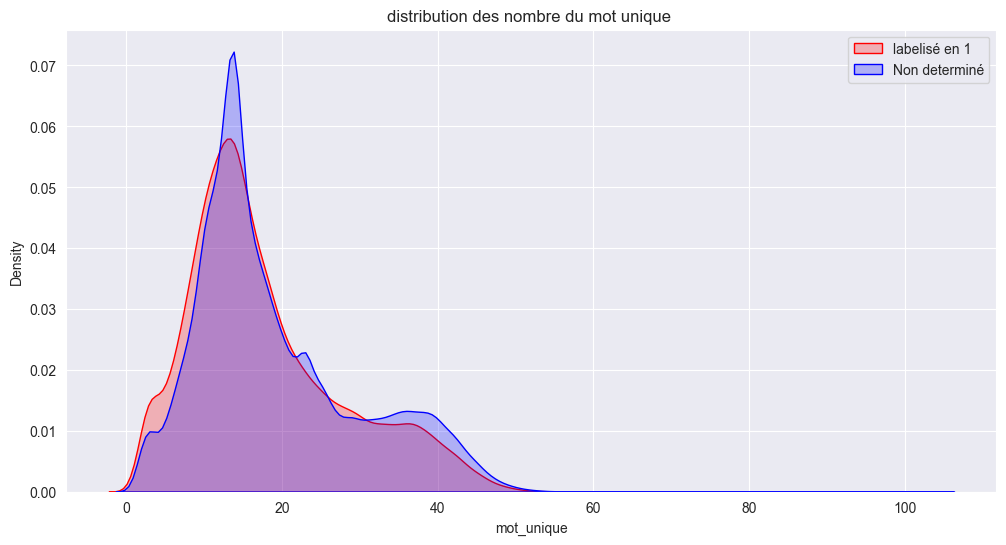

In [77]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['mot_unique'], shade=True, color='r').set_title('distribution des nombre du mot unique ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['mot_unique'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

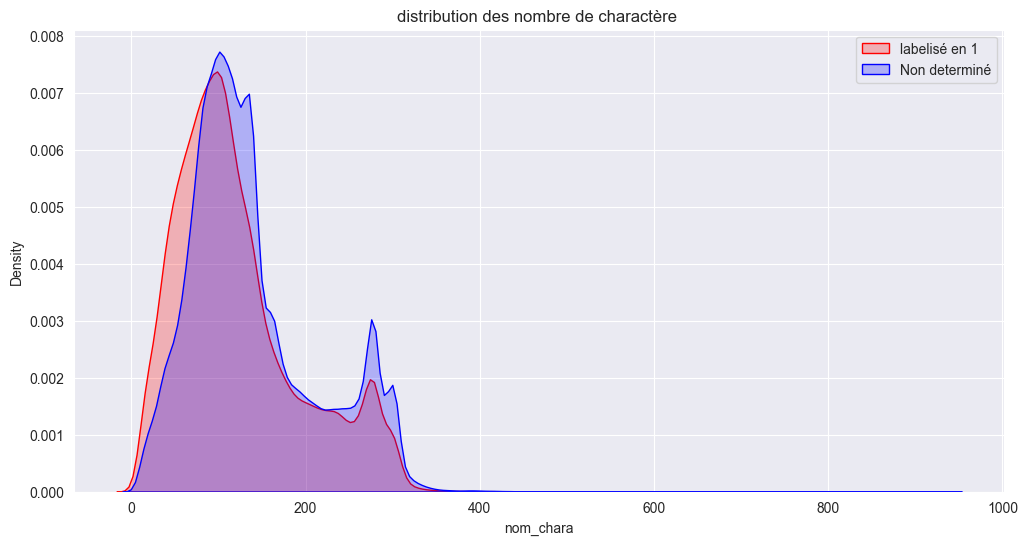

In [78]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nom_chara'], shade=True, color='r').set_title('distribution des nombre de charactère ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nom_chara'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

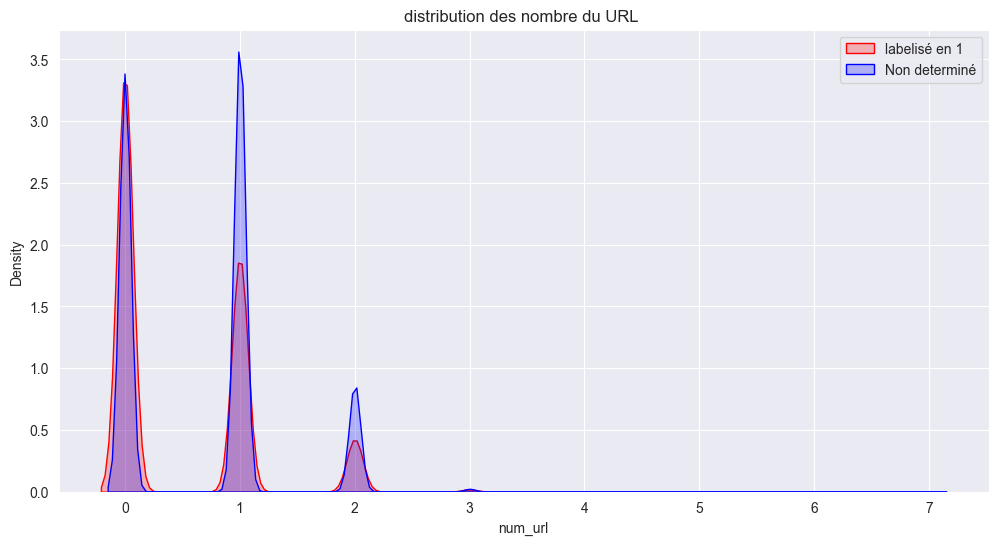

In [79]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_url'], shade=True, color='r').set_title('distribution des nombre du URL ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_url'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

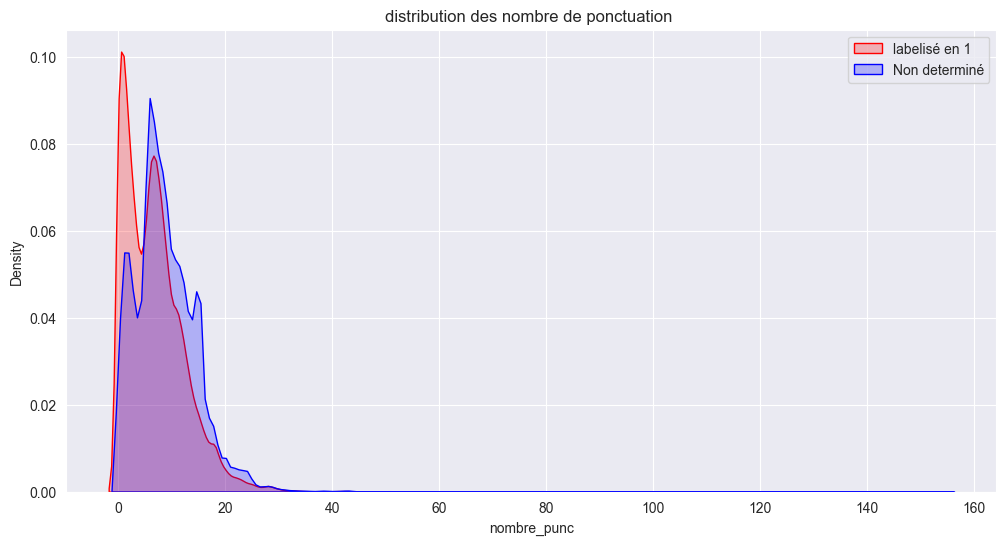

In [80]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nombre_punc'], shade=True, color='r').set_title('distribution des nombre de ponctuation ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nombre_punc'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

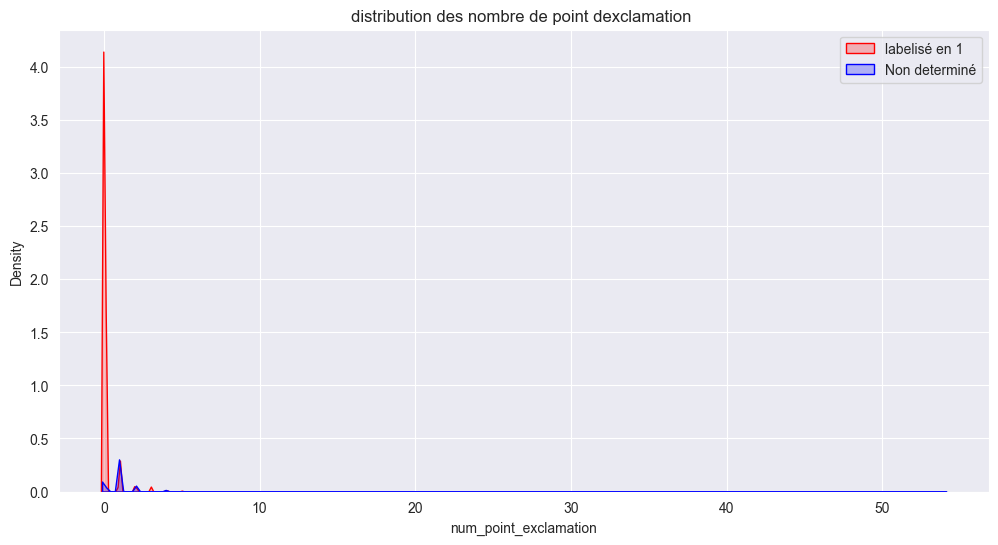

In [81]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_point_exclamation'], shade=True, color='r').set_title('distribution des nombre de point d''exclamation ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_point_exclamation'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

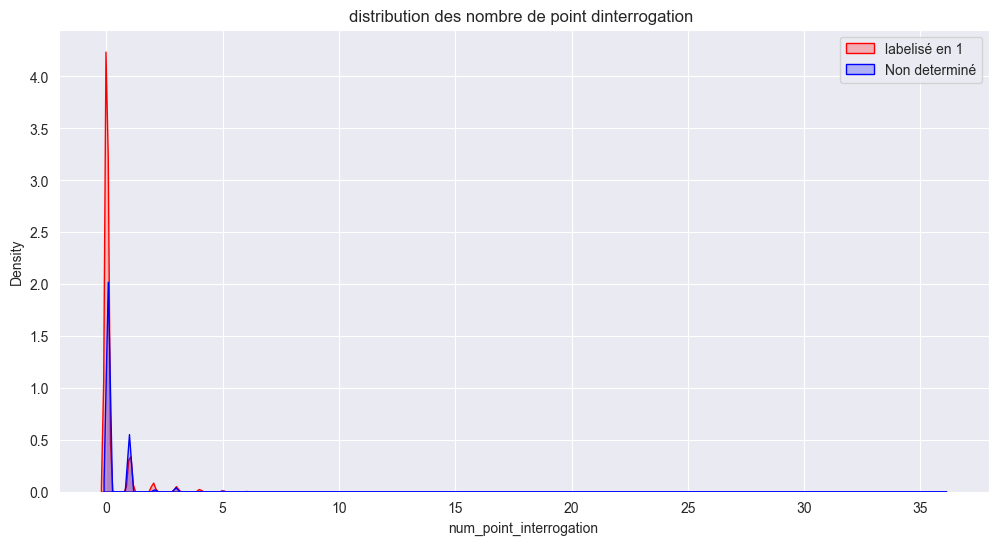

In [82]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['num_point_interrogation'], shade=True, color='r').set_title('distribution des nombre de point d''interrogation ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['num_point_interrogation'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

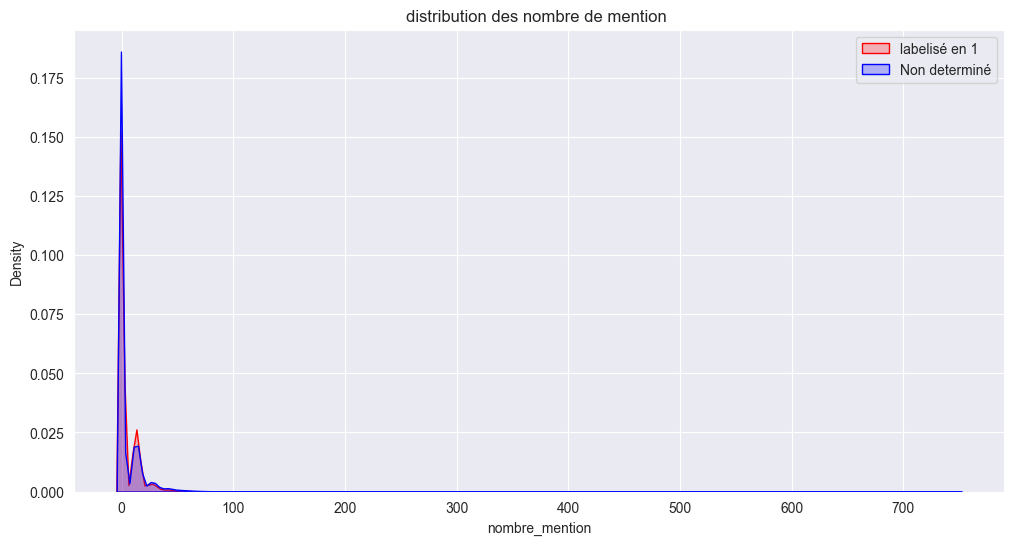

In [83]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['nombre_mention'], shade=True, color='r').set_title('distribution des nombre de mention ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['nombre_mention'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

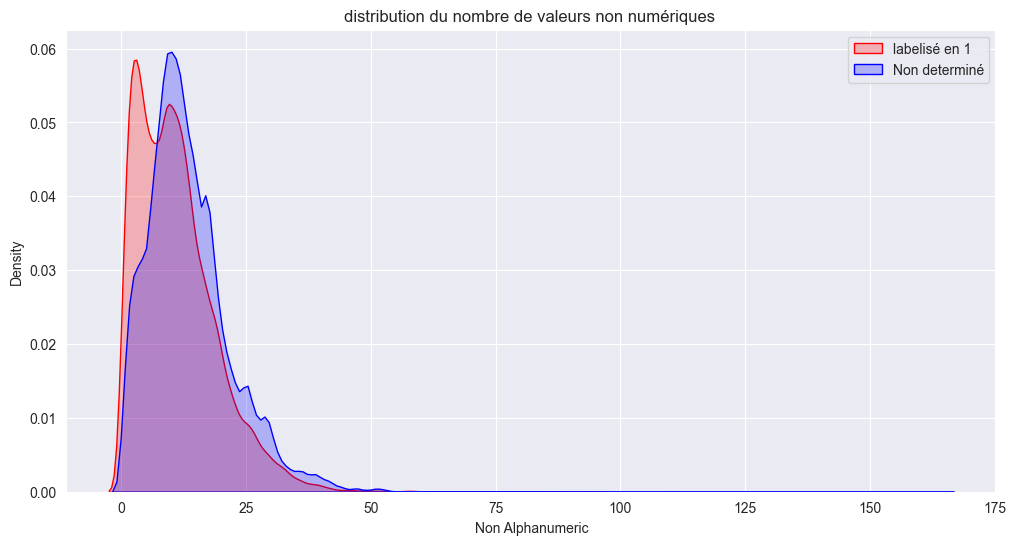

In [84]:
fig=plt.figure(figsize=(12, 6))
sns.kdeplot(data[data['id_evt']>0]['Non Alphanumeric'], shade=True, color='r').set_title('distribution du nombre de valeurs non numériques ')
p5=sns.kdeplot(data[data['id_evt'].isna()]['Non Alphanumeric'], shade=True, color='b')
plt.legend(['labelisé en 1','Non determiné'])
plt.show()

### Stratégie de labelisation  : 

- D'après les distributions des features pour les données labelisées et les non determinés on peut remarquer plusieurs différences de distribution notamment au niveau des pics et des extrémités des distributions.

- Ces courbes sont notre voie pour labeliser en 0 le maximum de tweets à cet effet on a utilisé:

<p><strong>le nombre de mot</strong>: qui sera limité à 3, ce choix est issue de l'analyse de la courbe des données labelisées et en la comaprant avec les non determinées aussi en se basant sur le N-gram et une phrase avec un sens ne peut pas contenir un nombre de mot inférieur à 3 mots.</p>

<p><strong>le nombre de caractère</strong> Sur la base de la politique de twitter, chaque tweets contient au maximum 280 carctère celà inclus les espaces, ponctuation, les mentions, hashtags et URL... voir le lien <a>https://developer.twitter.com/en/docs/counting-characters#:~:text=In%20most%20cases%2C%20the%20text,280%20characters%20or%20Unicode%20glyphs</a>.</p>

<p><strong> Le nombre de ponctuation :</strong> les courbes de distributions sur la ponctuation ne donne pas une vrai idée sur comment la ponctuation dans un tweet joue un role sur la détéction des séismes.<br/> L'idée donc c'est d'éliminer les tweets avec une ponctuation abérantes, voici la réfléxion sur le seuil de ponctuation: tout d'abord on suppose que qu'on a un tweet avec le maximum de caractères possible (280) la moyenne d'un mot en français et environ 5 avec un espace entre les mots cela fera 6, donc on se retrouves avec un tweet lisisble et compréhensible avec 46 mots environ. La norme donc et d'utiliser une pounctuation tout les 5 mots, cela nous donne un ponctuation de 10 environ dans un tweet logique. mais c'est très peu pour fixer un seuil à 10, bien sur il peut avoir plus ou moins de punctuations dans un tweet sans changer le contexte. Nous allons regarder de manières statistiques les quartilles des ponctuations dans les données voir l'image ci dessous, nous allons labéliser les outliers avec un 0, sur la table statistiques, Q3= 12et Q1=4 et donc le seuil des outliers sera = 24  .   </p> 

<center><img style="width: 700px;" src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg"></center>

<p><strong> Analyse de sentiment : </strong>Pour les sentiments qui n'ont pas un id_evt et un seuil de positivité supérieur à 0.85 seront labelisés comme 1</p>

### Le clustering pourra etre utile pour détecter des similarités ou des classes dans nos jeux de données?

In [85]:
data_cluster=data

data_cluster=data_cluster[['num_mot','mot_unique','num_stop_word','num_url','moy_mot','nom_chara','nombre_punc','nombre_mention','num_point_exclamation','num_point_interrogation','Non Alphanumeric']]

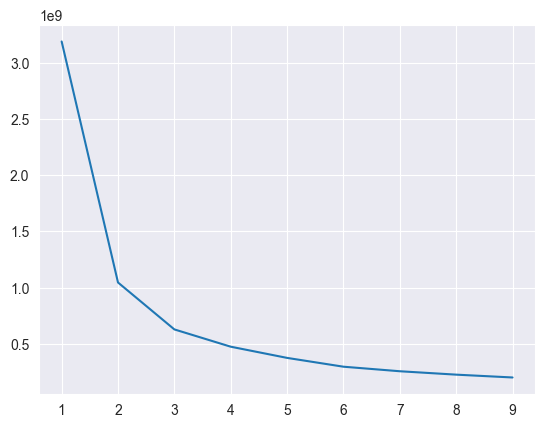

In [88]:
from sklearn.cluster import KMeans

X=data_cluster.values
dist=[]

K=range(1,10)

for k in K:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    dist.append(km.inertia_)
    
plt.plot(K,dist)

plt.show()


### Remarques : 

- En utilisant la méthode elbow qui consiste à determiner le nombre de cluster qui peuvent figurer dans le dataset, on constate la présence de deux coudes équivalent à deux cluster ou trois cluster. On pourra supposer que si on a deux cluster ça sera équivalent à dire seimes ou pas seismes, **Bonne Nouvelle, Buena noticia !!**. Si c'est 3 cluster on pourra ajouter un autre label qui reflète l'indifférence par rapport au seismes

**Regardons maintenant les différents cluster et ses centroides**

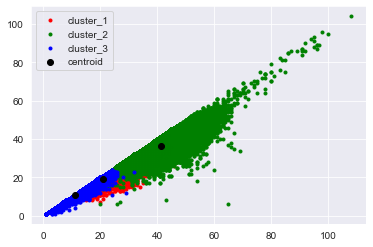

In [ ]:
km=KMeans(n_clusters=3,random_state=42)

y_means=km.fit_predict(X)

#visualisation des clusters
plt.scatter(X[y_means==0,0],X[y_means==0,1],c='red',marker='.',label='cluster_1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],c='green',marker='.',label='cluster_2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],c='blue',marker='.',label='cluster_3')

#visualisation des centroids

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',label='centroid')

plt.legend()
plt.show()





### Remarque sur le clustering :

- Aie !! c'est bien dommage, on n'a pas de résultat satisfaisant du clustering.

**Restons sur notre stratégie de labelisation**

# Labelisation 


### Analyse de sentiment sur toute les données

In [89]:
# remove stop words

tokens=[]

for t in data['tweets_clean']:
    
    word_tokens=[]
    
    for w in re.sub('\W'," ",t).split():
        
        word_tokens.append(w)
    tokens.append(word_tokens)
    
data['word_tokens']=tokens

filtred_words=[]

for c in data['word_tokens']:
    
    filterd=[w for w in c if not w in stop_word]
    
    filtred_words.append(' '.join(filterd))
    
data['text_after_preprocess']=filtred_words

sentiment_list=[]

for i in data['text_after_preprocess']:
    
    vs=TextBlob(i).sentiment[0]
    
    if vs>0.85:
        sentiment_list.append('Positive')
    elif vs<0.6:
        sentiment_list.append('Negatif')
        
    else:
        sentiment_list.append('Neutre')
        
data['sentiment']=sentiment_list



### Labelisation 

In [90]:
data['target']=np.where(data['id_evt']>0,1,'non_determiné')
data['target_final']=np.where(((data['target']=="non_determiné") & ((data['nom_chara'] > 280) | (data['num_mot'] <= 3) | (data['nombre_punc'] >= 23) | (data['sentiment'] =='Positive') )),0,data['target'])

In [91]:
data['target_final'].value_counts()

non_determiné    406819
1                 69995
0                 40487
Name: target_final, dtype: int64

In [92]:
data_final=data[data['target_final']!='non_determiné'][['mot_unique','sentiment','text_after_preprocess','Non Alphanumeric','num_point_interrogation','num_point_exclamation','nombre_mention','nombre_punc','nom_chara','moy_mot','len_hashtags',
       'len_mentions', 'num_mot', 'mot_unique', 'num_stop_word', 'num_url','target_final']]

### Notre data final

In [93]:
data_final=pd.get_dummies(data_final, columns=['sentiment'])
data_final

mot_unique                              text_after_preprocess  \
1               31  Tremblement terre M3 1 FRANCE 31km La Teste Bu...   
7               43  _msd C quoi cette histoire déjà Selon imam tre...   
19              36  _msd comme Vatican bonnes sœurs violé partouze...   
28              41  Je finis 1 livre intéressant Mohamed BALHI Dey...   
48              29  Vanuatu A mild earthquake magnitude mb 4 5 reg...   
...            ...                                                ...   
517246          44  En 1 Chine émet autant CO2 France 26 La Chine ...   
517259          23  Nouvelle infolettre nouveau dossier vulnérabil...   
517262          36  __Montagne _Parisien Comment pouvez prétendre ...   
517263          43  _Parisien Un tremblement Terre change axe mill...   
517268          43  _Parisien Sur logique faut prendre conscience ...   

        Non Alphanumeric  num_point_interrogation  num_point_exclamation  \
1                     33                        0                      0   
7                     22                        2                      0   
19                    26                        0                      0   
28                    16                        0                      0   
48                    53                        1                      1   
...                  ...                      ...                    ...   
517246                20                        1                      0   
517259                40                        0                      0   
517262                15                        0                      0   
517263                19                        0                      0   
517268                21                        0                      0   

        nombre_mention  nombre_punc  nom_chara    moy_mot  len_hashtags  \
1                    0           31        236   5.583333             0   
7                   94           13        301   5.404255             1   
19                  97           13        294   5.813953             0   
28                   0            6        303   5.586957             0   
48                   0           44        304   8.838710             4   
...                ...          ...        ...        ...           ...   
517246              55           18        316   4.981132             0   
517259               0           31        258  10.086957             4   
517262              44           12        283   5.902439             0   
517263              45            8        315   4.851852             0   
517268              45           11        316   4.745455             0   

        len_mentions  num_mot  mot_unique  num_stop_word  num_url  \
1                  0       36          31              1        2   
7                  7       47          43              0        0   
19                 7       43          36              0        0   
28                 0       46          41              1        1   
48                 0       31          29              7        2   
...              ...      ...         ...            ...      ...   
517246             4       53          44              0        0   
517259             0       23          23              0        4   
517262             3       41          36              0        0   
517263             3       54          43              0        0   
517268             3       55          43              1        0   

       target_final  sentiment_Negatif  sentiment_Neutre  sentiment_Positive  
1                 0                  1                 0                   0  
7                 0                  1                 0                   0  
19                0                  1                 0                   0  
28                0                  1                 0                   0  
48                0                  1                 0                   0  
...           

In [94]:
data_final['target_final']=data_final['target_final'].astype('int')

In [95]:
data_final_copy=data_final.copy()
data_final_copy.reset_index(drop=True,inplace=True)
data_final_copy

mot_unique                              text_after_preprocess  \
0               31  Tremblement terre M3 1 FRANCE 31km La Teste Bu...   
1               43  _msd C quoi cette histoire déjà Selon imam tre...   
2               36  _msd comme Vatican bonnes sœurs violé partouze...   
3               41  Je finis 1 livre intéressant Mohamed BALHI Dey...   
4               29  Vanuatu A mild earthquake magnitude mb 4 5 reg...   
...            ...                                                ...   
110477          44  En 1 Chine émet autant CO2 France 26 La Chine ...   
110478          23  Nouvelle infolettre nouveau dossier vulnérabil...   
110479          36  __Montagne _Parisien Comment pouvez prétendre ...   
110480          43  _Parisien Un tremblement Terre change axe mill...   
110481          43  _Parisien Sur logique faut prendre conscience ...   

        Non Alphanumeric  num_point_interrogation  num_point_exclamation  \
0                     33                        0                      0   
1                     22                        2                      0   
2                     26                        0                      0   
3                     16                        0                      0   
4                     53                        1                      1   
...                  ...                      ...                    ...   
110477                20                        1                      0   
110478                40                        0                      0   
110479                15                        0                      0   
110480                19                        0                      0   
110481                21                        0                      0   

        nombre_mention  nombre_punc  nom_chara    moy_mot  len_hashtags  \
0                    0           31        236   5.583333             0   
1                   94           13        301   5.404255             1   
2                   97           13        294   5.813953             0   
3                    0            6        303   5.586957             0   
4                    0           44        304   8.838710             4   
...                ...          ...        ...        ...           ...   
110477              55           18        316   4.981132             0   
110478               0           31        258  10.086957             4   
110479              44           12        283   5.902439             0   
110480              45            8        315   4.851852             0   
110481              45           11        316   4.745455             0   

        len_mentions  num_mot  mot_unique  num_stop_word  num_url  \
0                  0       36          31              1        2   
1                  7       47          43              0        0   
2                  7       43          36              0        0   
3                  0       46          41              1        1   
4                  0       31          29              7        2   
...              ...      ...         ...            ...      ...   
110477             4       53          44              0        0   
110478             0       23          23              0        4   
110479             3       41          36              0        0   
110480             3       54          43              0        0   
110481             3       55          43              1        0   

        target_final  sentiment_Negatif  sentiment_Neutre  sentiment_Positive  
0                  0                  1                 0                   0  
1                  0                  1                 0                   0  
2                  0                  1                 0                   0  
3                  0                  1                 0                   0  
4                  0                  1                 0                   0  
...     

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), dpi=100)
sns.countplot(data_final['target_final'], ax=axes[0])
axes[1].pie(data_final['target_final'].value_counts(),
           labels=['absence de seisme', 'seisme'],
           autopct='%1.2f%%',
           shadow=True,
           explode=(0.05, 0),
            startangle=60)
fig.suptitle('Distribution des tweets selon les valeurs cibles', fontsize=24)
plt.show()

### Remarque :

- Ouf ! les données sont balancées

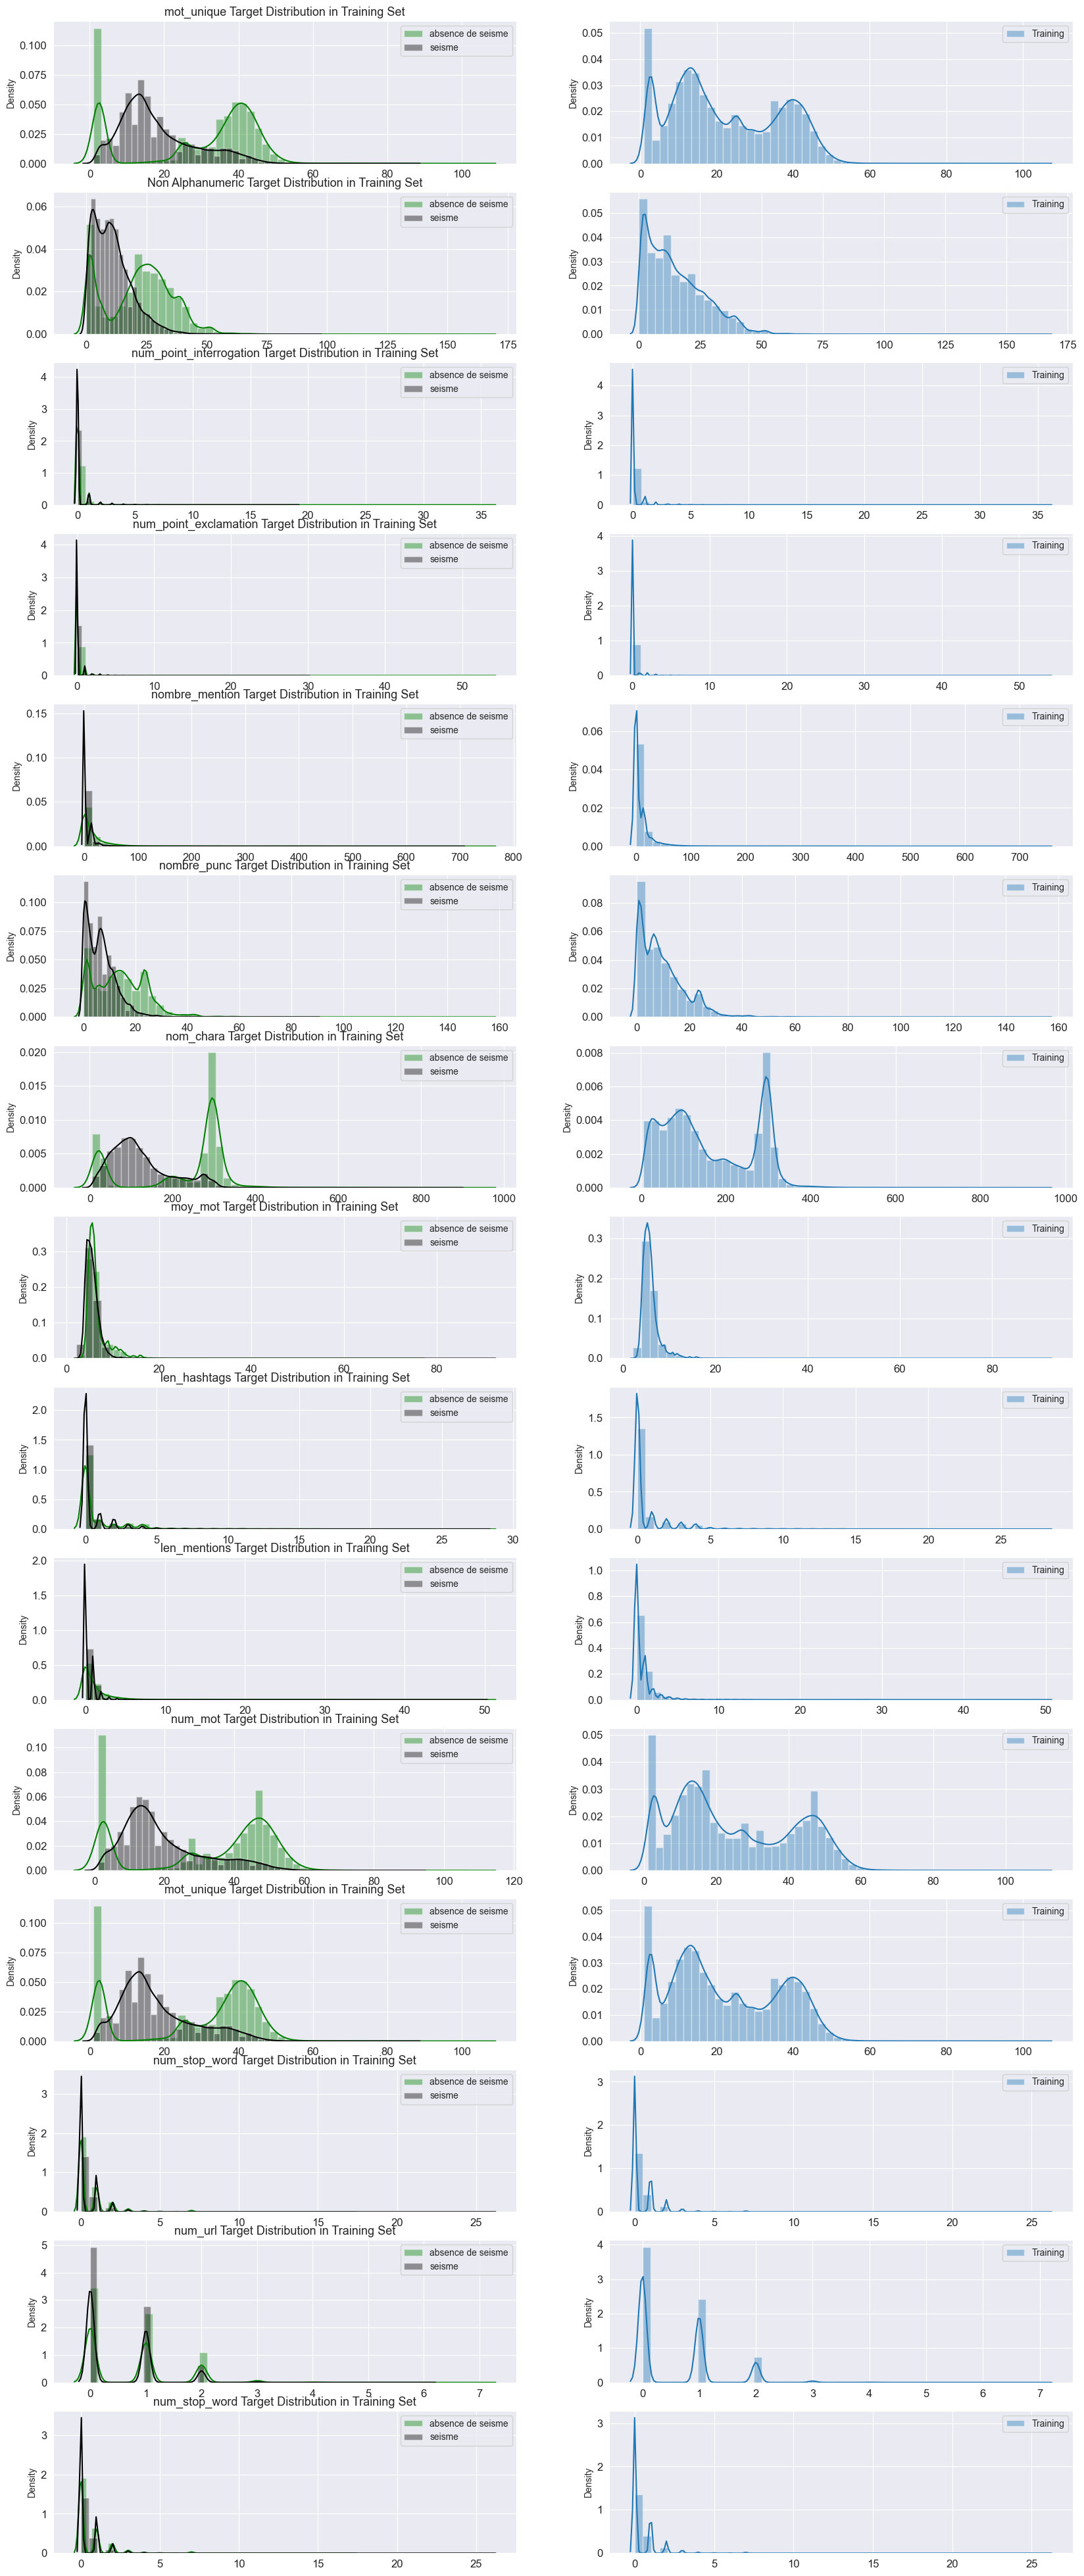

In [ ]:
#visualisation et comparaison des features dans le cas de seismes et absence de seismes
METAFEATURES = ['mot_unique', 'Non Alphanumeric',
       'num_point_interrogation', 'num_point_exclamation', 'nombre_mention',
       'nombre_punc', 'nom_chara', 'moy_mot', 'len_hashtags', 'len_mentions',
       'num_mot', 'mot_unique', 'num_stop_word', 'num_url', 'num_stop_word' ]
tweets_seisme = data_final['target_final'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(data_final.loc[~tweets_seisme][feature], label='absence de seisme', ax=axes[i][0], color='green')
    sns.distplot(data_final.loc[tweets_seisme][feature], label='seisme', ax=axes[i][0], color='black')

    sns.distplot(data_final[feature], label='Training', ax=axes[i][1])
    #sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    #axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()

### Remarques : 

- Une différence entre les distributions dans le cas de seismes et absence de seismes et remarquable notamment : le nombre de mot unique, le nombre de caractère...

<a id='4'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Creéation et benchemark des modèles de machine learning</h1>

<h1>Introduction</h1>

- Le problème est transformé à un problème supervisé de classification, pour le résoudre on a fait deux approches : 

1. la première consiste à utiliser seulement les données textes après leurs vectorisation 
2. la deuxième est utiliser les données textes et les features ajoutés lors de la phase de l'analyse.

<h2> Choix de la metrique de performance </h2>

- Il est généralement recommandé d'optimiser le rappel pour la détection des séismes, car il est crucial de ne pas manquer de détecter un séisme réel. Si un modèle a **un faible rappel**, cela signifie qu'il y a un risque élevé de manquer de détecter un séisme réel, ce qui peut avoir des conséquences graves pour la sécurité des personnes et des biens.

- Il est important de noter que l'optimisation du rappel doit être effectuée de manière équilibrée avec l'optimisation de la précision, qui mesure la fraction de prédictions de séismes faites par le modèle qui sont correctes. Si le modèle a une **précision trop faible**, cela peut entraîner un nombre élevé de faux positifs, ce qui peut causer de la confusion et des coûts inutiles. En conséquence, il est généralement recommandé de trouver un bon équilibre entre le rappel et la précision lors de l'optimisation d'un modèle de détection de séismes

In [ ]:
X=data_final['text_after_preprocess']
Y=data_final['target_final']

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)




NameError: name 'data_final' is not defined

In [ ]:
print(X.shape)
print(Y.shape)

print(X_train.shape)
print(X_test.shape)

(110482,)
(110482,)
(88385,)
(22097,)


In [ ]:
# on vectorise nos texts

from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer()
X_train_feat=vec.fit_transform(X_train)
X_test_feat=vec.transform(X_test)



In [ ]:
X_train_feat.shape

(88385, 73292)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report



models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))


Fone_test=[]
Precision_test=[]
Recall_test=[]
Fone_train=[]
Precision_train=[]
Recall_train=[]
names = []
for name,model in models:
    model.fit(X_train_feat,Y_train)
    
    fone_test=f1_score(Y_test, model.predict(X_test_feat), average='macro')
    precision_test=precision_score(Y_test, model.predict(X_test_feat), average='macro')
    recall_test=recall_score(Y_test, model.predict(X_test_feat), average='macro')
    names.append(name)
    Fone_test.append(fone_test)
    Precision_test.append(precision_test)
    Recall_test.append(recall_test)

    fone_train=f1_score(Y_train, model.predict(X_train_feat), average='macro')
    precision_train=precision_score(Y_train, model.predict(X_train_feat), average='macro')
    recall_train=recall_score(Y_train, model.predict(X_train_feat), average='macro')
    Fone_train.append(fone_train)
    Precision_train.append(precision_train)
    Recall_train.append(recall_train)
        

In [ ]:

plt.plot(names,Fone_test,label='f 1 score Test',color='red')
plt.plot(names,Fone_train,label='f 1 score Train',  color='red',linestyle='dashed'  )
plt.plot(names,Precision_test, label='precision Test',color='green')
plt.plot(names,Precision_train, label='precision Train' ,color='green',linestyle='dashed')
plt.plot(names,Recall_test ,label='recall Test',    color='blue')   
plt.plot(names,Recall_train, label='recall Train',  color='blue',linestyle='dashed')
plt.xlabel('model')
plt.ylabel('score')
plt.legend()
plt.show()

# Remarques sur la perforamance des modèles sans features: 

- on fixe le seuil à 0.05 qui est la différence la performance de l'algorithme avec les données d'entrainement et les données test. Certaines algorithmes overfit (Random Forest...)
- On va se focaliser sur le recall 
- les algos à optimiser : RF, Logistic Regression, KNN

# Comparaison entre model avec features et sans features

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(min_df=0.005,norm='l2') # le min_df est le pourcentage d'apparition d'un mot dans tout les tweets
train_tf_idf_features=vec.fit_transform(data_final['text_after_preprocess']).toarray()
train_tf_idf=pd.DataFrame(train_tf_idf_features,columns=vec.get_feature_names())
train_tf_idf

00  000   01        02   03   08        10   11        12   13  \
0       0.210646  0.0  0.0  0.218811  0.0  0.0  0.176152  0.0  0.201847  0.0   
1       0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
2       0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
3       0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
4       0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
...          ...  ...  ...       ...  ...  ...       ...  ...       ...  ...   
110477  0.000000  0.0  0.0  0.000000  0.0  0.0  0.267724  0.0  0.000000  0.0   
110478  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
110479  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
110480  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   
110481  0.000000  0.0  0.0  0.000000  0.0  0.0  0.000000  0.0  0.000000  0.0   

        ...  wsh  zone        ça  échelle  épicentre  épisode  éruption  état  \
0       ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
1       ...  0.0   0.0  0.242592      0.0        0.0      0.0       0.0   0.0   
2       ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
3       ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
4       ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
...     ...  ...   ...       ...      ...        ...      ...       ...   ...   
110477  ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
110478  ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
110479  ...  0.0   0.0  0.286641      0.0        0.0      0.0       0.0   0.0   
110480  ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   
110481  ...  0.0   0.0  0.000000      0.0        0.0      0.0       0.0   0.0   

        être  île  
0        0.0  0.0  
1        0.0  0.0  
2        0.0  0.0  
3        0.0  0.0  
4        0.0  0.0  
...      ...  ...  
110477   0.0  0.0  
110478   0.0  0.0  
110479   0.0  0.0  
110480   0.0  0.0  
110481   0.0  0.0  

[110482 rows x 354 columns]

### Remarques : 

- Nous trouvons 354 mots fréquents à 0.5% avec ce choix on a réduit les dimensions et ainsi prendre les mots populaires

In [97]:
#Concatenation avec les autres features 
train_tf_idf_Final=pd.merge(data_final_copy.drop(['text_after_preprocess','target_final'],axis=1),train_tf_idf,left_index=True,right_index=True)


In [ ]:
data_final['target_final']

1         0
7         0
19        0
28        0
48        0
         ..
517246    0
517259    0
517262    0
517263    0
517268    0
Name: target_final, Length: 110482, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split

X_train_F,X_test_F,Y_train_F,Y_test_F=train_test_split(train_tf_idf_Final,data_final_copy['target_final'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report



models_F = []

models_F.append(("LogisticRegression",LogisticRegression()))


models_F.append(("KNeighbors",KNeighborsClassifier()))

models_F.append(("RandomForest",RandomForestClassifier()))


CrossVal_F = []
Fone_test_F=[]
Precision_test_F=[]
Recall_test_F=[]
Fone_train_F=[]
Precision_train_F=[]
Recall_train_F=[]
names_F = []
for name,model in models_F:
    model.fit(X_train_F,Y_train_F)
    
    fone_test=f1_score(Y_test_F, model.predict(X_test_F), average='macro')
    precision_test=precision_score(Y_test_F, model.predict(X_test_F), average='macro')
    recall_test=recall_score(Y_test_F, model.predict(X_test_F), average='macro')
    names_F.append(name)
    Fone_test_F.append(fone_test)
    Precision_test_F.append(precision_test)
    Recall_test_F.append(recall_test)

    fone_train=f1_score(Y_train_F, model.predict(X_train_F), average='macro')
    precision_train=precision_score(Y_train_F, model.predict(X_train_F), average='macro')
    recall_train=recall_score(Y_train_F, model.predict(X_train_F), average='macro')
    Fone_train_F.append(fone_train)
    Precision_train_F.append(precision_train)
    Recall_train_F.append(recall_train)
        

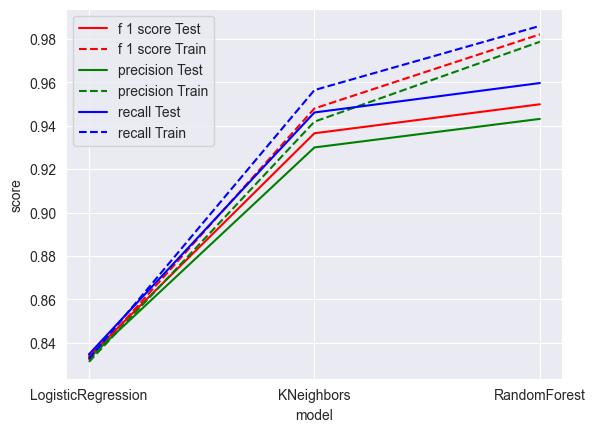

In [ ]:

plt.plot(names_F,Fone_test_F,label='f 1 score Test',color='red')
plt.plot(names_F,Fone_train_F,label='f 1 score Train',  color='red',linestyle='dashed'  )
plt.plot(names_F,Precision_test_F, label='precision Test',color='green')
plt.plot(names_F,Precision_train_F, label='precision Train' ,color='green',linestyle='dashed')
plt.plot(names_F,Recall_test_F ,label='recall Test',    color='blue')   
plt.plot(names_F,Recall_train_F, label='recall Train',  color='blue',linestyle='dashed')
plt.xlabel('model')
plt.ylabel('score')
plt.legend()
plt.show()

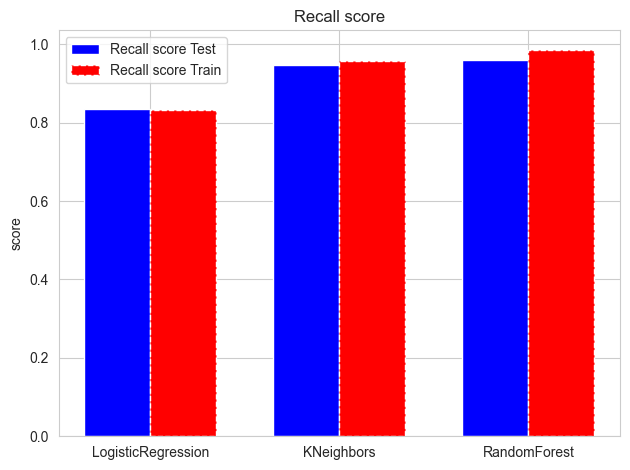

In [ ]:
x = np.arange(len(names_F)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Recall_test_F, width, label='Recall score Test',color='blue')
rects2 = ax.bar(x + width/2, Recall_train_F, width, label='Recall score Train',color='red',linestyle='dashed')

ax.set_ylabel('score')
ax.set_title('Recall score')
ax.set_xticks(x)
ax.set_xticklabels(names_F)
ax.legend()

fig.tight_layout()


plt.show()



### Remarques : 

- Amazing ! nos modèles sont justes intelligents, on peut constater moins d'overfitting sur les trois modèles avec une augmentation de **recall et sans perdre la précision** 

# Optimisation des hyperpramètres.

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Définir les hyperparamètres à tester pour chaque modèle
param_grid_rf = {'n_estimators': [200,300,600], 'max_depth': [None, 5, 10,20,30]}
param_grid_lr = {'C': [0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']}
param_grid_knn = {'n_neighbors': [3, 5, 7,10]}

# Créer un dictionnaire qui associe chaque modèle à sa grille d'hyperparamètres
param_grid = {'random_forest': param_grid_rf, 'logistic_regression': param_grid_lr, 'k_nearest_neighbors': param_grid_knn}

# Créer un dictionnaire qui associe chaque modèle à un objet d'estimateur
estimators = {'random_forest': RandomForestClassifier(), 'logistic_regression': LogisticRegression(), 'k_nearest_neighbors': KNeighborsClassifier()}

# Définir les métriques de performance à utiliser pour évaluer chaque modèle
metrics = ['accuracy', 'precision', 'recall', 'f1']

# Créer un dictionnaire qui associe chaque modèle à un objet de grille de recherche
grid_searches = {}

# Pour chaque modèle, effectuer une recherche en grille pour trouver les meilleurs hyperparamètres
for name, estimator in estimators.items():
    grid_search = GridSearchCV(estimator, param_grid[name], scoring=metrics, refit='recall', cv=10)
    grid_search.fit(X_train_F, Y_train_F)
    grid_searches[name] = grid_search

# Pour chaque modèle, afficher les résultats de la recherche en grille
for name, grid_search in grid_searches.items():
    print(f'Meilleurs hyperparamètres pour {name}: {grid_search.best_params_}')
    print(f'Meilleures performances pour {name}: {grid_search.best_score_}')


Meilleurs hyperparamètres pour random_forest: {'max_depth': 5, 'n_estimators': 600}
Meilleures performances pour random_forest: 0.9467119370979271
Meilleurs hyperparamètres pour logistic_regression: {'C': 0.01, 'penalty': 'l2'}
Meilleures performances pour logistic_regression: 0.8727305218012866
Meilleurs hyperparamètres pour k_nearest_neighbors: {'n_neighbors': 3}
Meilleures performances pour k_nearest_neighbors: 0.9311293781272336


### Remarques : 



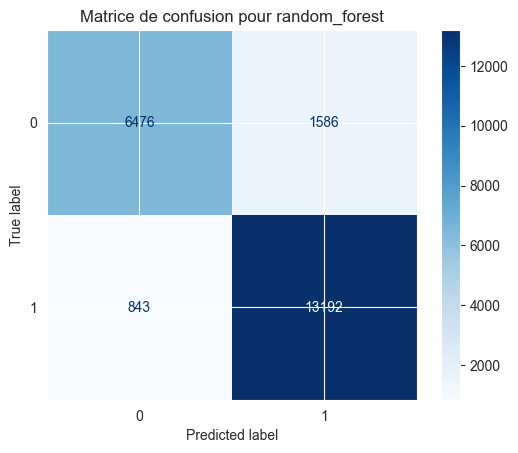

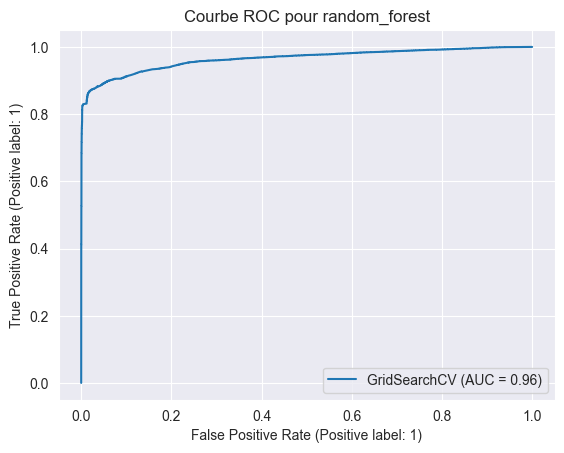

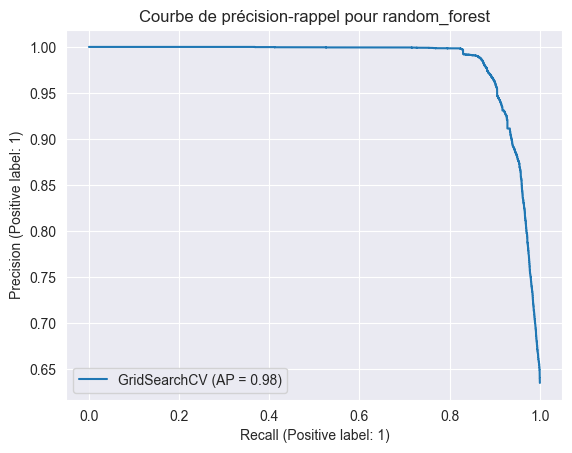

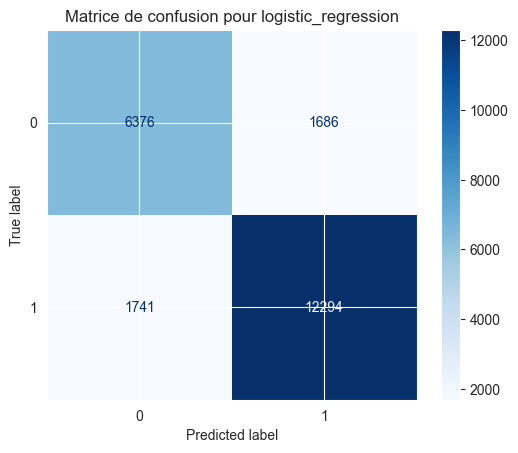

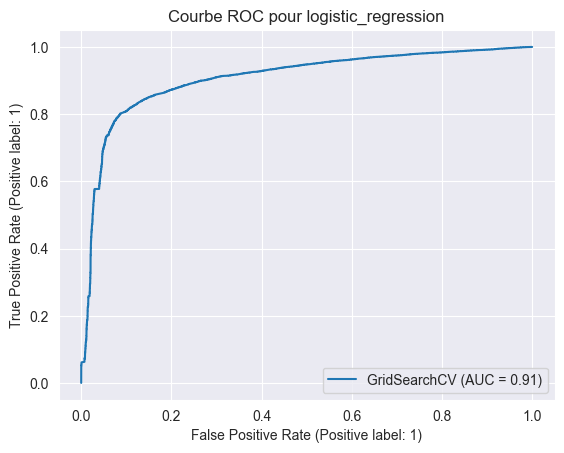

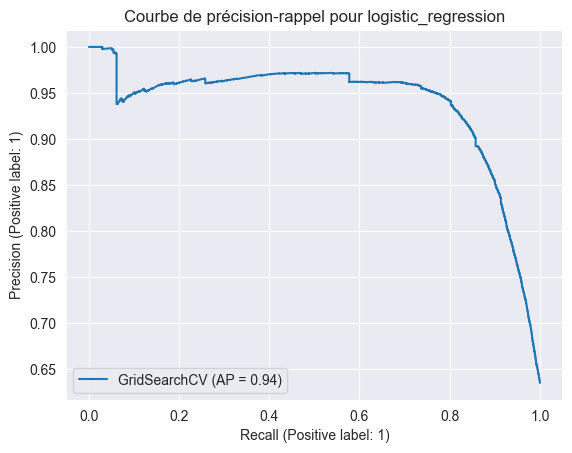

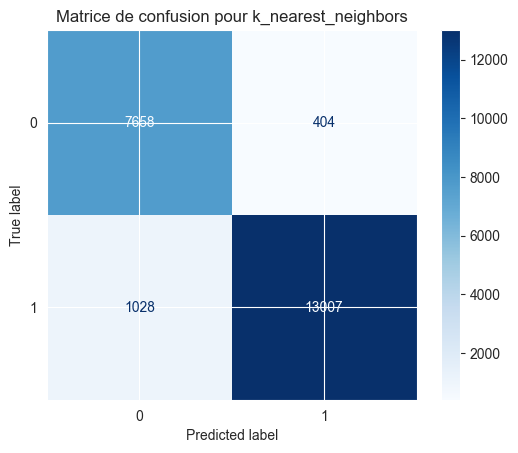

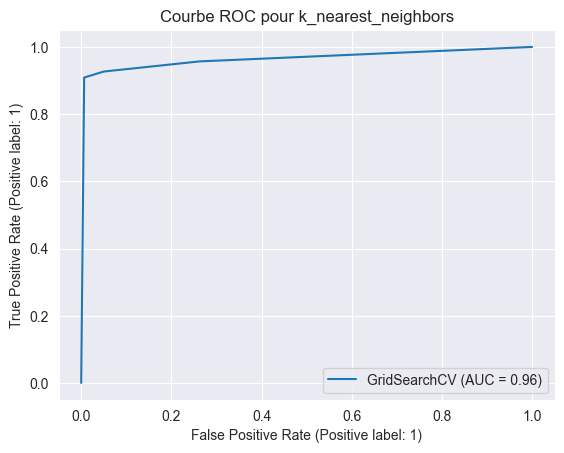

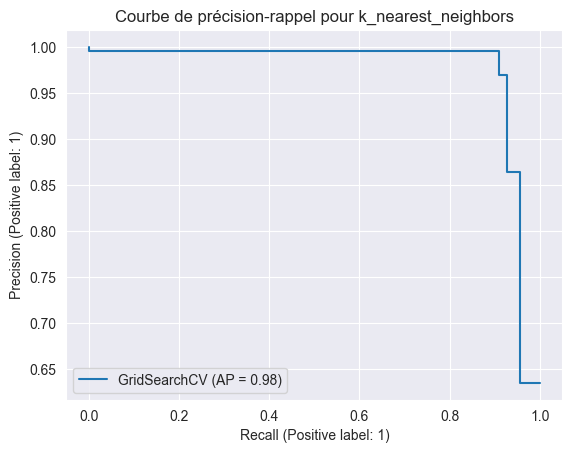

In [100]:
for name, grid_search in grid_searches.items():
  # Prédire les classes pour les données de te
    y_pred = grid_search.predict(X_test_F)

      # Tracer la matrice de confusion
    plot_confusion_matrix(grid_search, X_test_F, Y_test_F, cmap='Blues')
    plt.title(f'Matrice de confusion pour {name}')
    plt.show()

      # Tracer la courbe ROC
    plot_roc_curve(grid_search, X_test_F, Y_test_F)
    plt.title(f'Courbe ROC pour {name}')
    plt.show()

      # Tracer la courbe de précision-rappel
    plot_precision_recall_curve(grid_search, X_test_F, Y_test_F)
    plt.title(f'Courbe de précision-rappel pour {name}')
    plt.show()

### Remarques :


Après avoir remarqué que certains algorithmes comme Random forest, on a décidé d'optimiser ses hyperparamètres pour améliorer les performances à l'aide de Grid searsh et cross validation, et eviter l'overfitting. KNN et Logistic Regression ont donné de bonnes performances sans optimisation. Mais on aquand même utilisé Gris Searsh pour optimiser les perforrmances.


- Meilleurs hyperparamètres pour random_forest: {'max_depth': 5, 'n_estimators': 600}
- Meilleures performances pour random_forest: 0.9467119370979271
- Meilleurs hyperparamètres pour logistic_regression: {'C': 0.01, 'penalty': 'l2'}
- Meilleures performances pour logistic_regression: 0.8727305218012866-
- Meilleurs hyperparamètres pour k_nearest_neighbors: {'n_neighbors': 3}
- Meilleures performances pour k_nearest_neighbors: 0.9311293781272336



<a id='5'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Autres Approches</h1>

### Études de fréquence des Tweets :

In [ ]:
data[['tweet_created_at']]

tweet_created_at
0      2019-07-26 12:59:53
1      2019-07-26 13:03:46
2      2019-07-26 13:06:10
3      2019-07-26 13:13:42
4      2019-07-26 13:57:45
...                    ...
517296 2019-07-26 12:49:09
517297 2019-07-26 12:55:10
517298 2019-07-26 12:56:43
517299 2019-07-26 12:58:07
517300 2019-07-26 12:59:05

[517301 rows x 1 columns]

### Definition d'une fenetre 

In [ ]:
id_evt_pos=data[data['id_evt']>0]
maxi_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].max().reset_index()
min_tweet_date=id_evt_pos.groupby('id_evt')['tweet_created_at'].min().reset_index()
date_mini_maxi_df=min_tweet_date.merge(maxi_tweet_date,how='inner',on='id_evt')
date_mini_maxi_df.rename(columns={'tweet_created_at_x':'debut_tweet','tweet_created_at_y':'fin_tweet'},inplace=True)
date_mini_maxi_df['diff_debut_fin']=date_mini_maxi_df['fin_tweet']-date_mini_maxi_df['debut_tweet']
date_mini_maxi_df['day']=date_mini_maxi_df['diff_debut_fin'].dt.components.days
date_mini_maxi_df['hour']=date_mini_maxi_df['diff_debut_fin'].dt.components.hours
date_mini_maxi_df['minutes']=date_mini_maxi_df['diff_debut_fin'].dt.components.minutes
date_mini_maxi_df['seconds']=date_mini_maxi_df['diff_debut_fin'].dt.components.seconds

date_mini_maxi_df


id_evt         debut_tweet           fin_tweet  diff_debut_fin  day  \
0     153.0 2017-04-17 07:24:13 2017-04-17 07:44:44 0 days 00:20:31    0   
1     154.0 2017-05-25 16:37:10 2017-05-25 17:20:11 0 days 00:43:01    0   
2     155.0 2017-09-15 12:59:17 2017-09-15 13:32:10 0 days 00:32:53    0   
3     156.0 2017-09-28 03:44:08 2017-09-28 04:19:31 0 days 00:35:23    0   
4     157.0 2018-01-02 22:00:32 2018-01-02 22:57:27 0 days 00:56:55    0   
..      ...                 ...                 ...             ...  ...   
158   382.0 2022-07-14 18:30:03 2022-07-14 18:31:25 0 days 00:01:22    0   
159   383.0 2022-07-17 02:13:14 2022-07-17 02:24:08 0 days 00:10:54    0   
160   384.0 2022-07-22 10:10:22 2022-07-22 10:44:13 0 days 00:33:51    0   
161   385.0 2022-07-27 02:59:19 2022-07-27 03:38:13 0 days 00:38:54    0   
162   386.0 2022-08-06 16:48:03 2022-08-06 16:48:58 0 days 00:00:55    0   

     hour  minutes  seconds  
0       0       20       31  
1       0       43        1  
2       0       32       53  
3       0       35       23  
4       0       56       55  
..    ...      ...      ...  
158     0        1       22  
159     0       10       54  
160     0       33       51  
161     0       38       54  
162     0        0       55  

[163 rows x 8 columns]

In [ ]:
date_mini_maxi_df['minutes'].value_counts()

0     16
4     10
5      7
1      7
6      6
7      5
8      5
11     5
55     4
52     4
18     4
2      4
26     4
13     4
27     4
20     3
39     3
3      3
12     3
15     3
10     3
9      3
56     3
23     3
28     2
29     2
24     2
25     2
21     2
34     2
30     2
17     2
59     2
31     2
35     2
58     2
42     2
49     2
50     2
57     1
54     1
33     1
32     1
16     1
48     1
19     1
37     1
44     1
14     1
46     1
40     1
43     1
41     1
36     1
22     1
38     1
Name: minutes, dtype: int64

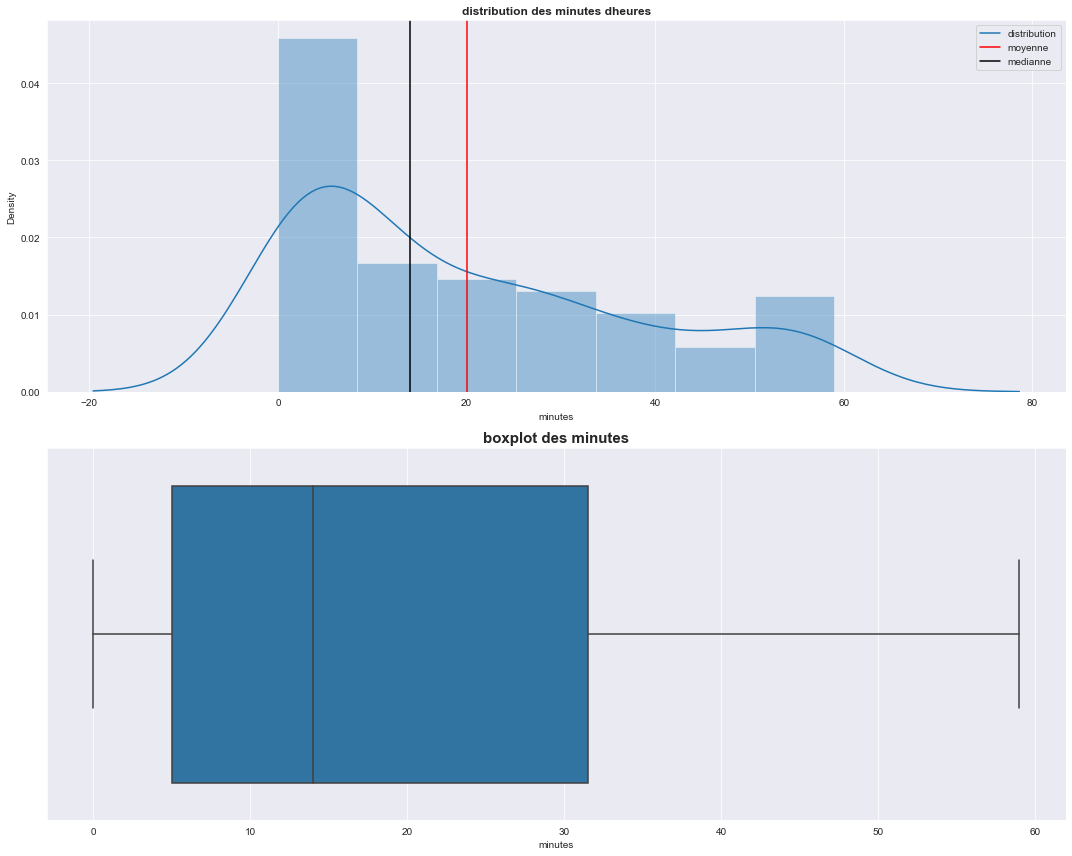

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(15,12))
sns.distplot(date_mini_maxi_df['minutes'],kde=True,ax=ax1).set_title('distribution des minutes d''heures',fontweight='bold')
sns.boxplot(data=date_mini_maxi_df,x='minutes',ax=ax2).set_title('boxplot des minutes',fontweight='bold',fontsize=15)
ax1.axvline(date_mini_maxi_df['minutes'].mean(),color='red')
ax1.axvline(date_mini_maxi_df['minutes'].median(),color='black')
ax1.legend(['distribution','moyenne','medianne'])
# plt.title('distribution des minutes d''heures',fontweight='bold')

fig.tight_layout()

plt.show()

###  Remarques : 
- on Remarque que  la moyenne des minutes : 20 minutes
- cela est peu nous metterons une fenetre de 3 heures. cette refléxion est  basée sur le fait que les gens vont plûtot parler de séismes dans les heures qui suivent un séisme.

In [4]:
seisme_df=pd.read_csv('../Data/Liste_seismes_2017-2022.csv',sep=';')
seisme_df.head(5)

Date Heure            Localisation  Latitude  Longitude  \
0  2017-02-20 17:03:41.57              ENE Orthez   43.4917    -0.6465   
1  2017-04-26 15:12:10.88  SW Bagnères-de-Bigorre   42.9811     0.1370   
2  2017-05-08 02:08:27.15       NE Argelès-Gazost   43.0347     0.0206   
3  2017-09-28 01:43:22.76                 O Janzé   47.9614    -1.4372   
4  2017-10-25 03:41:17.67          SW Albertville   45.4286     6.3180   

   Profondeur Type Magnitude  Magnitude  IdSei (franceseisme)  \
0         5.0            MLv        3.5                   659   
1         7.7            MLv        3.7                   669   
2         7.5            MLv        3.4                   673   
3         4.5            MLv        3.9                   690   
4         3.1            MLv        3.7                   696   

   Intensite EMS98 maximale  
0                       5.0  
1                       4.0  
2                       4.0  
3                       4.0  
4                       4.5

In [5]:
seisme_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date Heure                46 non-null     object 
 1   Localisation              46 non-null     object 
 2   Latitude                  46 non-null     float64
 3   Longitude                 46 non-null     float64
 4   Profondeur                46 non-null     float64
 5   Type Magnitude            46 non-null     object 
 6   Magnitude                 46 non-null     float64
 7   IdSei (franceseisme)      46 non-null     int64  
 8   Intensite EMS98 maximale  46 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.4+ KB


#### Remarque
- La colonne Date Heure est enregistré sous forme objet

In [6]:
seisme_df['Date Heure']=pd.to_datetime(seisme_df['Date Heure'])

In [7]:
print('type de magnitudes dans notre dataset {}'.format(seisme_df['Type Magnitude'].unique()))

type de magnitudes dans notre dataset ['MLv' 'ML']


In [8]:
print('les id des seismes {}'.format(seisme_df['IdSei (franceseisme)'].unique()))

les id des seismes [ 659  669  673  690  696  697  698  699  701  700  719  721  726  735
  774  796  802  819  858  889  921  930  931  952  982  988 1000 1048
 1049 1051 1052 1053 1072 1077 1080 1087 1086 1101 1110 1111 1113 1123
 1125 1126 1127 1146]


### définition des types de magnitude

- **type ML :Magnitude locale (Ml)** : utilisée pour des séismes proches, dits séismes locaux. Elle est définie à partir de l’amplitude maximale des ondes S modulée par la distance épicentrale. Elle est toujours moyennée sur plusieurs stations en tenant compte des corrections locales. Elle est principalement utilisée pour déterminer la magnitude des évènements locaux ou régionaux (distance séisme-station inférieure à ~1000km).

- **Magnitude MLv** : Magnitude locale calculée sur la composante verticale du sismogramme. Cette magnitude se détermine d’une façon équivalente à la magnitude Locale, c’est-à-dire à partir de l’amplitude maximale des ondes modulée par la distance épicentrale. C’est celle qui est utilisée sur ce site.

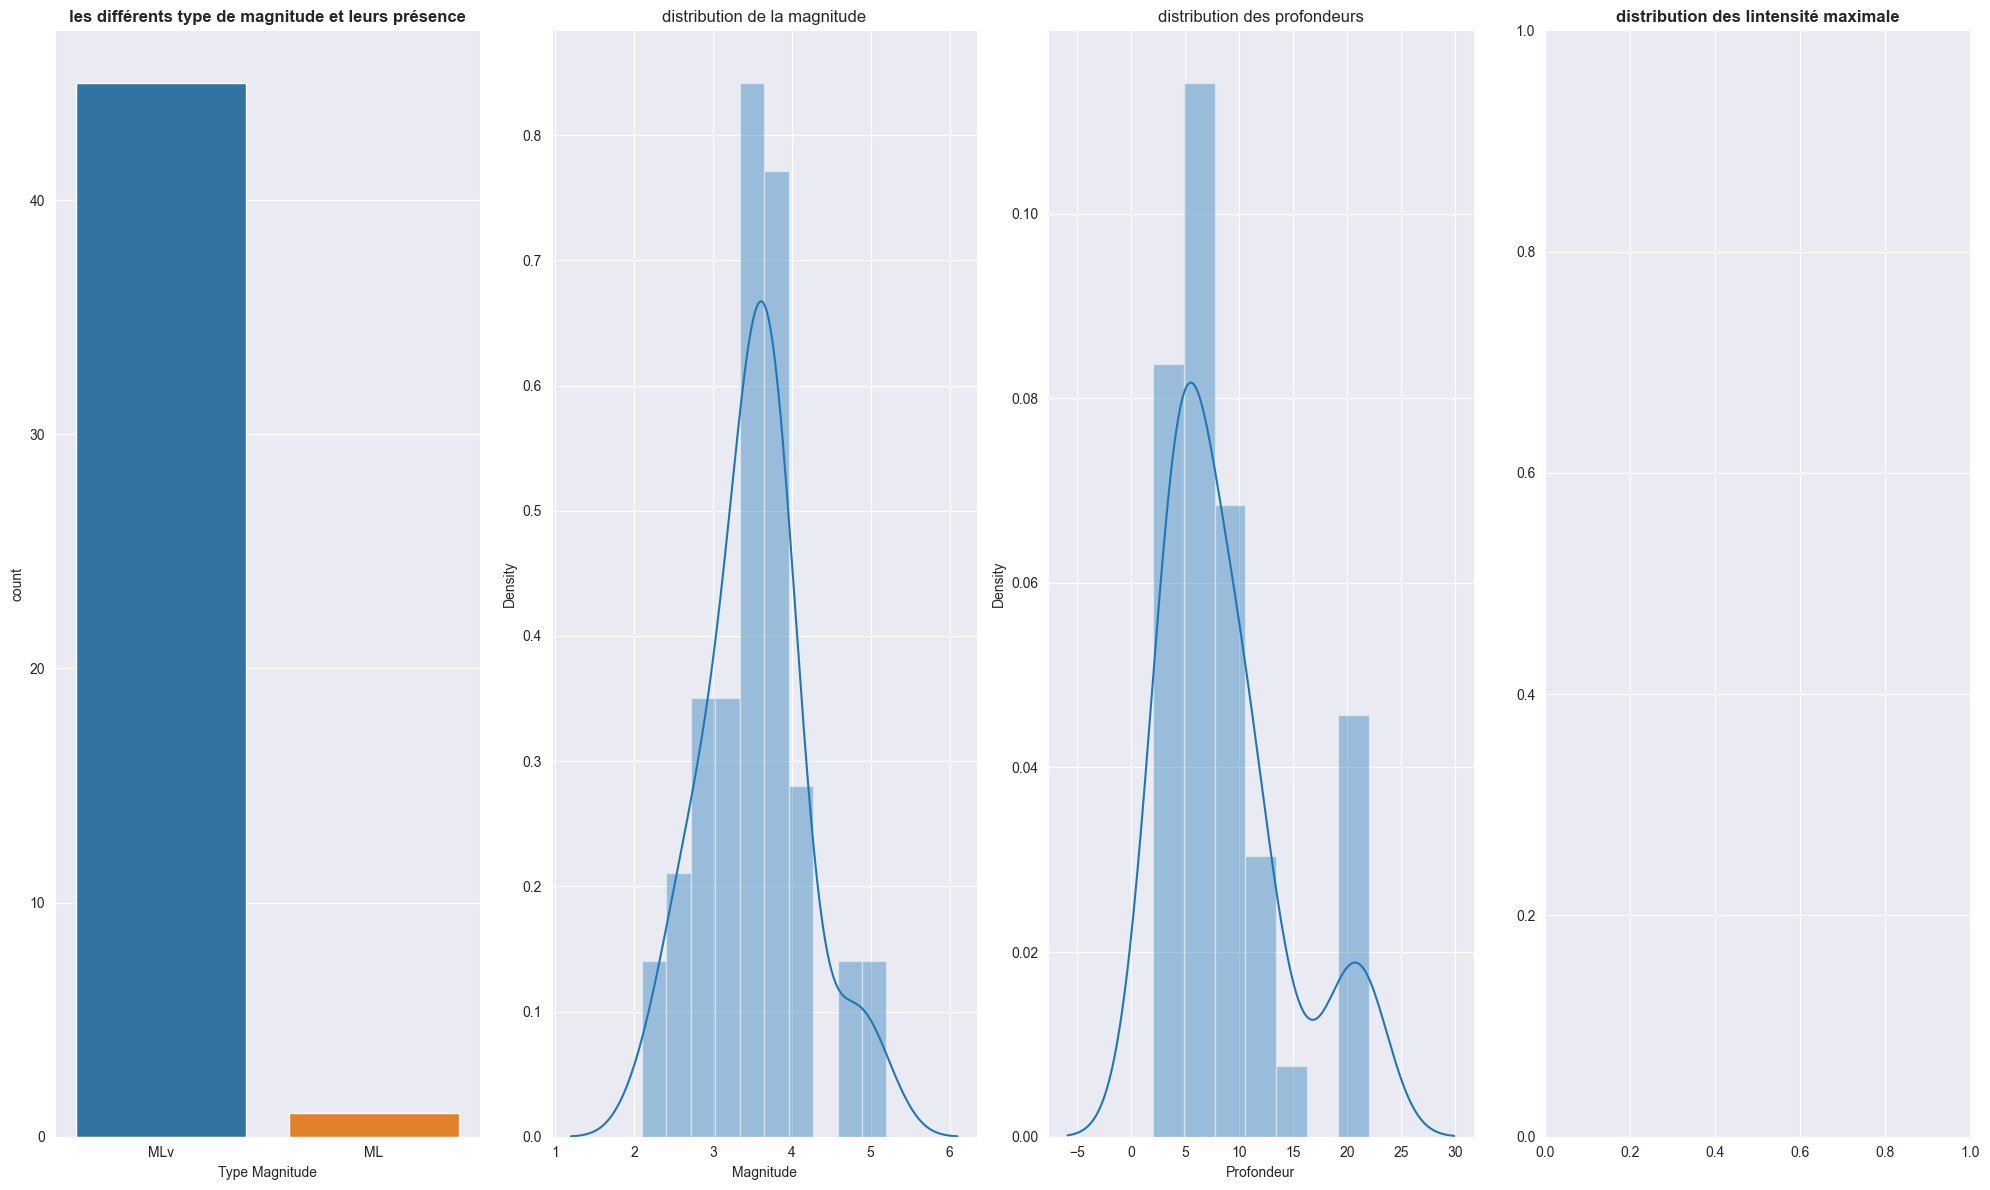

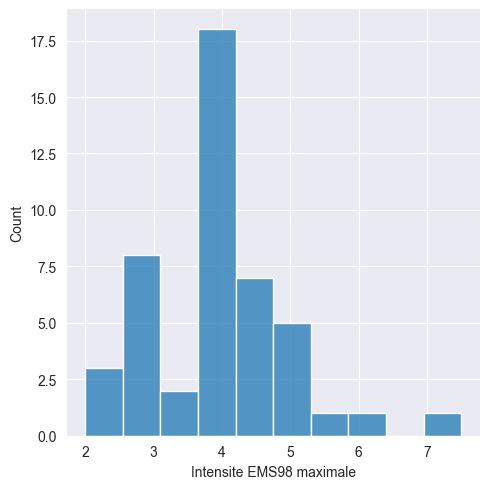

In [9]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,nrows=1,figsize=(20,12))

sns.countplot(data=seisme_df,x='Type Magnitude',ax=ax1)
ax1.set_title('les différents type de magnitude et leurs présence',fontweight='bold')
sns.distplot(seisme_df['Magnitude'],ax=ax2)
ax2.set_title('distribution de la magnitude')
sns.distplot(seisme_df['Profondeur'],ax=ax3)
ax3.set_title('distribution des profondeurs')
sns.displot(seisme_df['Intensite EMS98 maximale'],ax=ax4)
ax4.set_title('distribution des lintensité maximale',fontweight='bold')

fig.tight_layout()

plt.show()

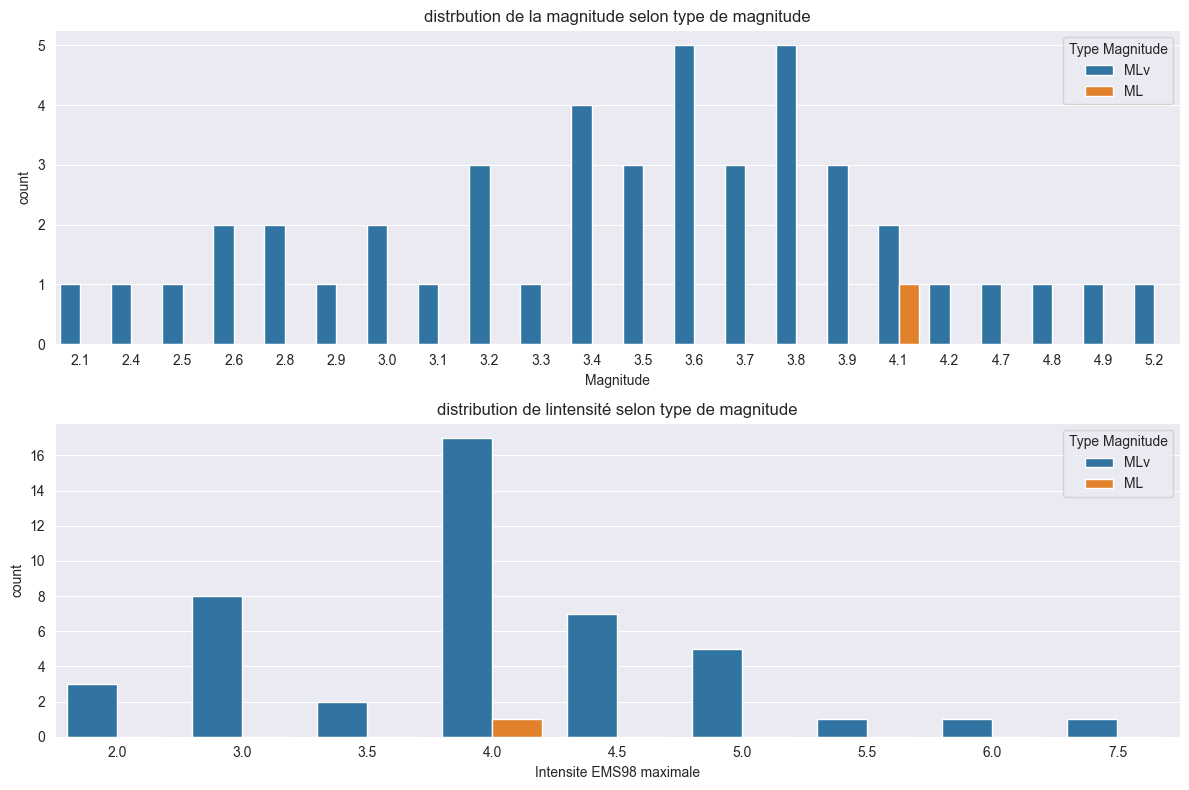

In [10]:
fig,(ax1,ax2)=plt.subplots(ncols=1,nrows=2,figsize=(12,8))
sns.countplot(data=seisme_df,x='Magnitude',hue='Type Magnitude',ax=ax1)
ax1.set_title('distrbution de la magnitude selon type de magnitude')
sns.countplot(data=seisme_df,x='Intensite EMS98 maximale',hue='Type Magnitude',ax=ax2)
ax2.set_title('distribution de l''intensité selon type de magnitude')
fig.tight_layout()
plt.show()


In [11]:
seisme=seisme_df.copy()
seisme['date_fin']=seisme['Date Heure']+pd.Timedelta(180,'m')
seisme.rename({'Date Heure':'date_debut'},inplace=True,axis=1)


In [12]:
i=seisme.sample(1).index[0]
print('heure de la donnée réelle {}'.format(seisme['date_debut'].iloc[i]))
print('-------apres modification-----------------')
print('heure de la donnée après ajout de 30 minutes {}'.format(seisme['date_fin'].iloc[i]))

heure de la donnée réelle 2020-06-23 06:25:40.330000
-------apres modification-----------------
heure de la donnée après ajout de 30 minutes 2020-06-23 09:25:40.330000


In [16]:
data_=data[['tweet_created_at','id_evt','tweet_text']]

In [17]:
data_['tweet_created_at']

0        2019-07-26 12:59:53
1        2019-07-26 13:03:46
2        2019-07-26 13:06:10
3        2019-07-26 13:13:42
4        2019-07-26 13:57:45
                 ...        
517296   2019-07-26 12:49:09
517297   2019-07-26 12:55:10
517298   2019-07-26 12:56:43
517299   2019-07-26 12:58:07
517300   2019-07-26 12:59:05
Name: tweet_created_at, Length: 517301, dtype: datetime64[ns]

# Joïnture des deux tables ( Séismes et Tweets)

In [20]:
from pandasql import sqldf
pysqldf=lambda q:sqldf(q,globals())

q="""
SELECT A.*, B.date_debut, B.date_fin

FROM 
   data_ A 
LEFT JOIN seisme B
ON
 
 A.tweet_created_at>=B.date_debut AND A.tweet_created_at<=B.date_fin;
"""
final_data=pysqldf(q)

In [21]:
final_data[(final_data['id_evt'].isna()==True) & (final_data['date_debut'].isna()==False)]

tweet_created_at  id_evt  \
30041   2021-06-08 23:50:11.000000     NaN   
30103   2021-06-08 21:12:50.000000     NaN   
30104   2021-06-08 21:28:10.000000     NaN   
30105   2021-06-08 21:37:57.000000     NaN   
30106   2021-06-08 22:00:01.000000     NaN   
...                            ...     ...   
504865  2021-10-11 10:57:33.000000     NaN   
504866  2021-10-11 10:58:52.000000     NaN   
504867  2021-10-11 10:59:41.000000     NaN   
504868  2021-10-11 10:59:42.000000     NaN   
504870  2021-10-11 11:16:23.000000     NaN   

                                               tweet_text  \
30041      @ECiotti Magnitude 3 ça devrait bien se passer   
30103   Bulletin Volkeno ni Jirani N°14 du 08 juin: Le...   
30104   @MotsSurannes A l'époque, faut se rappeler qu'...   
30105   ⏰ 17:40\n\nTir de carrière de magnitude 1.4, p...   
30106   Un séisme dans la région de Lanaudière qui a f...   
...                                                   ...   
504865  Tremblement de terre en Andorre à lire sur - h...   
504866  ⏰ 10:56\n\nÉvènement de magnitude 1.2, proche ...   
504867  Nouveau tremblement de terre dans les Pyrénées...   
504868  CM – Un séisme de magnitude 6,2 secoue Hawaï h...   
504870  wessssh y’a eu un tremblement de terre la mais...   

                        date_debut                    date_fin  
30041   2021-06-08 21:00:50.040000  2021-06-09 00:00:50.040000  
30103   2021-06-08 21:00:50.040000  2021-06-09 00:00:50.040000  
30104   2021-06-08 21:00:50.040000  2021-06-09 00:00:50.040000  
30105   2021-06-08 21:00:50.040000  2021-06-09 00:00:50.040000  
30106   2021-06-08 21:00:50.040000  2021-06-09 00:00:50.040000  
...                            ...                         ...  
504865  2021-10-11 08:23:15.020000  2021-10-11 11:23:15.020000  
504866  2021-10-11 08:23:15.020000  2021-10-11 11:23:15.020000  
504867  2021-10-11 08:23:15.020000  2021-10-11 11:23:15.020000  
504868  2021-10-11 08:23:15.020000  2021-10-11 11:23:15.020000  
504870  2021-10-11 08:23:15.020000  2021-10-11 11:23:15.020000  

[1852 rows x 5 columns]

### Remarques :

- En utilisant la méthode de joïture des tables des tweets avec les table des seïsme de France, sur une fënetre de 3h on a trouvé 1852 tweets qui n'a pas de Id_evt donc appriorié non détérminé mais qui sont rentré dans l'un des plage horaire de 3h après le début d'un seisme en france donc on peut les labéliser par un 1.
- Pourquoi on a trouvé peu de tweet avec une plage horaire aussi grande: c'est du fait que la Table des séismes parle des séisme uniquement de France, or les tweets que nous avons sur la tables data parlent souvent des séismes hors France et en plus ca ne prend pas en compte le sens des mots.
- Nous avons décidé de ne pas continuer à explorer cette direction.

<a id='6'></a>


<h1 style="background-color:#87CEFA	;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Conclusion Finale</h1>

- En résumé, le projet de détection des séismes à l'aide de modèles de machine learning et de NLP a été comparé à l'utilisation de la technique de gridsearch pour trouver les meilleurs hyperparamètres pour chaque modèle. Les résultats ont montré que l'utilisation de modèles comme KNN et Régression Logistique étaient plus efficaces. 

- Dans ce contexte, l'utilisation de techniques de deep learning pourrait être une piste de recherche intéressante à explorer. En effet, les techniques d'apprentissage en profondeur ont montré de très bonnes performances dans de nombreux domaines, notamment en vision par ordinateur et en reconnaissance de la parole. Il pourrait donc être utile d'appliquer ces techniques à la détection des séismes pour améliorer encore la précision des prévisions.

- Il y a également d'autres pistes de recherche à explorer, comme l'utilisation de données en temps réel, comme les données de capteurs et de satellites, pour fournir des informations en temps réel sur l'état des régions à risque de séismes. De même, il pourrait être intéressant de développer des modèles de machine learning qui tiennent compte des caractéristiques spécifiques de chaque région, comme la géologie et la topographie, afin d'améliorer la précision des prévisions de séismes dans ces régions.


![](https://media2.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif)